# **N04. Object classification**

This notebook is divided as follows:

1. **Headers and failed downloads.**
    1.1. L0 headers analysis.

    1.2. Failed downloads analysis.
2. **Detected objects**

    1.1. PSFs stars analysis.

    2.2. Non-stellar PSFs analysis


**Load libraries**

In [1]:
# Python libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import datetime
import matplotlib as mpl

# From libraries folder.
import libraries.object_detection as od
import libraries.starfunctions as sf
import libraries.object_classification as oc
import libraries.utilities as ut
# Plotting configuration.
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["mathtext.fontset"] = "cm"  

In [2]:
# Path to files.
FOLDER = "resources/objects"
HEADERS = "fits_files.pkl"
OBJECTS = "objects_files.pkl"

# merge dataframes
detected_objects1, detected_objects2 = pd.read_pickle(os.path.join(FOLDER,"objects_files1.pkl")), pd.read_pickle(os.path.join(FOLDER,"objects_files2.pkl"))
headers_files1, headers_files2 = pd.read_pickle(os.path.join(FOLDER,"fits_files1.pkl")), pd.read_pickle(os.path.join(FOLDER,"fits_files2.pkl"))

detected_objects = pd.concat([detected_objects2, detected_objects1], ignore_index=True)
headers_files = pd.concat([headers_files2, headers_files1], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'resources/objects/objects_files1.pkl'

In [3]:
# Path to files.
FOLDER = "resources/objects detected C"
HEADERS = "fits_files.pkl"
OBJECTS = "objects_files.pkl"
#FAILED_CSVs = "failed_files.csv"
# Load files.
# detected_objects = pd.read_pickle(os.path.join(FOLDER,OBJECTS))
# headers_files = pd.read_pickle(os.path.join(FOLDER,HEADERS))
#failed_csvs = pd.read_csv(os.path.join(FOLDER,FAILED_CSVs), 
                       #   header = None, names = ["id", "url", "failure"])

## 1. Headers and Failed downloads.

### 1.1. L0 Headers

1. First, display the headers in the L0 FITS files.

In [4]:
# Display header in L0 FITS.
headers_files.columns

Index(['APID', 'BITPIX', 'BLANK', 'CHECKSUM', 'COMMENT', 'COMPRESS',
       'COMP_RAT', 'CREATOR', 'DATAMAX', 'DATAMIN', 'DATASUM', 'EXTEND',
       'FILENAME', 'FILE_RAW', 'HISTORY', 'INSTRUME', 'LEVEL', 'LONGSTRN',
       'NAXIS', 'NAXIS1', 'NAXIS2', 'OBT_BEG', 'OBT_END', 'ORIGIN', 'SIMPLE',
       'VERSION', 'VERS_SW', 'LTP', 'STP', 'IDX', 'TIMESTAMP', 'STARS',
       'OBJECTS'],
      dtype='object')

2. Retrieve the size distribution of the images:

In [5]:
# Size distribution
headers_files.groupby(["NAXIS1", "NAXIS2"]).count()["APID"]

NAXIS1  NAXIS2
2048    2048      64494
Name: APID, dtype: int64

All images have 2048x2048

3. Display time distribution of the files.

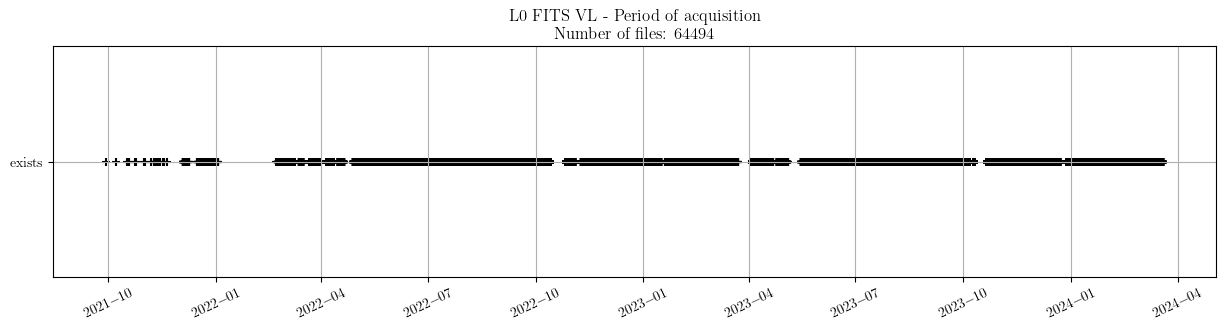

In [6]:
def correct_time(timestamp):
    """Convert str into datatime stamp"""
    return datetime.datetime.strptime(timestamp, "%Y-%m-%dT%H.%M.%S.%f")

# Get timestamps.
timestamps = headers_files["FILE_RAW"].apply(lambda x: correct_time(x[:26]))
a = np.ones(len(timestamps))

# Display.
fig, axis = plt.subplots(1, 1,  figsize = (15, 3))
axis.scatter(timestamps, a, color = "k", marker = "+")
axis.set_title(f"L0 FITS VL - Period of acquisition \n Number of files: {len(headers_files)}")
axis.grid(True)
axis.set_yticks([1])
axis.set_yticklabels(["exists"])
a =plt.xticks(rotation=25)

### 1.2. Failed Downloads.

1. Check number of failed downloads.

In [7]:
#print(f"Number of files that could not be downloaded: {len(failed_csvs)} ")

2. Reason of failure:

In [8]:
# Display failure reason.
#failed_csvs.groupby("failure").count()

## 2. Detected objects

Read files obtained in the **object_detection_refined.pkl**

In [9]:
detected_objects

LTP     STP IDX  PEAK_VAL X_COORD Y_COORD PRE_LABEL  INFO  \
0         LTP5  STP168   0    3195.0     805      87    object  info   
1         LTP5  STP168   0    3020.0     993     273    object  info   
2         LTP5  STP168   0    3078.0    1887     296    object  info   
3         LTP5  STP168   0    2638.0     395     347    object  info   
4         LTP5  STP168   0    3413.0    1593     351    object  info   
...        ...     ...  ..       ...     ...     ...       ...   ...   
2320535  LTP15  STP301  29    3223.0     490    1957    object  info   
2320536  LTP15  STP301  29    3508.0     542    1973    object  info   
2320537  LTP15  STP301  29    3396.0     742    1960    object  info   
2320538  LTP15  STP301  29    1961.0     256    1974    object  info   
2320539  LTP15  STP301  29    3771.0    1142    2025    object  info   

                                                    REGION  \
0        [[2883.0, 2849.0, 2849.0, 2932.0, 2932.0, 2937...   
1        [[2725.0, 2746.0, 2746.0, 2703.0, 2703.0, 2749...   
2        [[2455.0, 2452.0, 2452.0, 2414.0, 2414.0, 2416...   
3        [[2295.0, 2308.0, 2308.0, 2319.0, 2319.0, 2321...   
4        [[2830.0, 2847.0, 2847.0, 2815.0, 2815.0, 2824...   
...                                                    ...   
2320535  [[2722, 2731, 2723, 2690, 2748, 2628, 2656, 27...   
2320536  [[2855, 2841, 2870, 2858, 2821, 2856, 2837, 28...   
2320537  [[3021, 2935, 3039, 3045, 3063, 3033, 3016, 30...   
2320538  [[1568, 1582, 1617, 1622, 1548, 1640, 1638, 16...   
2320539  [[3238, 3132, 3159, 3266, 3132, 3064, 3236, 30...   

                                           FILENAME  
0        solo_l0_metis-vl-image_0686221506_v01.fits  
1        solo_l0_metis-vl-image_0686221506_v01.fits  
2        solo_l0_metis-vl-image_0686221506_v01.fits  
3        solo_l0_metis-vl-image_0686221506_v01.fits  
4        solo_l0_metis-vl-image_0686221506_v01.fits  
...                                             ...  
2320535  solo_L0_metis-vl-image_0764166394_V01.fits  
2320536  solo_L0_metis-vl-image_0764166394_V01.fits  
2320537  solo_L0_metis-vl-image_0764166394_V01.fits  
2320538  solo_L0_metis-vl-image_0764166394_V01.fits  
2320539  solo_L0_metis-vl-image_0764166394_V01.fits  

[2320540 rows x 10 columns]

In [10]:
# General statistics.
total_dataset = len(detected_objects)
number_files = len(detected_objects.groupby("FILENAME").count())
number_stars = len(detected_objects[detected_objects["PRE_LABEL"] == "star"])
number_objects = len(detected_objects[detected_objects["PRE_LABEL"] == "object"])

1. Display General statistics.

In [11]:
print(f"Total number of detected samples: {total_dataset} ")
print(f"Total number of read files: {number_files} ")
print(f"Total number of detected stars: {number_stars} ")
print(f"Total number of detected objects: {number_objects} ")

Total number of detected samples: 2320540 
Total number of read files: 60080 
Total number of detected stars: 84932 
Total number of detected objects: 2235608 


### 2.1. Obtained PSF-Stars

Display a set of detected stars.

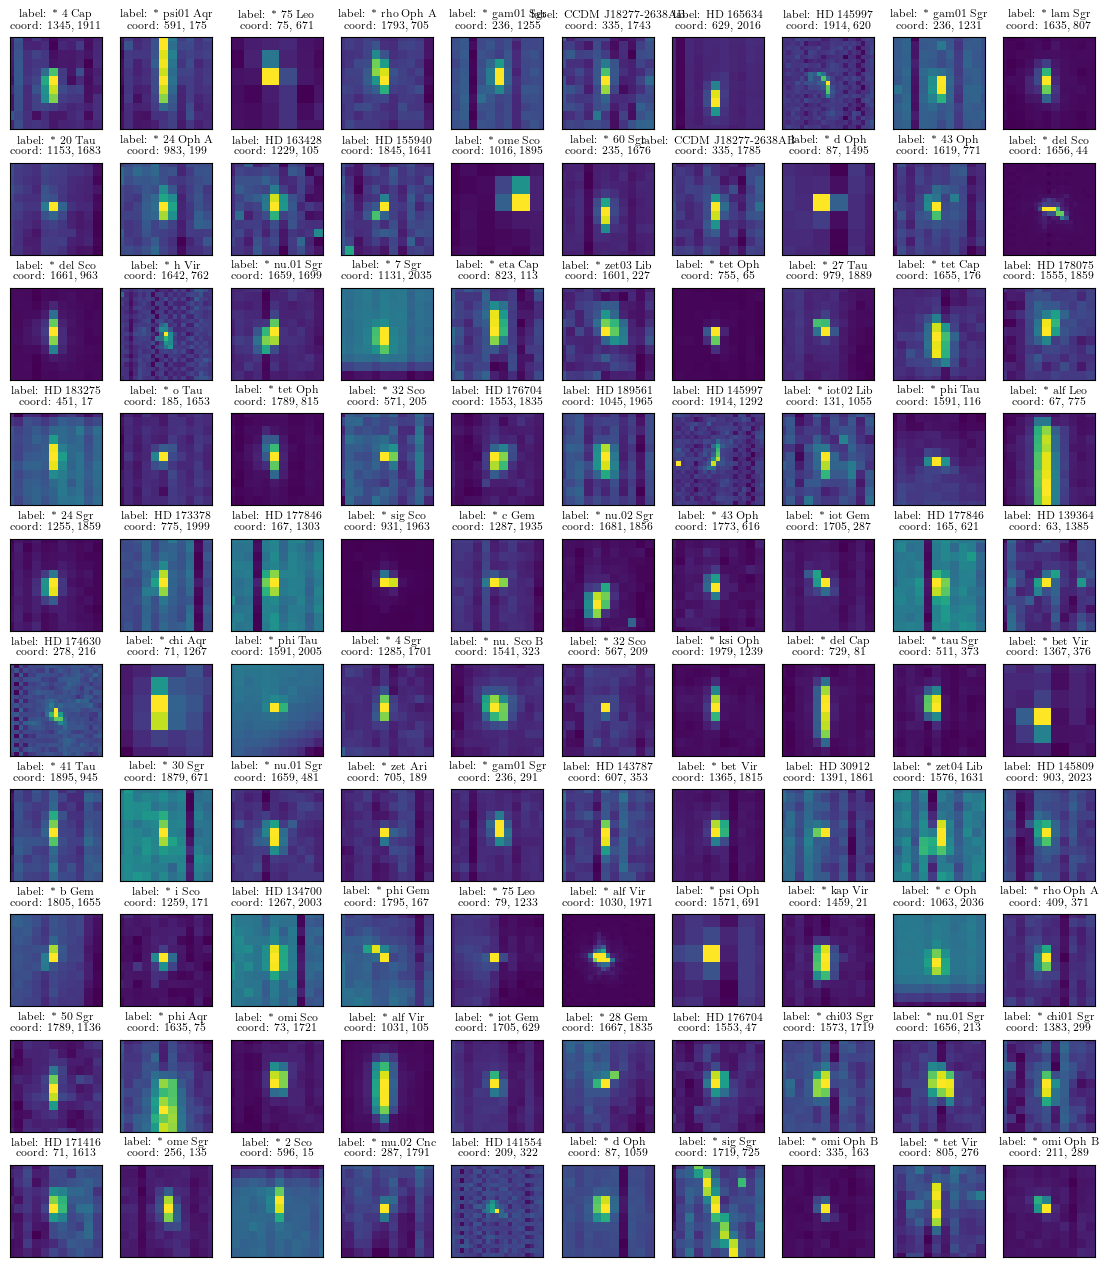

In [12]:
# Filter stars.
stars = detected_objects[detected_objects["PRE_LABEL"] == "star" ].reset_index(drop = True)

# Initialize plot

"""Set number of stars, try to put a number whose root square is a positive int."""

n_stars = 90
n = int(np.sqrt(100))

fig, axis = plt.subplots(n, n, figsize = (n + 4,n + 6))
axis = axis.flatten()

# Take n_stars randomly.
samples = stars.sample(n**2)

for idx in range(n**2):
    images = samples["REGION"].iloc[idx]
    label = samples["INFO"].iloc[idx]
    x, y = samples[["X_COORD", "Y_COORD"]].iloc[idx]
    axis[idx].imshow(images)
    axis[idx].set_title(f"label: {label} \n coord: {x}, {y}", fontsize = 8)
    axis[idx].set_yticks([]) 
    axis[idx].set_xticks([])  

### 2.2. Obtained PSF-Objects

1. Display randomly a set of objects.

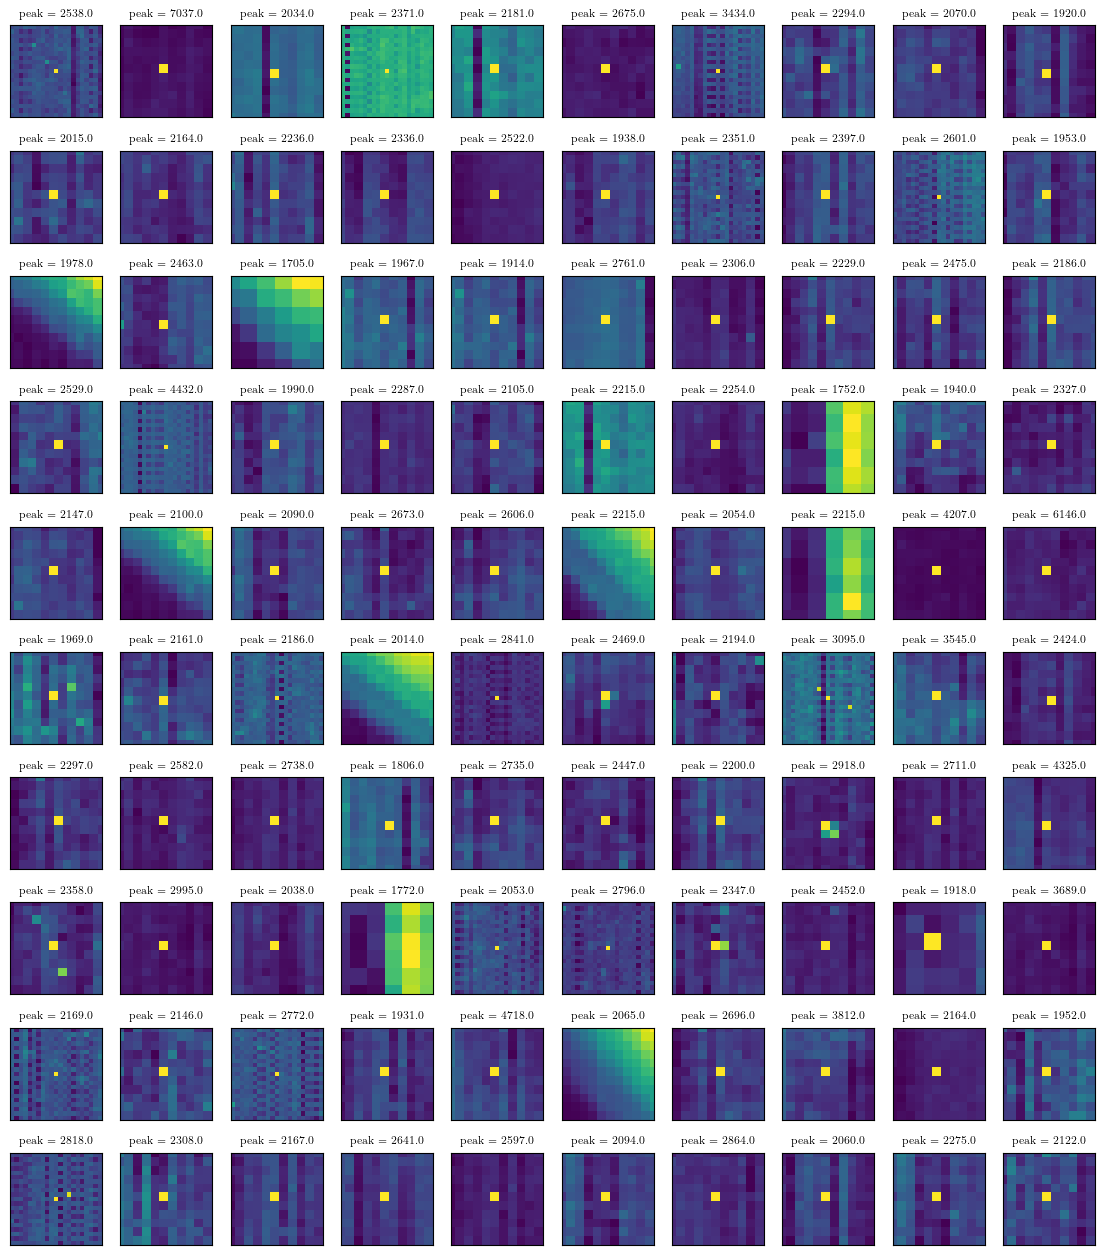

In [13]:
# Filter objects.
objects = detected_objects[detected_objects["PRE_LABEL"] == "object" ].reset_index(drop =True)

"""Set number of objects, try to put a number whose root square is a positive int."""

n_objects = 100
n = int(np.sqrt(n_objects))

fig, axis = plt.subplots(n, n, figsize = (n+4,n+6))
axis = axis.flatten()

samples = objects.sample(n**2)
for idx in range(n**2):

    image = samples["REGION"].iloc[idx]
    peak = samples["PEAK_VAL"].iloc[idx]
    axis[idx].imshow(image)
    axis[idx].set_title(f"peak = {peak}", fontsize = 8)
    axis[idx].set_yticks([]) 
    axis[idx].set_xticks([])  


2. Check defective pixels in one STP.

First, check which is the STP that has the biggest number of FITS.

In [14]:
# Check STP with the most number of FITS.
biggest_stp = headers_files.groupby("STP").count().sort_values(by = "LTP", ascending= True).iloc[-1].name
# Take STP from headers.
stp_objects = headers_files[headers_files["STP"] == biggest_stp]
# Extract related timestamps.
stp_dates = stp_objects.sort_values(by = "TIMESTAMP")["TIMESTAMP"]
# Display information.
print(f"Biggest STP: {biggest_stp}, number of FITS: {len(stp_objects)} \n")
print(f"Starting date of {biggest_stp}: {stp_dates.iloc[0]}, final date: {stp_dates.iloc[-1]}")


Biggest STP: STP252, number of FITS: 3277 

Starting date of STP252: 2023 APR 09 03:16:31.7743, final date: 2023 APR 13 23:50:56.2272


Now. extract the most repited x, y coordinates in the extracted STP. The objective is to see if the same x, y coordinate is repeated in all the files.

(Text(0, 0.5, 'Counts'), Text(0.5, 0, 'Pair of x, y coordinate with a peak'))

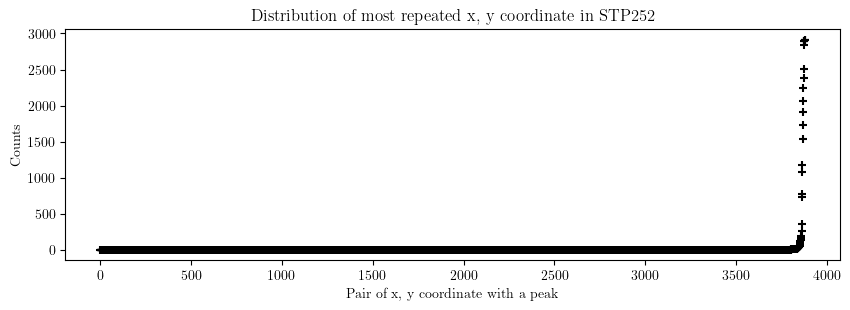

In [15]:
# Take all found peaks in the STP.
stp_peaks = objects[objects["STP"] == biggest_stp]
most_repeated_coords = stp_peaks.groupby(["X_COORD", "Y_COORD"]).size().reset_index(name = "count")

fig, axis = plt.subplots(1, 1, figsize = (10,3))
axis.set_title(f"Distribution of most repeated x, y coordinate in {biggest_stp} ")
axis.scatter(np.arange(len(most_repeated_coords)), most_repeated_coords.sort_values(by = "count", ascending= True)["count"], c = "k", marker = "+")
axis.set_ylabel("Counts"), axis.set_xlabel("Pair of x, y coordinate with a peak")

Text(0, 0.5, 'Pixel coordinates in STP 252')

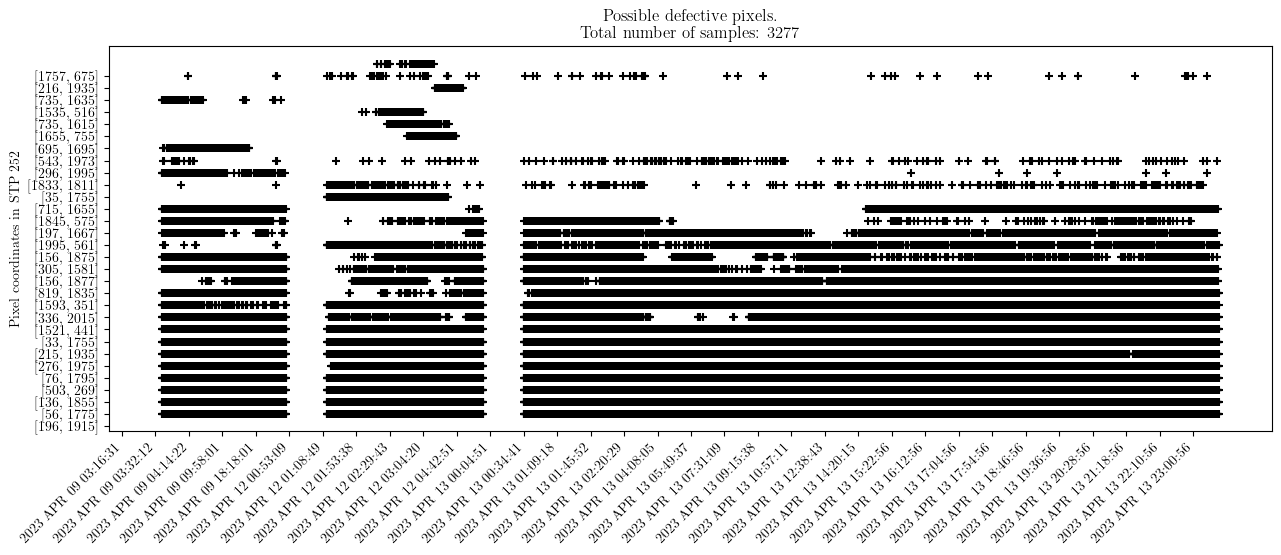

In [16]:
# Order coordinates and reduce timestamp size.
most_repeated_coords= most_repeated_coords.sort_values(by = "count", ascending= False)
stp_dates_r = stp_dates.apply(lambda x: x[:-5])

# Create plot.
fig, axis = plt.subplots(1, 1, figsize = (15,5))
x_label = np.arange(len(stp_dates))
axis.set_xticks(x_label[::100])  # or whatever spacing you want
axis.set_xticklabels(stp_dates_r.iloc[x_label[::100]], rotation=45, ha='right')
samples = 30
coords = []

for i in range(samples):
    # Extract coordinates
    x, y = most_repeated_coords[["X_COORD", "Y_COORD"]].iloc[i].to_list()
    coords.append([x,y])
    values = stp_peaks[(stp_peaks["X_COORD"] == x) & (stp_peaks["Y_COORD"] == y)]["IDX"]
    labels = (i+1)*np.ones(len(values))
    axis.scatter(values, labels, color = "k", marker = "+")

axis.set_yticks(np.arange(samples))
a = axis.set_yticklabels(coords)

axis.set_title(f"Possible defective pixels. \n Total number of samples: {len(stp_dates)}")
axis.set_ylabel("Pixel coordinates in STP 252")
#axis.set_xlabel("Timestamp")


2. Compute histogram of peak values.

Text(0, 0.5, 'Counts')

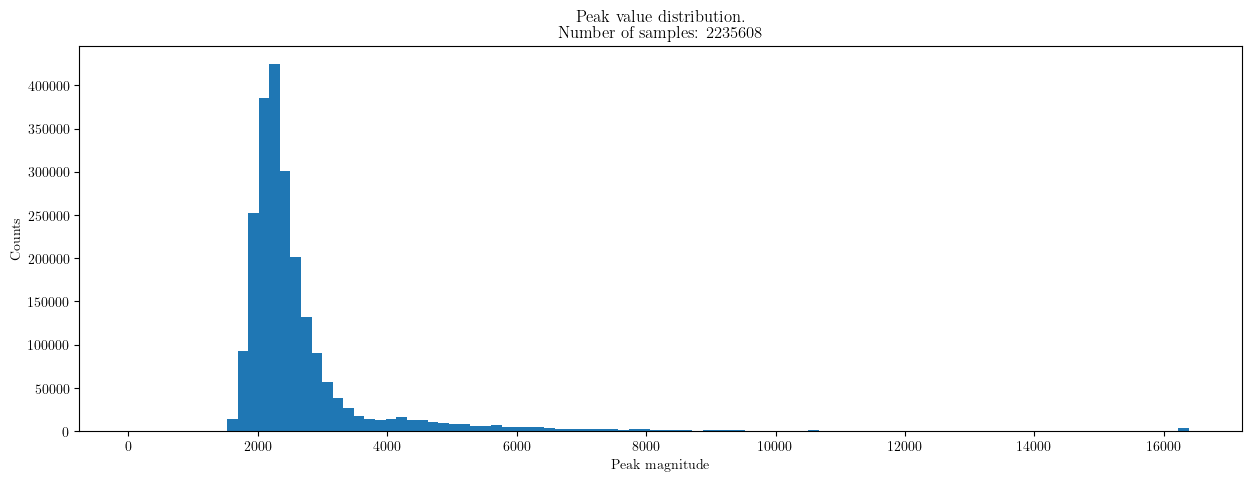

In [17]:
peaks = objects["PEAK_VAL"]

fig, axis = plt.subplots(1, 1, figsize = (15, 5))
hist = axis.hist(peaks, bins = 100)
axis.set_title(f"Peak value distribution. \n Number of samples: {len(peaks)}")
axis.set_xlabel("Peak magnitude")
axis.set_ylabel("Counts")

Most detected objects have a peak between 2000 and 3000.

3. Display objects by peaks

Create bins of size 1000 to group detected peaks.

In [18]:
# Create bins for clustering.
bins = np.arange(1000, 18000, 1000)
labels = ["group" + str(a) for a in range(1,17)]

# Apply clustering.
objects["PEAK RANGE"] = pd.cut(objects["PEAK_VAL"], bins=bins, labels = labels)

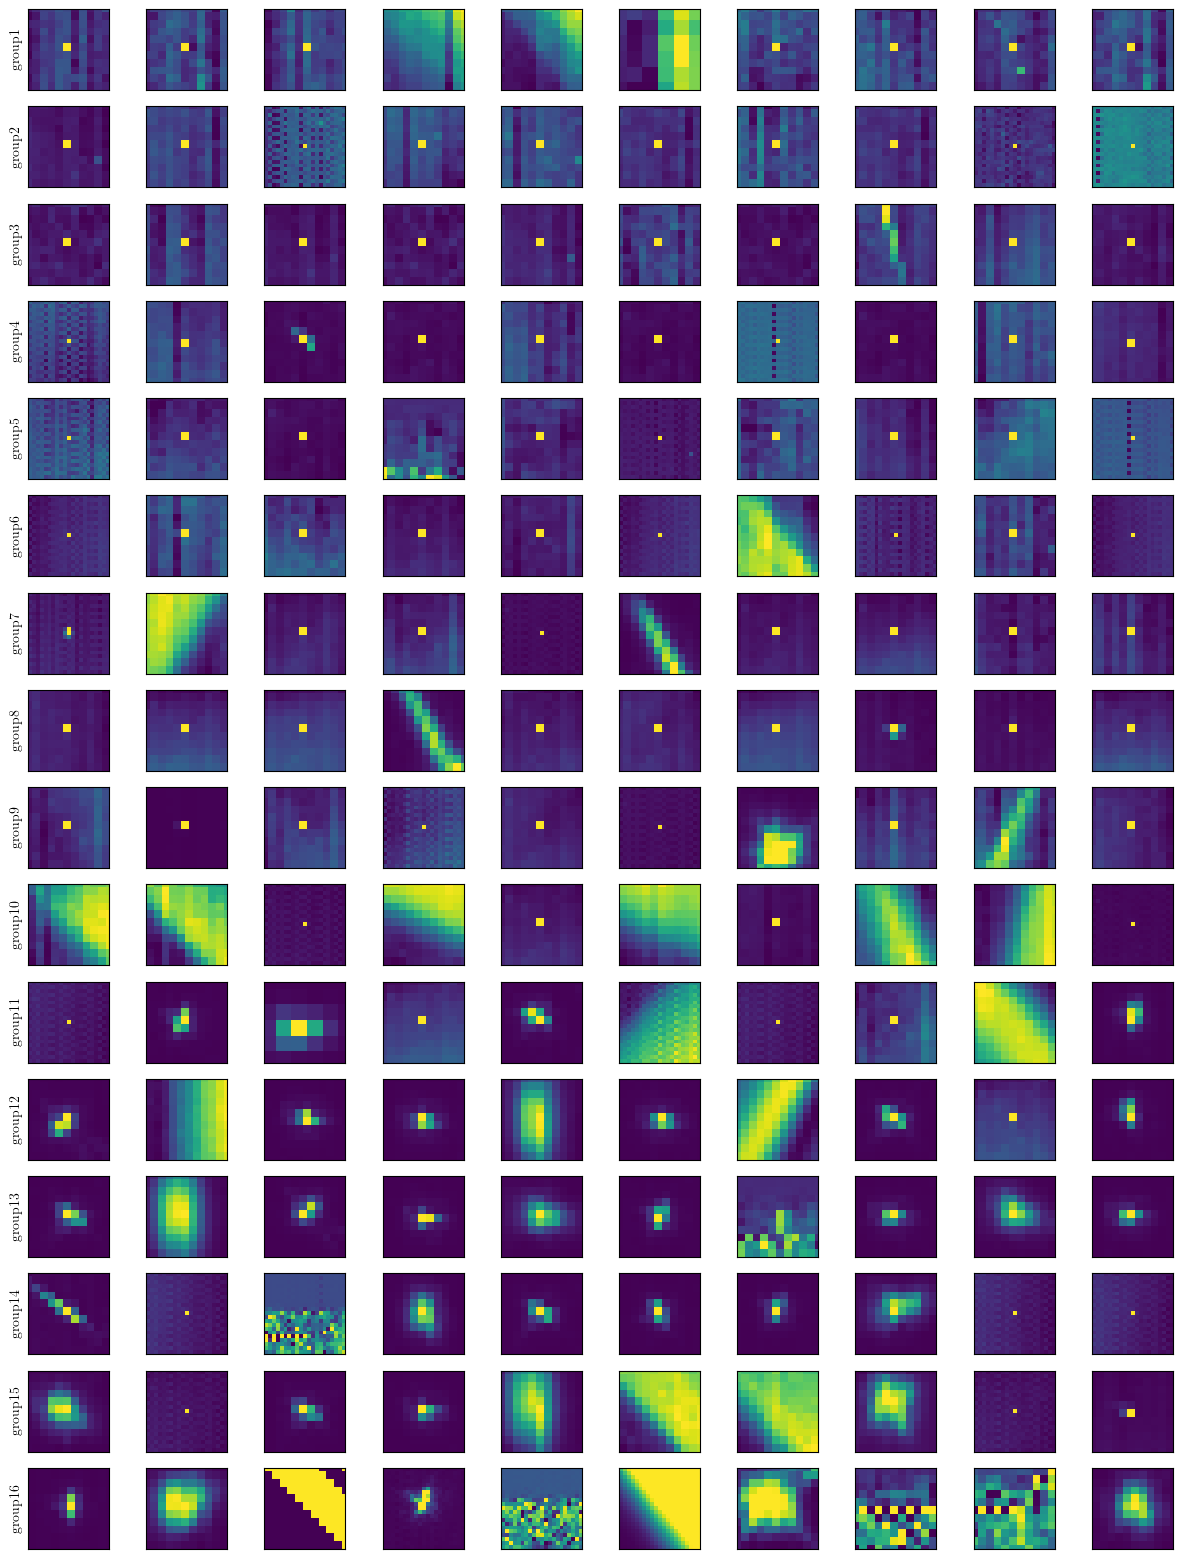

In [19]:
# Plot objects in every bin.
samples = 10
fig, axis = plt.subplots(16, samples, figsize= (15, 20))

for idx, label in enumerate(labels):
    try:
        images = objects[objects["PEAK RANGE"] == label].sample(samples)
        for im in range(samples):
            img = images["REGION"].iloc[im]
            axis[idx, 0].set_ylabel(label)
            axis[idx, im].imshow(img)
            axis[idx, im].set_xticks([])
            axis[idx, im].set_yticks([])
    except:
        print("no samples")

Highest peak values are related with noisy objects detected. Lowest peak values are related with bright pixels. Many detected objects belong to the metis fov limits.

4. Objects with respect of the FITS coordinate.

**Most repeated positions**

In [20]:
def combine(x, y):
    """combine two values of a column"""
    return (x,y)

# Group detected objects by x and y coordinates.
objects_pos = objects.groupby(["X_COORD", "Y_COORD"]).size().reset_index(name = "count")
objects_pos["combined"] = objects_pos.apply(lambda x: combine(x["X_COORD"], x["Y_COORD"]), axis=1)
objects_pos["combined"] = objects_pos.apply(lambda x: f"{x['X_COORD']}, {x['Y_COORD']}", axis=1)

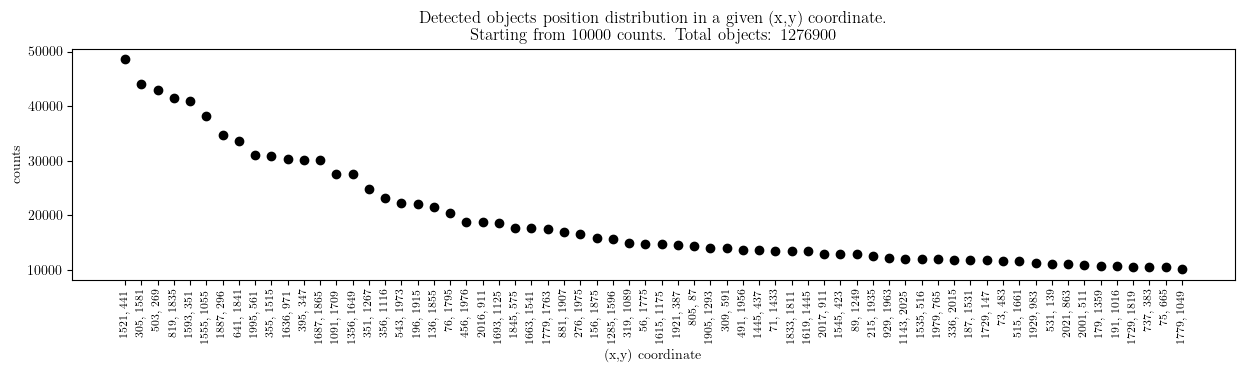

In [21]:
# Set a threshold for minimum number of counts to be taken into account for plotting
threshold = 10000
objects_pos_tsh = objects_pos.sort_values("count", ascending = False)[objects_pos["count"] >threshold]
total_sum = objects_pos_tsh["count"].sum()
fig, axis = plt.subplots(1, 1, figsize = (15, 3))
axis.scatter(objects_pos_tsh["combined"], objects_pos_tsh["count"], c = "k")
axis.set_ylabel("counts")
axis.set_xlabel("(x,y) coordinate")
axis.set_title(f"Detected objects position distribution in a given (x,y) coordinate. \n Starting from {threshold} counts. Total objects: {total_sum}")
a = plt.xticks(rotation = 90, fontsize = 8)


**Cummulative sum**

In [22]:
objects_counts = (
    objects_pos.groupby("count")
    .count().reset_index()
    .rename(columns = {"count":
                    "REPETEANCE","combined":"OBJECTS"})
    .drop(["X_COORD", "Y_COORD"], axis = 1)[["OBJECTS", "REPETEANCE"]]
    .sort_values("REPETEANCE")
)
objects_counts["CUMMULATIVE"] = np.cumsum(objects_counts.OBJECTS*objects_counts.REPETEANCE)


Text(0.5, 0, 'Times an object is detected in the same coordinate.')

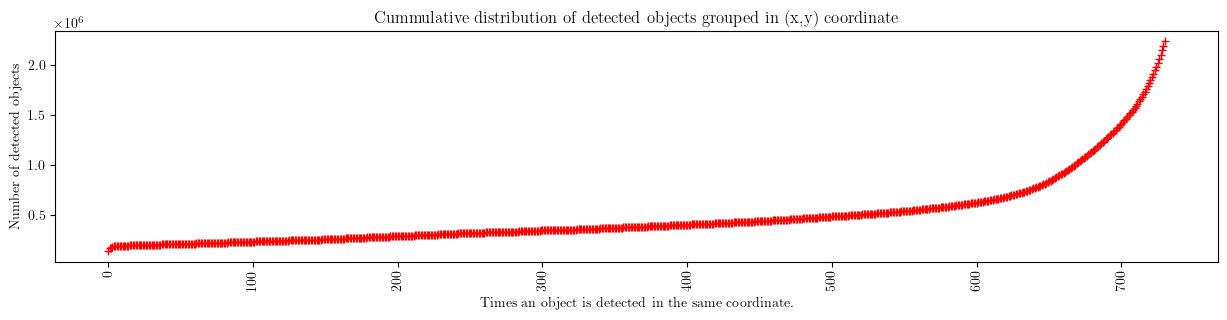

In [23]:
fig, axis = plt.subplots(1, 1,figsize =(15, 3))

axis.plot(objects_counts["CUMMULATIVE"], "+", c ="r")
axis.set_title("Cummulative distribution of detected objects grouped in (x,y) coordinate")
c = plt.xticks(rotation = 90)
axis.set_ylabel("Number of detected objects")
axis.set_xlabel("Times an object is detected in the same coordinate.")

**Position on metis fov**

Text(0, 0.5, 'y detector')

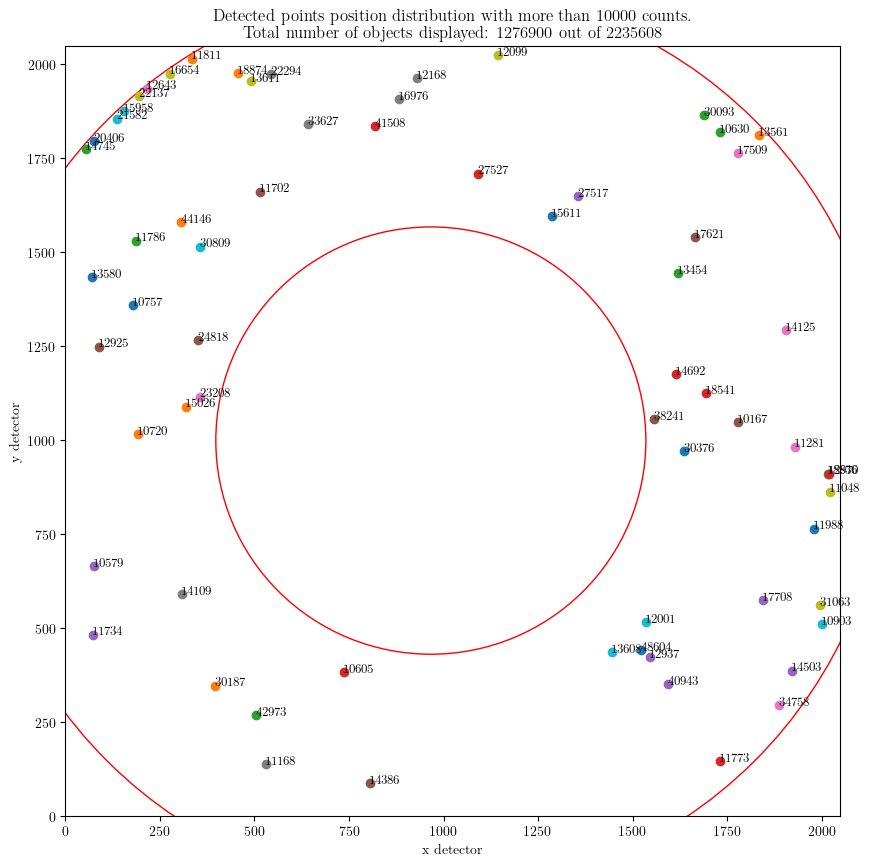

In [24]:
# Information for plotting METIS FOV
scale = 0.0028158333333333334
center = [966.075, 998.87]

# Create plot.
fig, axis = plt.subplots(1, 1, figsize = (10, 10))
axis.add_artist(plt.Circle(center, sf.METIS_fov/scale, fill = None, color = "red"))
axis.add_artist(plt.Circle(center, sf.METIS_fov_min/scale, fill = None, color = "red"))
axis.set_xlim(0, 2048)
axis.set_ylim(0, 2048)

# Display objects whose count value is bigger than "count_lim".
count_lim = 10000
most_frequent_objects = objects_pos[objects_pos["count"]> count_lim].sort_values("count", ascending = False)

# Compute how many objects are in total
number_objects = most_frequent_objects["count"].sum()

# Plot objects and count val.
for idx in range(len(most_frequent_objects)):
    x, y, val = most_frequent_objects[["X_COORD", "Y_COORD", "count"]].iloc[idx]
    axis.scatter(x, y)
    axis.text(x, y, val, fontsize = 9)

axis.set_title(f"Detected points position distribution with more than {count_lim} counts. \n Total number of objects displayed: {number_objects} out of {len(objects)}")
axis.set_xlabel("x detector")
axis.set_ylabel("y detector")


5. Detected points per image.

In [25]:
# Draw a random file from the detected objects dataframe.
filename_random = detected_objects["FILENAME"].sample(1).iloc[0]

# Extract objects 
objects_random = detected_objects[detected_objects["FILENAME"] == filename_random].sort_values(by = "PEAK_VAL", ascending = True)

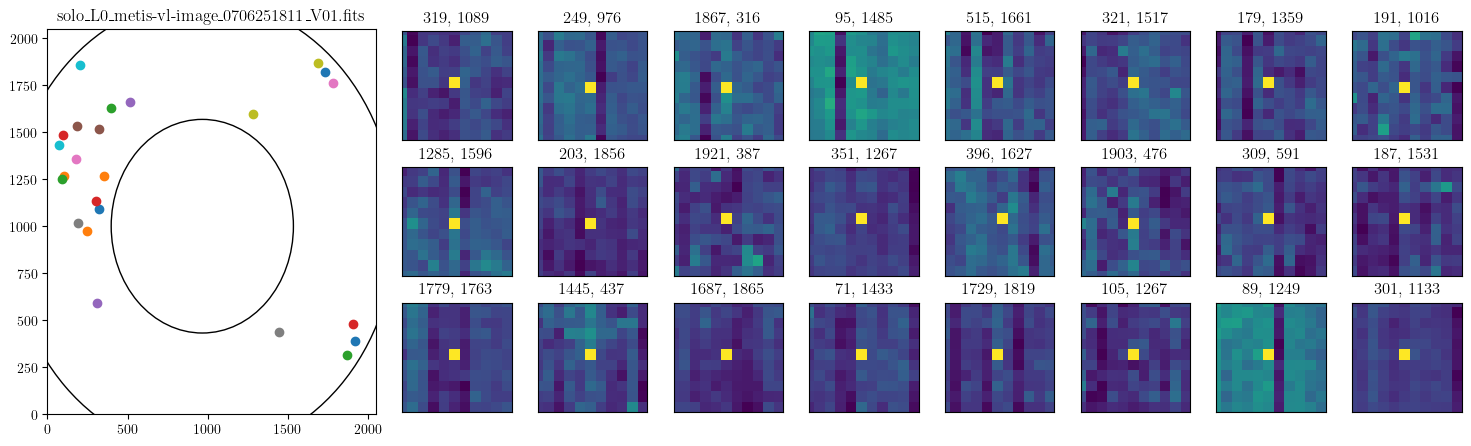

In [26]:
fig = plt.figure(figsize = (20, 5))
gs = gridspec.GridSpec(3, 10, figure = fig, width_ratios = [3, 1, 1, 1, 1, 1, 1, 1, 1,1 ])

ax_cor = fig.add_subplot(gs[:, 0])
ax_cor.set_title(f"{filename_random}")
ax_cor.add_artist(plt.Circle(center, sf.METIS_fov_min/scale, fill = None))
ax_cor.add_artist(plt.Circle(center,sf.METIS_fov/scale, color ="black", fill = None))

ax_cor.set_xlim(0, 2048)
ax_cor.set_ylim(0,2048)

count = 0
for i in range(3):
    for j in range(8):
        try:
            image = objects_random["REGION"].iloc[count]
            x = objects_random["X_COORD"].iloc[count]
            y = objects_random["Y_COORD"].iloc[count]
            ax = fig.add_subplot(gs[i, j +1])
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(f"{x}, {y}")
            ax.imshow(image)
            ax_cor.scatter(x, y)
            count +=1
        except:
            print("no more")


## 3. Manual classification

For this section, apply different methods to classify useful objects from bright pixels or noise.

### 3.1. Star characterization

First, let's analyze how the PSFs of stars behave.

**Array Reduction**

Detected point value: 1945, 1.0 (normalized)


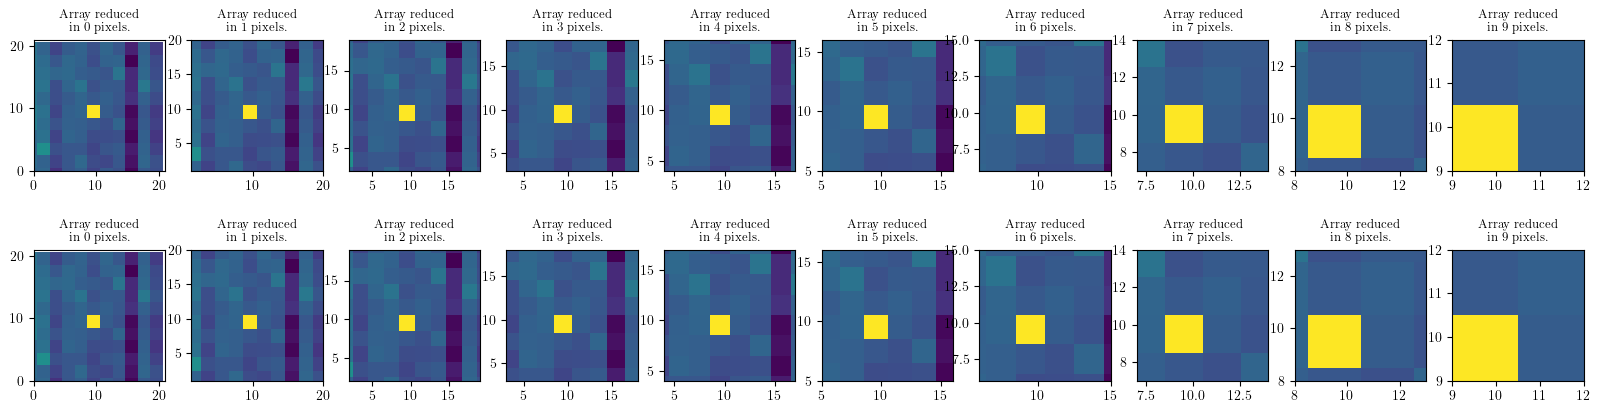

In [27]:
image = objects.sample(1)["REGION"].iloc[0]
image_norm = ut.normalize_array(image)

fig, axis = plt.subplots(2, 10, figsize = (20, 5))

for i in range(10):
    axis[0,i].imshow(image)
    axis[0,i].set_xlim(i,21-i)
    axis[0,i].set_ylim(i,21-i)
    axis[0,i].set_title(f"Array reduced \n in {i} pixels.", fontsize = 9)

    axis[1,i].imshow(image_norm)
    axis[1,i].set_xlim(i,21-i)
    axis[1,i].set_ylim(i,21-i)
    axis[1,i].set_title(f"Array reduced \n in {i} pixels.", fontsize = 9)

print(f"Detected point value: {image[10,10]}, {image_norm[10,10]} (normalized)")


Reduce each image into 10x10, which is the size defined in the object detection algorithm.

**Apply Sobel filter**

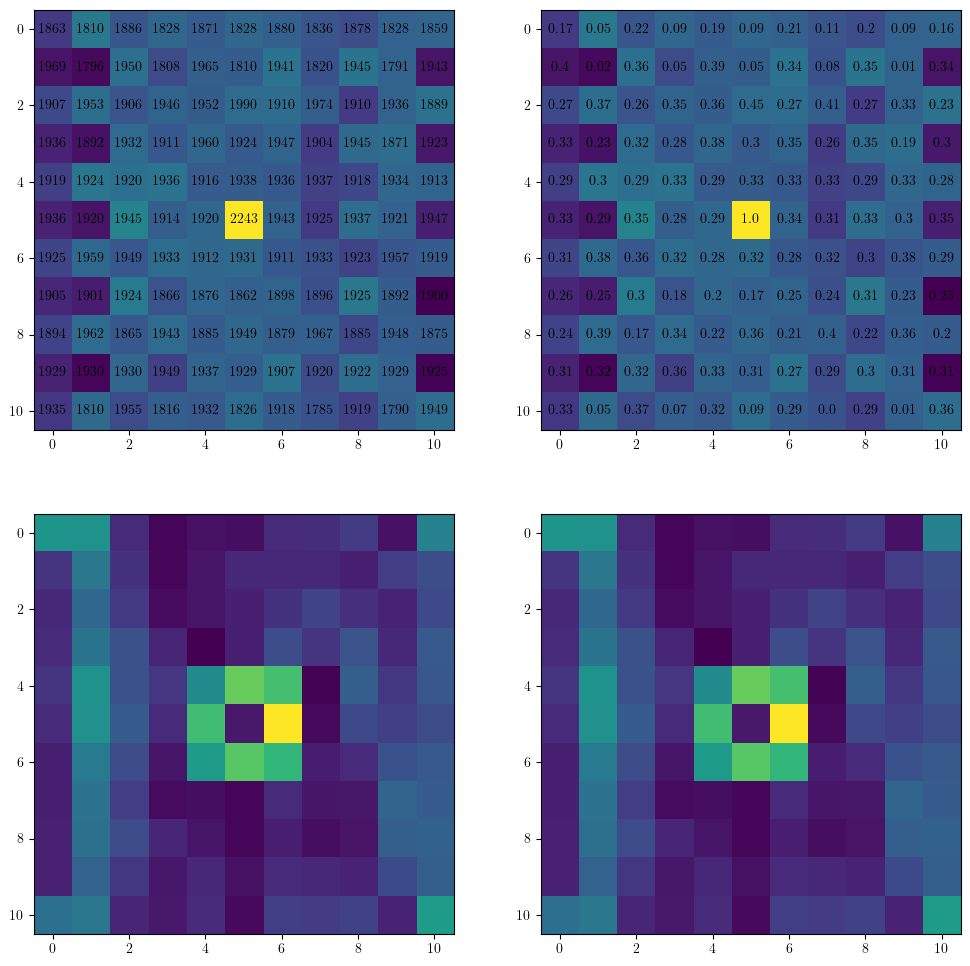

In [28]:
# Crop image and display values
lim = 5
image = objects.sample(1)["REGION"].iloc[0][lim:21-lim, lim:21-lim]
image_norm = ut.normalize_array(image)

fig, axis = plt.subplots(2, 2, figsize = (12,12))

axis[0,0].imshow(image)
axis[0,1].imshow(image_norm)

for i in range(image_norm.shape[0]):
    for j in range(image_norm.shape[1]):
        axis[0,0].text(i, j, str(np.round(image[i,j], 2)), ha="center", va="center")
        axis[0,1].text(i, j, str(np.round(image_norm[i,j], 2)), ha="center", va="center")

# Compute and display sobel filter.
from scipy.ndimage import sobel

# Compute derivatives
dx, dy = sobel(image, axis=1), sobel(image, axis=0) 
dxn, dyn = sobel(image_norm, axis=1), sobel(image_norm, axis=0) 
grad = np.hypot(dx, dy)
gradn = np.hypot(dxn, dyn)

axis[1,0].imshow(grad)
axis[1,1].imshow(gradn)

**Cross section**

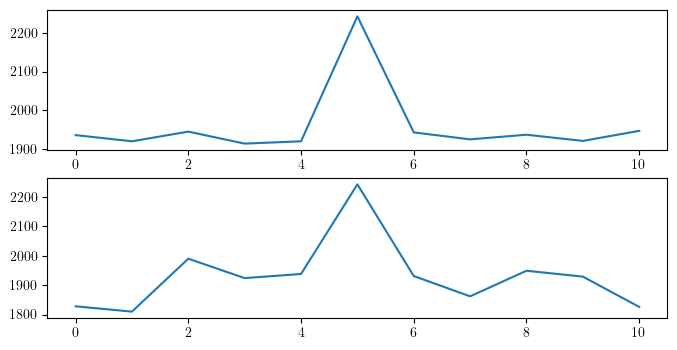

In [29]:
# Extract cross section.
cross_x = image[:,5]
cross_y = image[5, :]


fig, axis = plt.subplots(2, 1, figsize = (8, 4))
axis[0].plot(cross_x)
axis[1].plot(cross_y)

### 3.2 Peak detection using IQR

Apply box plot test in all the images and retrieve the peaks.

**IQR test in objects**

In [30]:
from scipy.stats import iqr

def iqr_test_all(array):
    """
    Dectect outliers in a numpy array

    Parameters:
        array (array): 2d array from a cropped region.
        pixel (array): xy coordinate with pixel position.
    
    """
    # Flatten 2D image.
    flatten_array = array.flatten()

    iqr_val = iqr(flatten_array)

    # Compute Q1, Q3.
    Q1 = np.percentile(flatten_array, 25)
    Q3 = np.percentile(flatten_array, 75)
    lower_bound = Q1 - 1.5 * iqr_val
    upper_bound = Q3 + 1.5 * iqr_val

    outliers = []
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            pixel = array[i,j]
            if (pixel < lower_bound) | (pixel > upper_bound):
                outliers.append([i,j])
    
    return outliers


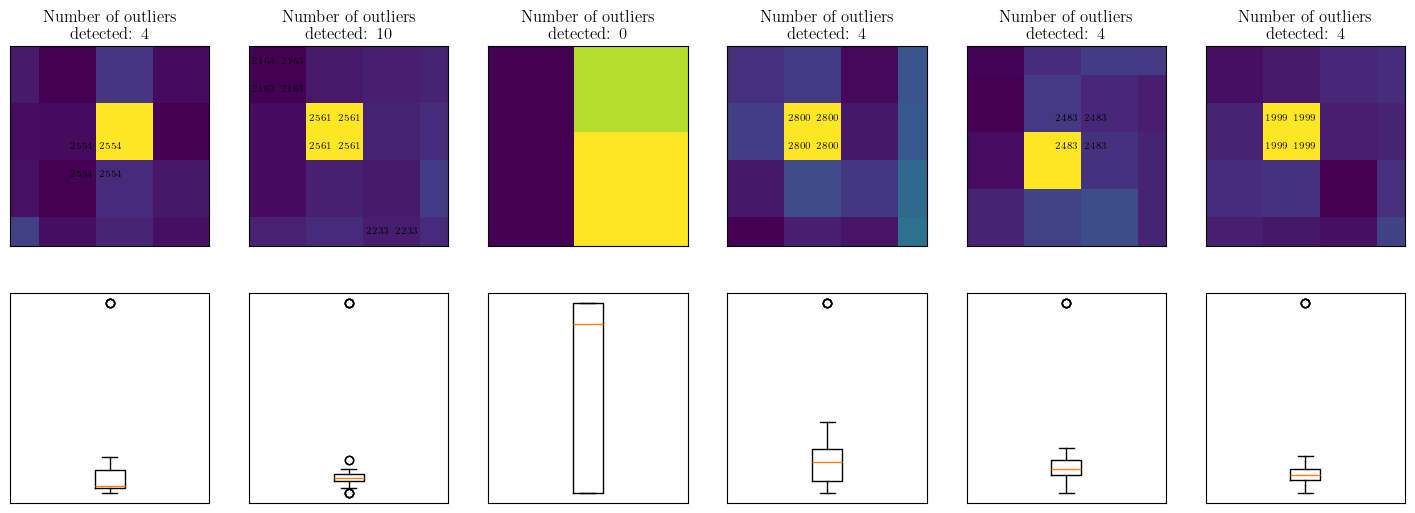

In [31]:
# Make a few tests.
lim = 7
n_samples = 6
object_test = objects.sample(n_samples)["REGION"]
# Create plots.
fig, axis = plt.subplots(2, 6, figsize = (18, 6))

for i in range(n_samples):
    # Plot image.
    img = object_test.iloc[i][lim:-lim, lim:-lim]
    axis[0, i].imshow(img)
    axis[0, i].set_xticks([])
    axis[0, i].set_yticks([])

    # Display outliers.
    outliers = iqr_test_all(img)
    for a in outliers:
        axis[0,i].text(a[0], a[1], str(np.round(img[a[0], a[1]], 2)), ha = "center", va = "center", fontsize = 7)
    axis[0,i].set_title(f"Number of outliers \n detected: {len(outliers)}")

    # Create boxplot
    a = axis[1,i].boxplot(img.flatten())
    axis[1, i].set_xticks([])
    axis[1, i].set_yticks([])
    

Here, arises a problem. Due to binning, some images have repeated pixels. Therefore, bright pixels instead of only having 1 point, have instead 4 points. So we need to fix this.

In [32]:
object_test

1151209    [[2182, 2182, 2236, 2236, 2140, 2140, 2192, 21...
215288     [[2164, 2166, 2166, 2200, 2200, 2142, 2142, 21...
1691772    [[1813, 1813, 1790, 1790, 1790, 1790, 1802, 18...
1174822    [[2521, 2492, 2492, 2570, 2570, 2575, 2575, 24...
786310     [[2176, 2212, 2212, 2201, 2201, 2177, 2177, 21...
1741155    [[1794, 1783, 1783, 1777, 1777, 1786, 1786, 18...
Name: REGION, dtype: object

In [33]:
index = 29998
f_name = objects.loc[index]["FILENAME"]
f_name

HEADERS_L0 = pd.read_pickle(os.path.join("resources", "L0_images.pkl"))

In [34]:
HEADERS_L0[HEADERS_L0["filename"] == f_name]

id                                    filename  \
17286  122178  solo_L0_metis-vl-image_0700047253_V01.fits   

                    filepath                                  file_raw  \
17286  L0/2022/03/08/206702/  2022-03-08T10.03.25.977494Z-VL_IMAGE.raw   

                   created       date_obs_start    pubblication_time  \
17286  2024-07-01 11:10:36  2022-03-08 09:36:59  2024-07-01 11:09:38   

            obt_end       obt_beg  compress  ...      ttype2 datamin  datamax  \
17286  7.000489e+08  7.000473e+08  lossless  ...  CPR_HEADER       0     5517   

        width  height  stp filter ltp  \
17286  1024.0  1024.0  192     VL   6   

                                                     url      datapack  
17286  https://metisarchive.oato.inaf.it/archive/data...  VL_IMAGE.raw  

[1 rows x 137 columns]

With this, we may see that the original size of the image was 1024 x 1024 pixels. Then, a binning was applied and the resultant L0 image is 2048 x 2048. Then, if there was a single bright pixel, now there will be 4 pixels.

**IQR test in objects**

In [ ]:
# Make a few tests.
lim = 5
n_samples = 6
object_test = stars.sample(n_samples)["REGION"]
# Create plots.
fig, axis = plt.subplots(2, 6, figsize = (18, 6))

for i in range(n_samples):
    # Plot image.
    img = object_test.iloc[i][lim:-lim, lim:-lim]
    axis[0, i].imshow(img)
    axis[0, i].set_xticks([])
    axis[0, i].set_yticks([])

    # Display outliers.
    outliers = iqr_test_all(img)
    for a in outliers:
        axis[0,i].text(a[0], a[1], str(np.round(img[a[0], a[1]], 2)), ha = "center", va = "center", fontsize = 7)
    axis[0,i].set_title(f"Number of outliers \n detected: {len(outliers)}")

    # Create boxplot
    a = axis[1,i].boxplot(img.flatten())
    axis[1, i].set_xticks([])
    axis[1, i].set_yticks([])
    

### 3.3. Check binning

All L0 images have the same size, which is 2048x20248. Nevertheless, the original image is not always that size. Then a binning process was done in order to have equal size images. First, let's see the distribution of sizes of the original images. 

In [ ]:
# Load fits information (raw one).
headers_raw = pd.read_pickle("resources/L0_images.pkl")
headers_raw.groupby(["width","height"]).size()

width   height
256.0   256.0     18420
512.0   512.0     32589
1024.0  1024.0    75309
2048.0  2048.0     3459
6496.0  982.0         2
dtype: int64

Here we can see, just 3458 images from our dataset have the original size equal to the actual size of the L0 images. Therefore, let's start working with this subset.

In [ ]:
# Select images with 2048 size.
filtered_headers = headers_raw[
    (headers_raw["filter"] == "VL") &
      (headers_raw["width"] == 2048.0) &
        (headers_raw["height"] == 2048.0)]

len(filtered_headers)

3459

Now, take only objects that come from these taken images and create a new dataframe with this information.

In [ ]:
# Merge dataframes and take just the values of the first dataframe.
objects_original = pd.merge(objects, filtered_headers, left_on = "FILENAME", right_on= "filename", how = "inner")[objects.columns]

Text(0, 0.5, 'y detector')

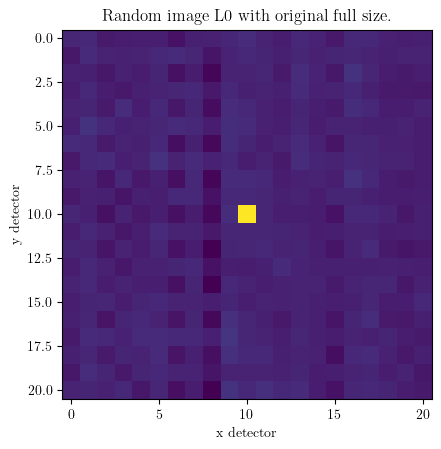

In [ ]:
# Show an example
plt.imshow(objects_original.sample(1)["REGION"].iloc[0])
plt.title("Random image L0 with original full size.")
plt.xlabel("x detector")
plt.ylabel("y detector")

### 3.4. Normalization and thresholding of peaks.

For making a possibly pre-classification on the objects, let's normalize the data and then keep the pixels with the highest values.

In [ ]:
def min_max_normalization(img):
    """
    Normalize image to [0,1] range.
    
    """
    return (img - np.min(img)) / (np.max(img) - np.min(img))

def z_normalization(img):
    """
    Normalize image using Z-score. 
    """
    u, std = np.mean(img), np.std(img)
    return (img - u) / std 

def peak_normalization(img):
    """Normalize according to peak value."""
    return (img / np.max(img))

Test different methods.

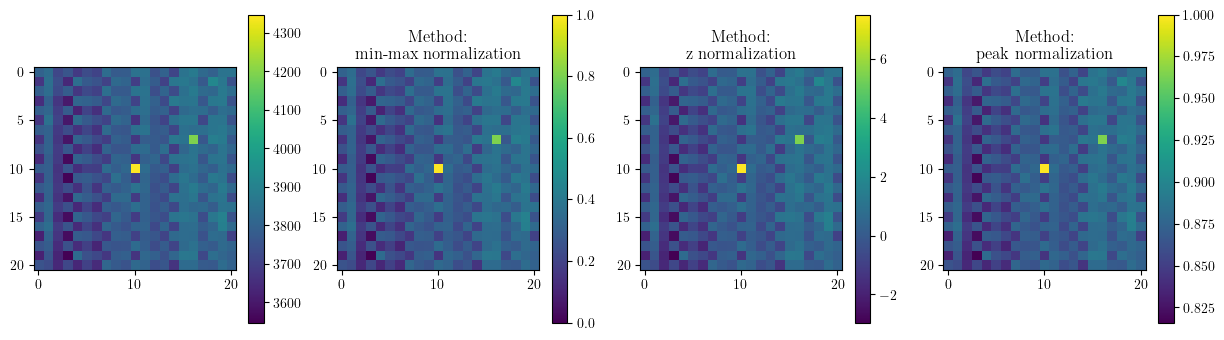

In [ ]:
# Load random image.
sample = objects_original.sample(1)
img = sample["REGION"].iloc[0]

# Plot original image and normalized versions. 
fig, axis = plt.subplots(1, 4, figsize =(15,4))
cax = axis[0].imshow(img, cmap = "viridis")
fig.colorbar(cax, ax = axis[0])

norm_methods = [min_max_normalization, z_normalization, peak_normalization]
norm_titles = ["min-max normalization", "z normalization", "peak normalization"]
for i in range(3):
    cax = axis[i+1].imshow(norm_methods[i](img))
    axis[i+1].set_title(f"Method: \n {norm_titles[i]}")
    fig.colorbar(cax, ax = axis[i+1])

Apply threshold and keep brightest pixels.

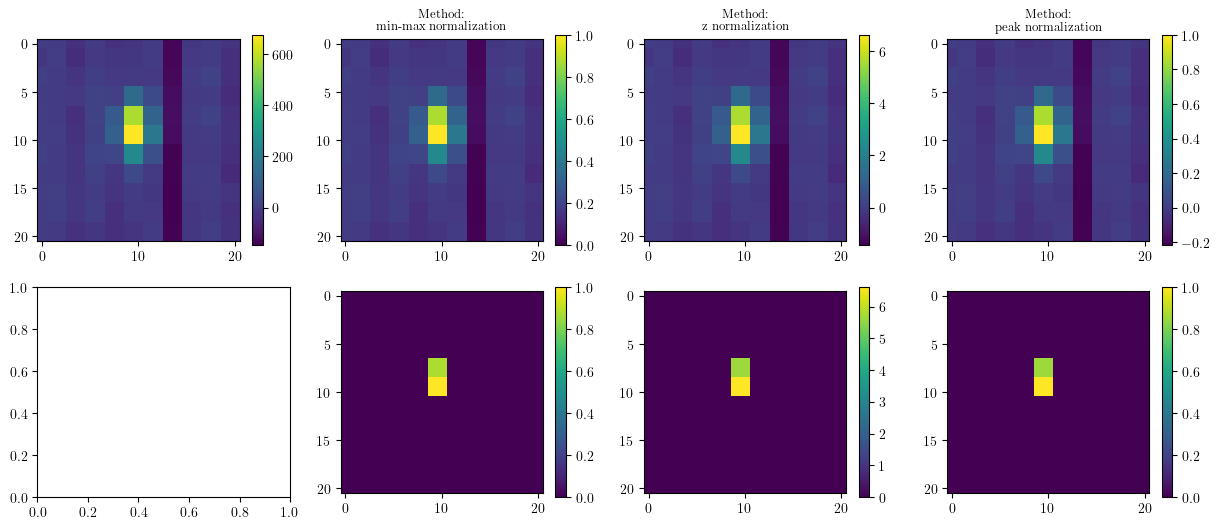

In [ ]:
sample = stars.sample(1)
img = sample["REGION"].iloc[0]
min_val = np.mean(img)
img = img - min_val
# Plot original image and normalized versions. 
fig, axis = plt.subplots(2, 4, figsize =(15,6))
cax = axis[0, 0].imshow(img, cmap = "viridis")
fig.colorbar(cax, ax = axis[0,0])

norm_methods = [min_max_normalization, z_normalization, peak_normalization]
norm_titles = ["min-max normalization", "z normalization", "peak normalization"]
norm_index = [0.5, 3, 0.5]

for i in range(2):
    
    for j in range(3):
        img_new = norm_methods[j](img)
        if i == 0:
            cax = axis[i, j+1].imshow(img_new)
            fig.colorbar(cax, ax = axis[i, j+1])
        else:
            img_new[img_new < norm_index[j]] = 0
            cax = axis[i, j+1].imshow(img_new)
            axis[0, j+1].set_title(f"Method: \n {norm_titles[j]}", fontsize = 9)
            fig.colorbar(cax, ax = axis[i, j+1])
            


Try and tune parameters with stars.

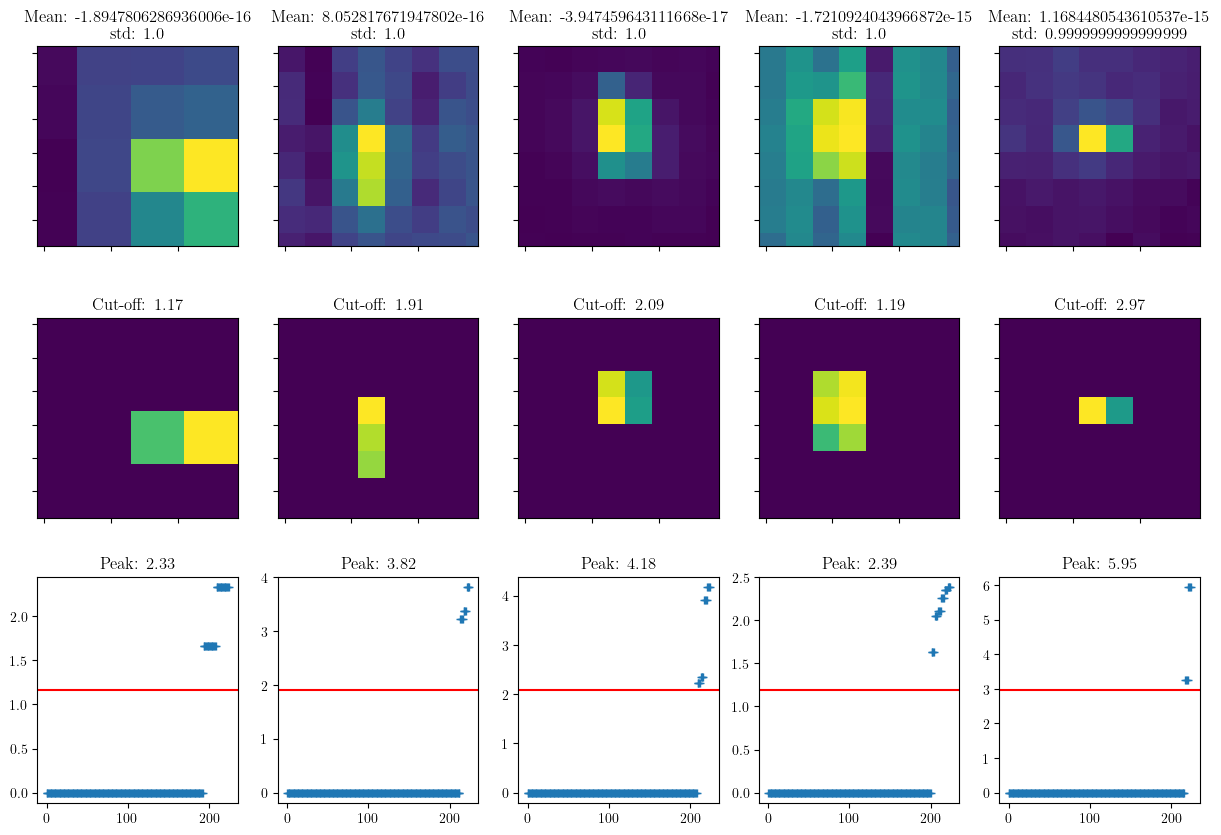

In [ ]:
# Try with Z normalization.
samples = stars.sample(5)["REGION"]
threshold = 3
fig, axis = plt.subplots(3, 5, figsize = (15, 10))

for i in range(5):
    # Take random image, reduce size and normalize.
    img = samples.iloc[i][threshold:-threshold, threshold:-threshold]
    img = z_normalization(img)
    u, std = np.mean(img), np.std(img)
    # Original image.
    axis[0,i].set_xticklabels([]), axis[0,i].set_yticklabels([])
    axis[0,i].set_title(f"Mean: {u} \n std: {std}")
    axis[0,i].imshow(img)

    # Apply cut-off.
    max_val = np.max(img)
    cut_off = max_val*0.5
    cut = img
    cut[cut < cut_off] = 0
    axis[1,i].imshow(cut)
    axis[1,i].set_title(f"Cut-off: {np.round(cut_off,2)}")
    axis[1,i].set_xticklabels([]), axis[1,i].set_yticklabels([])

    # Display distribution.
    axis[2,i].plot(np.sort(img.flatten()), "+")
    axis[2,i].axhline(cut_off, color = "red")
    axis[2,i].set_title(f"Peak: {np.round(max_val,2)}")

Test with objects.

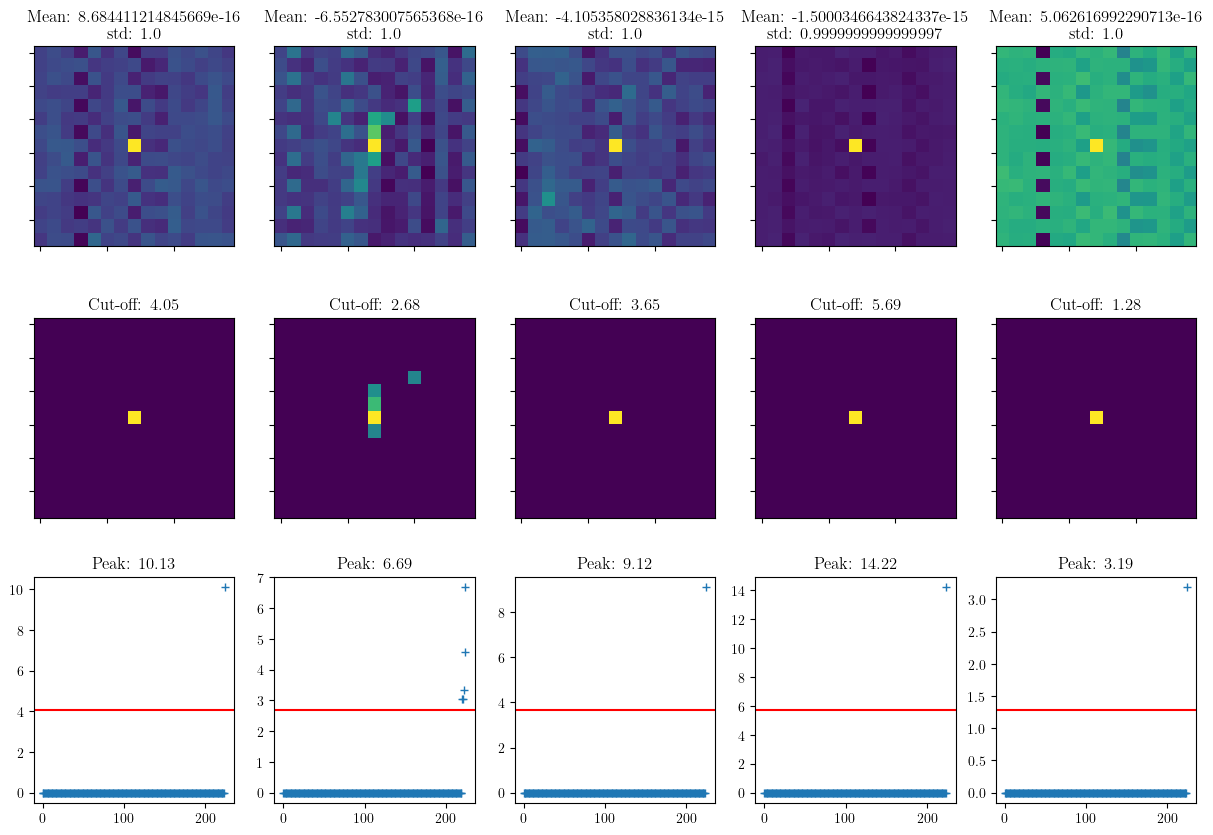

In [ ]:
# Try with Z normalization.
factor = 0.4
samples = objects_original.sample(5)["REGION"]
fig, axis = plt.subplots(3, 5, figsize = (15, 10))

for i in range(5):
    # Take random image, reduce size and normalize.
    img = samples.iloc[i][threshold:-threshold, threshold:-threshold]
    img = z_normalization(img)
    u, std = np.mean(img), np.std(img)
    # Original image.
    axis[0,i].set_xticklabels([]), axis[0,i].set_yticklabels([])
    axis[0,i].set_title(f"Mean: {u} \n std: {std}")
    axis[0,i].imshow(img)

    # Apply cut-off.
    max_val = np.max(img)
    cut_off = max_val*factor
    cut = img
    cut[cut < cut_off] = 0
    axis[1,i].imshow(cut)
    axis[1,i].set_title(f"Cut-off: {np.round(cut_off,2)}")
    axis[1,i].set_xticklabels([]), axis[1,i].set_yticklabels([])

    # Display distribution.
    axis[2,i].plot(np.sort(img.flatten()), "+")
    axis[2,i].axhline(cut_off, color = "red")
    axis[2,i].set_title(f"Peak: {np.round(max_val,2)}")

### 3.5. SNR Method.

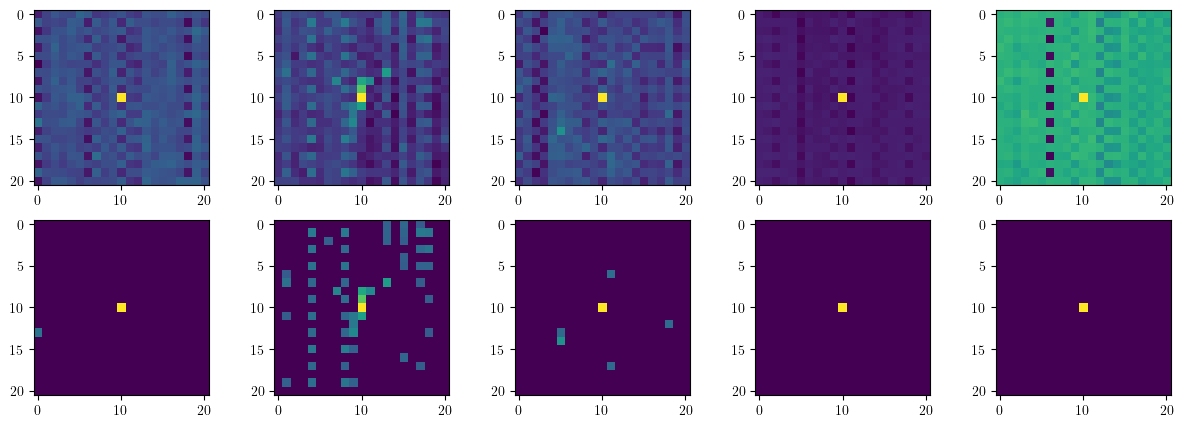

In [ ]:
def snr_mask(psf, alpha=3):
    background = psf[psf < np.percentile(psf, 70)]
    mean_bg = np.mean(background)
    std_bg = np.std(background)
    threshold = mean_bg + alpha * std_bg
    return np.where(psf >= threshold, psf, 0)

fig, axis = plt.subplots(2, 5, figsize = (15,5))
for i in range(5):
    img = samples.iloc[i] - np.min(samples.iloc[i])
    axis[0,i].imshow(img)
    axis[1,i].imshow(snr_mask(img))

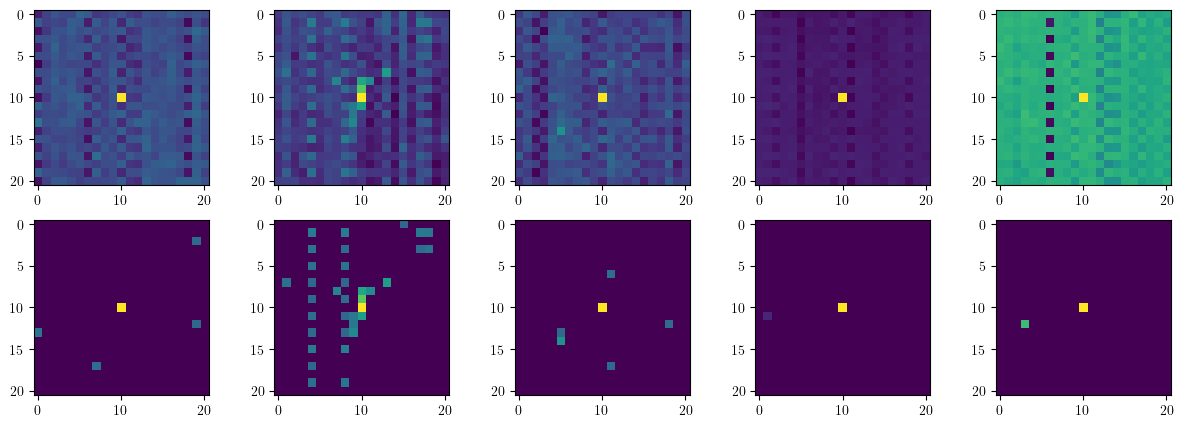

In [ ]:
def mad_mask(psf, k=3):
    median = np.median(psf)
    mad = np.median(np.abs(psf - median))
    threshold = median + k * mad
    return np.where(psf >= threshold, psf, 0)


fig, axis = plt.subplots(2, 5, figsize = (15,5))
for i in range(5):
    img = samples.iloc[i] - np.min(samples.iloc[i])
    axis[0,i].imshow(img)
    axis[1,i].imshow(mad_mask(img))

# 4. Dataset reduction.

Before feeding the objects into machine learning methods, first we need to filter the noisy elements.

These could be:
1. Bright pixels -> defective pixels or cosmic rays.
2. Noisy images -> noise, images near FOV limits.

But first, let's crop the images. Original size of the detected objects are 20x20, then we could try to reduce it size due to object itself is just 5x5 of the size.


In [ ]:
objects_original_raw = objects_original
objects_original_raw["REGION"] = objects_original["REGION"].apply(lambda r: r[5:-5, 5:-5])

### 4.1. Remove objects near to the FOV limts

Some obtained objects were affected by the FOV limits, resulting in false positives. So, let's filter objects that are close to those limits. 

In [ ]:
def points_inside_fov_factor(x, y, center, scale, factor = 0):
    """
    Remove objects whose coordinates are outside metis detection region.

    Parameters:
        x (float): x coordinate of the detected object.
        y (float): y coordinate of the detected object.
        center (list): x, y coordinate of the metis center POV.
        scale (float): scale factor for matching FOV limits with the image.
        factor (float): multiplication factor for tunning up FOV limit.

    Return:
        (bool): True if detected object falls in new region.
    """

    # Metis FOV.
    radius1 = (sf.METIS_fov_min + factor)/scale
    radius2 = (sf.METIS_fov - factor)/scale

    # Check if object is outside first boundary.
    outside_first = (x - center[0])**2 + (y - center[1])**2 >= radius1**2
    # Check if object is inside second boundary.
    inside_second = (x - center[0])**2 + (y - center[1])**2 <= radius2**2

    return outside_first and inside_second

Apply new filter.

In [ ]:
# Set parameters.
scale = 0.0028158333333333334
center = [966.075, 998.87]
factor = 0.1

# Create new column.
objects_original_raw["FILTER 1"] = False

# Apply filter for all objects.
for i in range(len(objects_original_raw)):
    x = objects_original_raw["X_COORD"].iloc[i]
    y = objects_original_raw["Y_COORD"].iloc[i]
    if points_inside_fov_factor(x, y, center, scale, factor):
        objects_original_raw["FILTER 1"].iloc[i] = True

In [ ]:
# Display removed objects.
objects_original_raw.groupby("FILTER 1").count()

LTP     STP     IDX  PEAK_VAL  X_COORD  Y_COORD  PRE_LABEL  \
FILTER 1                                                                  
False      27166   27166   27166     27166    27166    27166      27166   
True      323968  323968  323968    323968   323968   323968     323968   

            INFO  REGION  FILENAME  PEAK RANGE  
FILTER 1                                        
False      27166   27166     27166       27166  
True      323968  323968    323968      323968

In [ ]:
# Count number of objects outside new fov.
objects_original_raw.groupby("FILTER 1").count()
print(f"Dataset reduction: {(objects_original.groupby('FILTER 1').count().iloc[0][0]/len(objects_original))} %")

Dataset reduction: 0.07736647547659868 %


Show how the algorithm works by displaying accepted and rejected objects.

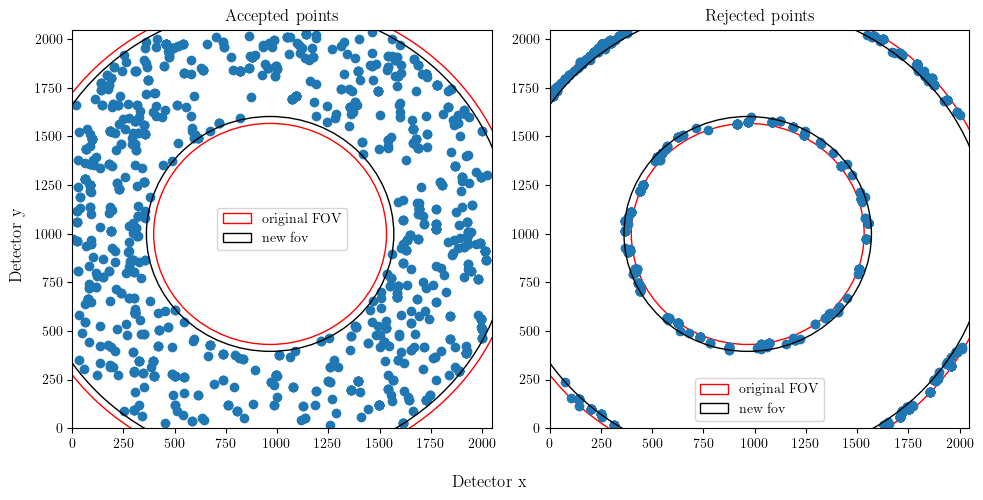

In [ ]:
# Take in and out points FOV.
n = 1000
points_obt = [objects_original_raw[objects_original_raw["FILTER 1"] == True].sample(n),
              objects_original_raw[objects_original_raw["FILTER 1"] == False].sample(n)]

# Filter already applied.
fig, axis = plt.subplots(1, 2, figsize = (10, 5))
titles = ["Accepted points", "Rejected points"]
fig.supxlabel("Detector x")
fig.supylabel("Detector y")
for i in range(2):

    axis[i].set_title(titles[i])
    axis[i].add_artist(plt.Circle(xy =center, radius= sf.METIS_fov/scale, fill = None, color = "red", label = "original FOV"))
    axis[i].add_artist(plt.Circle(xy = center, radius= sf.METIS_fov_min/scale, fill = None, color = "red"))
    axis[i].set_xlim(0, 2048)
    axis[i].set_ylim(0, 2048)
    axis[i].scatter(points_obt[i]["X_COORD"], points_obt[i]["Y_COORD"])
    axis[i].add_artist(plt.Circle(xy =center, radius= (sf.METIS_fov - factor)/scale, fill = None, color = "black", label = "new fov"))
    axis[i].add_artist(plt.Circle(xy = center, radius= (sf.METIS_fov_min + factor)/scale, fill = None, color = "black"))
    axis[i].legend()

plt.tight_layout()

In [ ]:
# Create new dataframe.
objects_original_1 = objects_original_raw[objects_original_raw["FILTER 1"] == True]
len(objects_original_1)

323968

### 4.2. Count brightest points.

For image, normalize and count the brightest points given a threshold.

In [ ]:
def z_score_all(img, factor = 0.2):

    """
    Normalize an image using a Z-score, then keep and count the brightest points.

    Parameters:
        img (2d-array): image with the detected object.
        factor (float): threshold factor for taking most intense peaks.
    Output:
        number_points: number of accepted pixels.
        coordinates: x,y coordinates of accepted pixels.
    """

    img = z_normalization(img)
    max_val = np.max(img)
    img[img < max_val*factor] = 0
    x, y  = np.where(img != 0)
    coords = [[int(xi), int(yi)] for xi, yi in zip(x, y)]
    
    return  coords, len(coords)


In [ ]:
objects_original_1["FILTER 2 N"] = None
objects_original_1["FILTER 2 P"] = None

In [ ]:
for i in range(len(objects_original_1)):
    p_filt, n_filt = z_score_all(objects_original_1["REGION"].iloc[i], 0.4)
    objects_original_1["FILTER 2 N"].iloc[i] = n_filt
    objects_original_1["FILTER 2 P"].iloc[i] = p_filt

In [ ]:
objects_original_1.groupby("FILTER 2 N").count()

LTP     STP     IDX  PEAK_VAL  X_COORD  Y_COORD  PRE_LABEL  \
FILTER 2 N                                                                  
1           286728  286728  286728    286728   286728   286728     286728   
2            28914   28914   28914     28914    28914    28914      28914   
3             3358    3358    3358      3358     3358     3358       3358   
4              980     980     980       980      980      980        980   
5              370     370     370       370      370      370        370   
...            ...     ...     ...       ...      ...      ...        ...   
83              18      18      18        18       18       18         18   
84               1       1       1         1        1        1          1   
86               1       1       1         1        1        1          1   
87               1       1       1         1        1        1          1   
92               1       1       1         1        1        1          1   

              INFO  REGION  FILENAME  PEAK RANGE  FILTER 1  FILTER 2 P  
FILTER 2 N                                                              
1           286728  286728    286728      286728    286728      286728  
2            28914   28914     28914       28914     28914       28914  
3             3358    3358      3358        3358      3358        3358  
4              980     980       980         980       980         980  
5              370     370       370         370       370         370  
...            ...     ...       ...         ...       ...         ...  
83              18      18        18          18        18          18  
84               1       1         1           1         1           1  
86               1       1         1           1         1           1  
87               1       1         1           1         1           1  
92               1       1         1           1         1           1  

[85 rows x 13 columns]

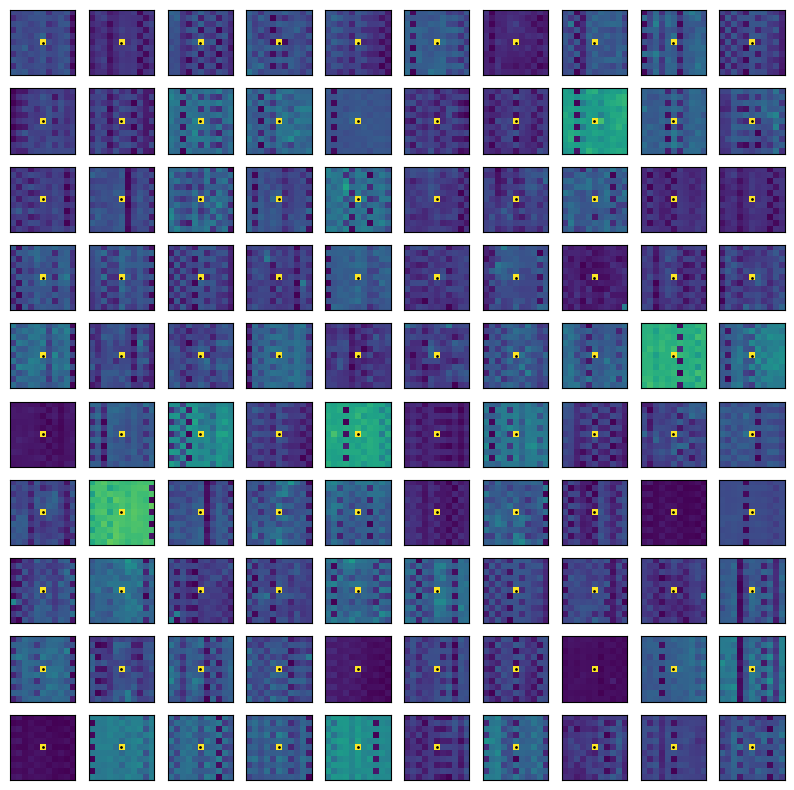

In [ ]:
def display_objects(dataframe, points, n = 100):
    
    samples = dataframe[dataframe["FILTER 2 N"] == points].sample(n)
    s = round(np.sqrt(n))
    fig, axis = plt.subplots(s, s, figsize = (10,10))
    axis = axis.flatten()

    try:
        for i in range(n):
            img = samples["REGION"].iloc[i]
            pos = samples["FILTER 2 P"].iloc[i]
            axis[i].imshow(img)
            axis[i].set_xticks([])
            axis[i].set_yticks([])

            for poss in pos:
                axis[i].scatter(poss[1], poss[0], s = 1, c = "k")
    except:
        print("No more samples found!")

display_objects(objects_original_1, 1, n = 100)

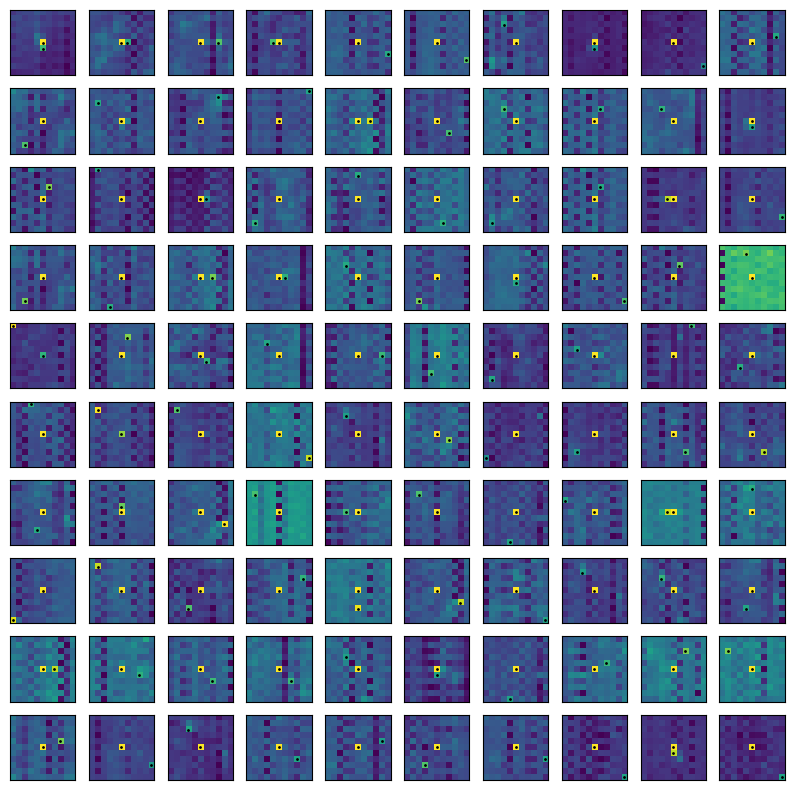

In [ ]:
display_objects(objects_original_1, 2, n = 100)

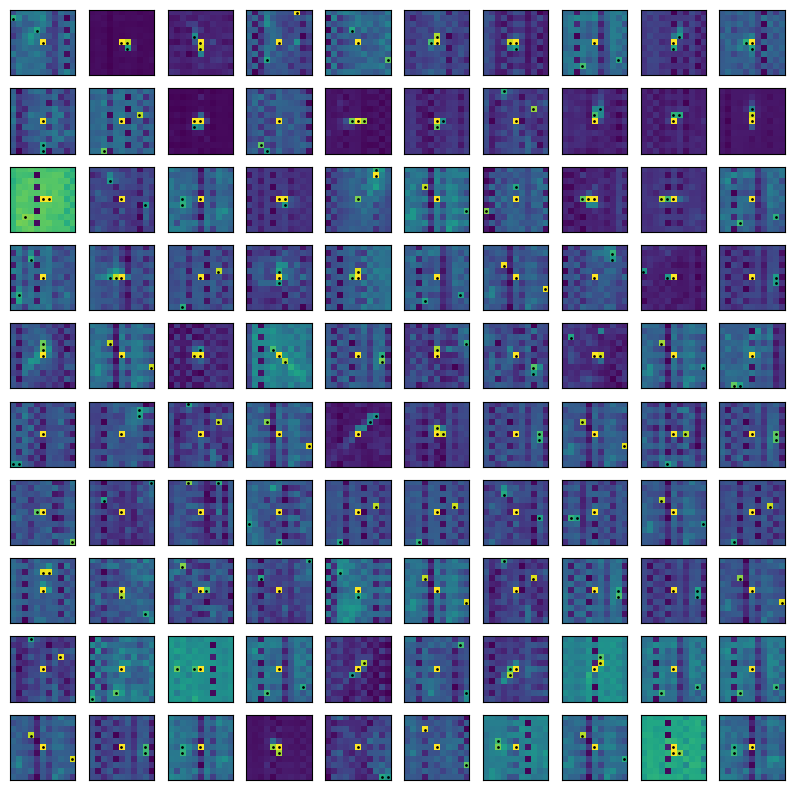

In [ ]:
display_objects(objects_original_1, 3, n = 100)

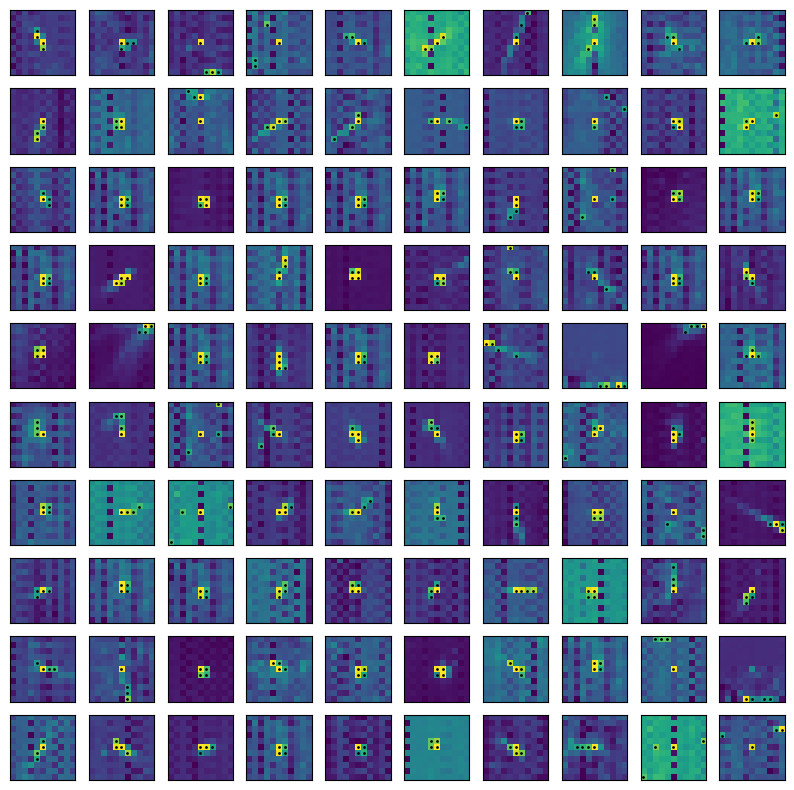

In [ ]:
display_objects(objects_original_1, 4, n = 100)

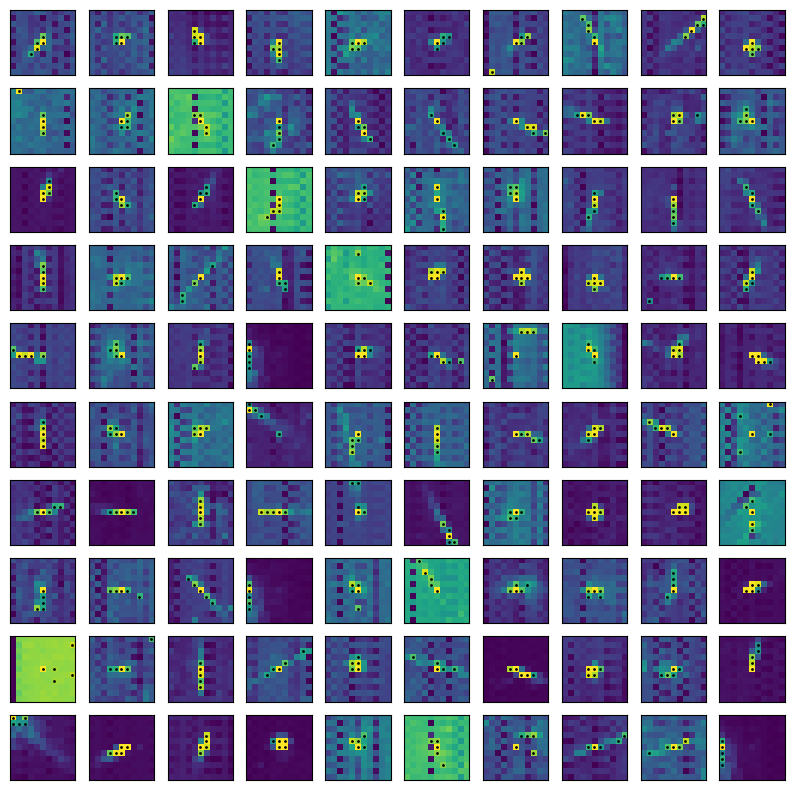

In [ ]:
display_objects(objects_original_1, 5, n = 100)

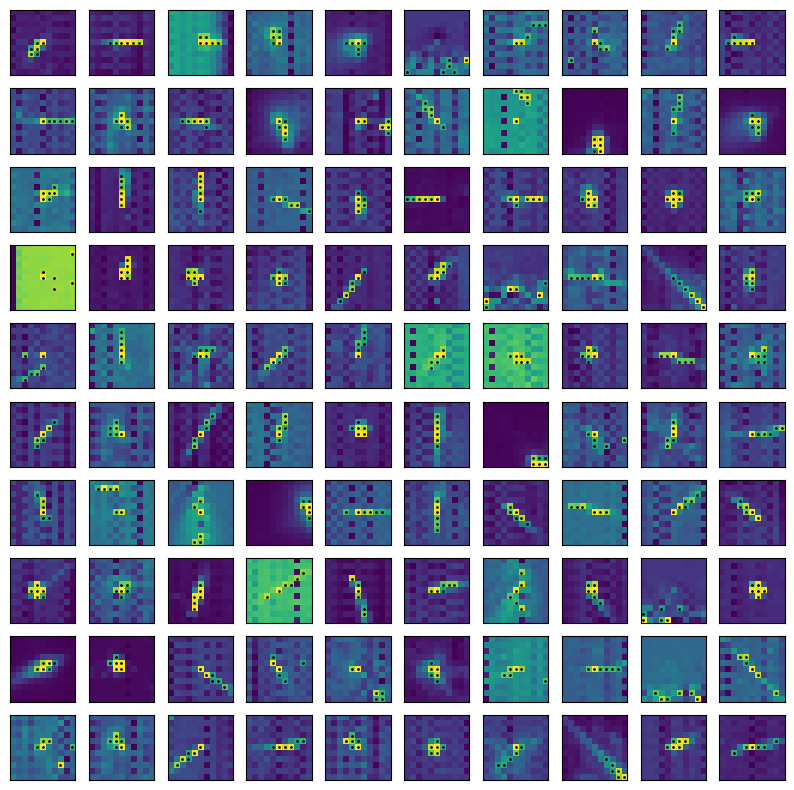

In [ ]:
display_objects(objects_original_1, 6, n = 100)

Number of samples: 286728


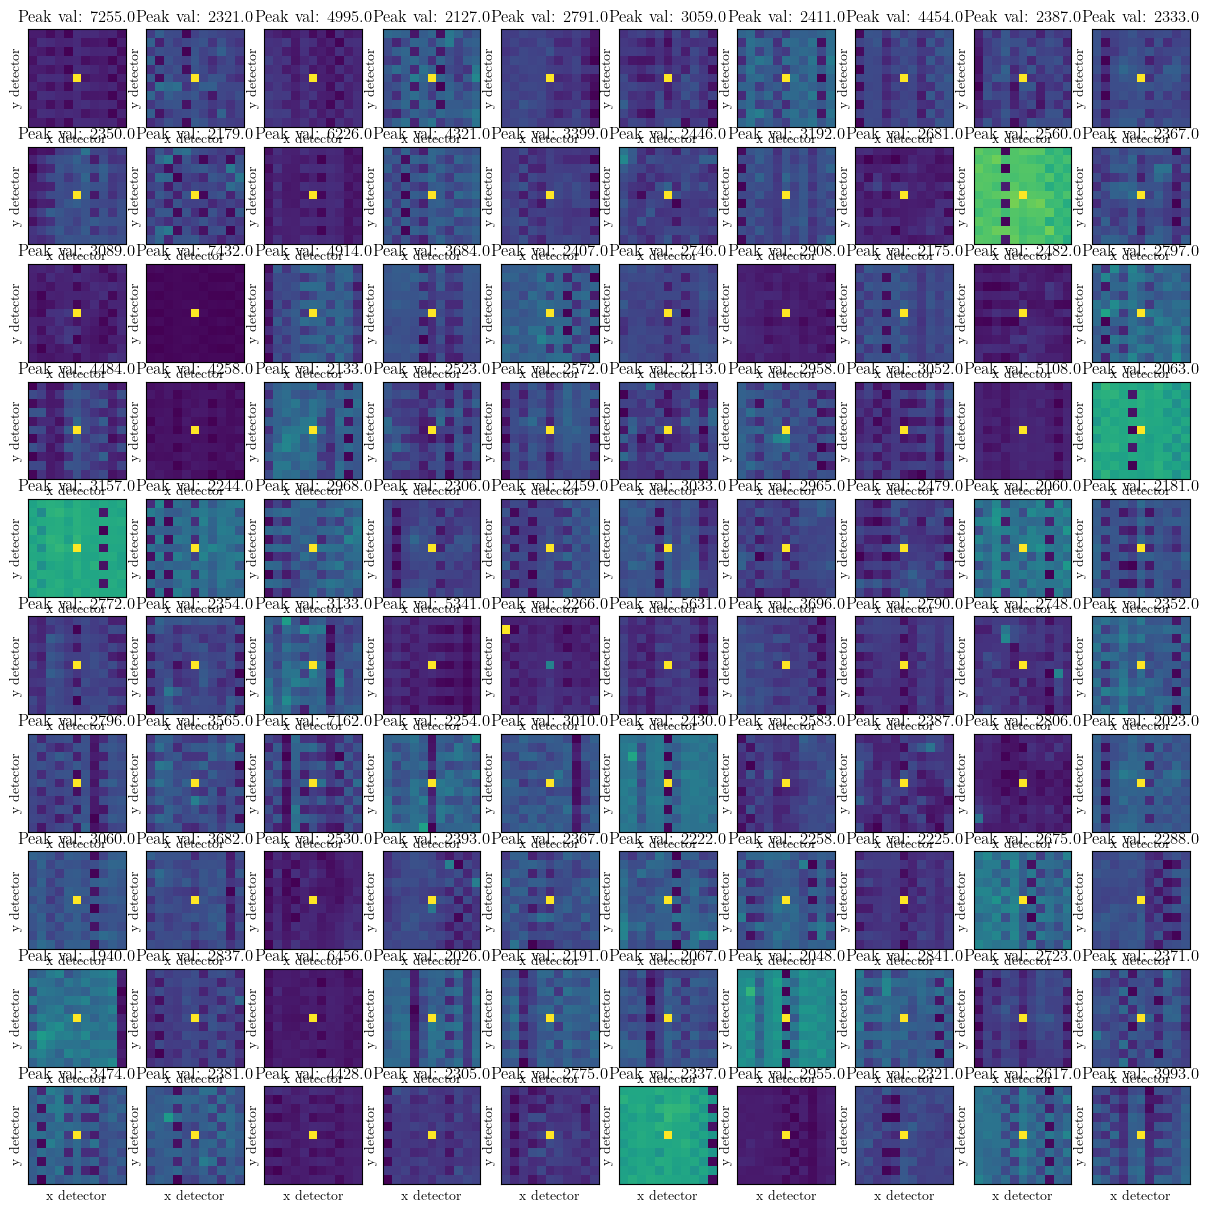

In [ ]:
# Remove points that are bright pixels.
bright_pixels_100 = objects_original_1[objects_original_1["FILTER 2 N"] == 1]

fig, axis = plt.subplots(10,10, figsize = (15,15))
axis = axis.flatten()

samples = bright_pixels_100.sample(100)
for i in range(100):
    img = samples["REGION"].iloc[i]
    peak = samples["PEAK_VAL"].iloc[i]
    axis[i].imshow(img)
    axis[i].set_xticks([])
    axis[i].set_yticks([])
    axis[i].set_xlabel("x detector")
    axis[i].set_ylabel("y detector")
    axis[i].set_title(f"Peak val: {peak}")

print(f"Number of samples: {len(bright_pixels_100)}")

Number of samples: 2166


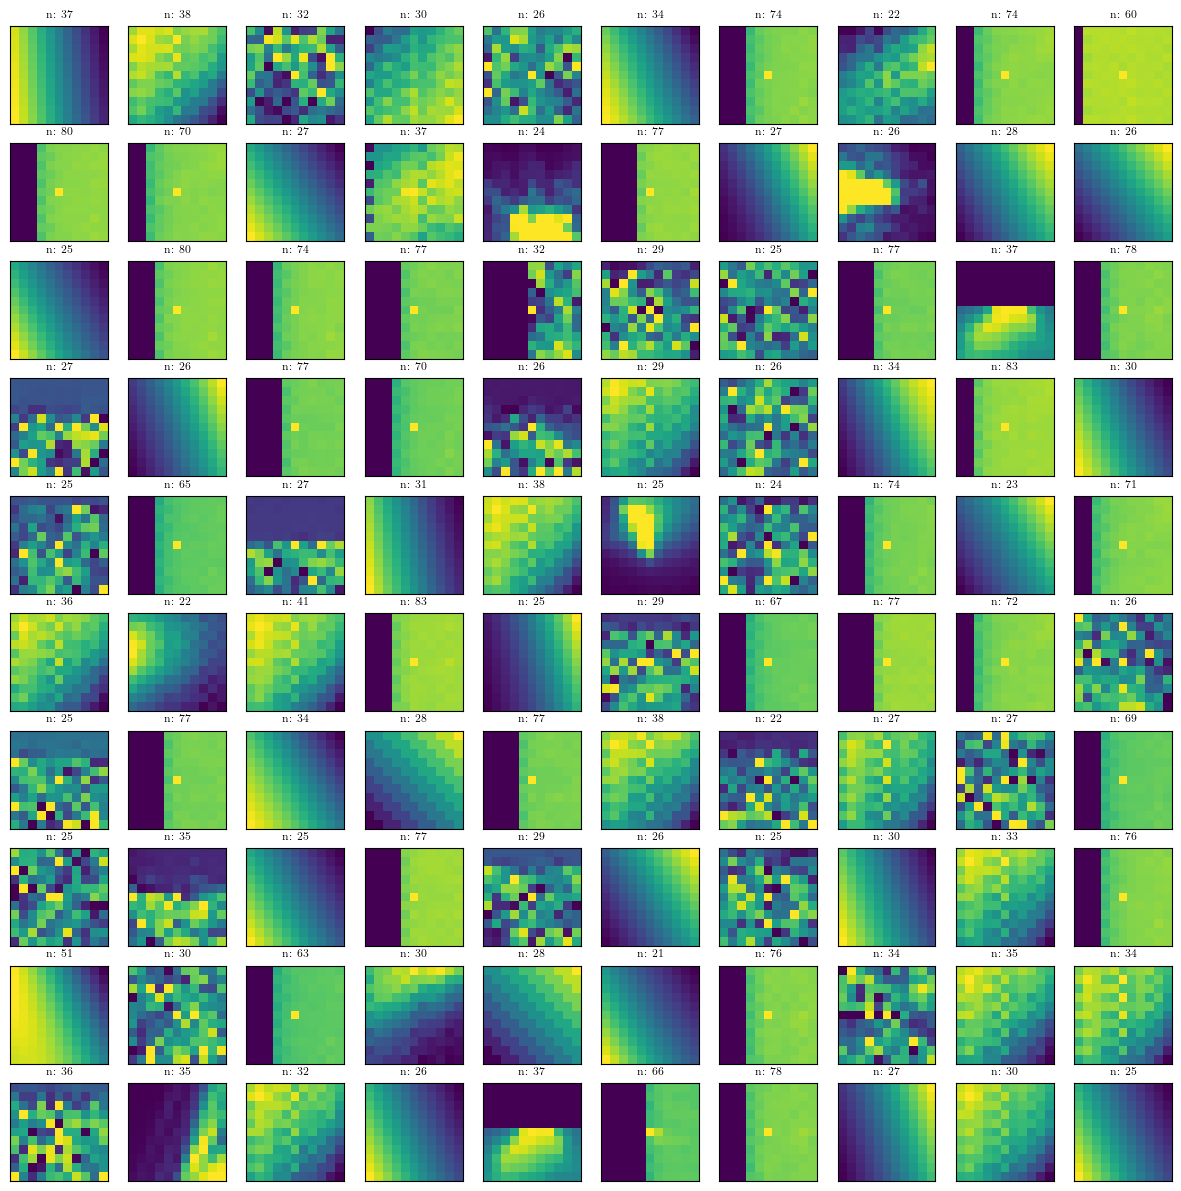

In [ ]:
# Remove possible noise points.
noisy_pixels_80 = objects_original_1[objects_original_1["FILTER 2 N"] > 20]

fig, axis = plt.subplots(10,10, figsize = (15,15))
axis = axis.flatten()

samples = noisy_pixels_80.sample(100)
for i in range(100):
    img = samples["REGION"].iloc[i]
    peak = samples["PEAK_VAL"].iloc[i]
    n_points = samples["FILTER 2 N"].iloc[i]
    axis[i].imshow(img)
    axis[i].set_xticks([])
    axis[i].set_yticks([])
    axis[i].set_title(f"n: {n_points}", fontsize = 8)
print(f"Number of samples: {len(noisy_pixels_80)}")

In [ ]:
objects_original_2 = objects_original_1[(objects_original_1["FILTER 2 N"]!= 1) & (objects_original_1["FILTER 2 N"] <20)]
print(f"Size: {len(objects_original_2)}")

Size: 34970


### 4.3 Divide by layers.

In [ ]:

def check_nearest_neighbors(img, coords, values_all=None, visited=None, threshold = 0.6):
    """
    Check nearest neighbors of a given bright pixel and take the ones with a similar brightness. 
    Store the position and repeat the process again for the selected ones.

    Parameters:
        img (2d array): point spread function with the possible object.
        coords (array): bright pixel coordinate.
        values_all (array): position of found pixels.
        visited (set): already visited points.
    
    Output:
        values_all (array): position of found pixels.
    """

    
    if values_all is None:
        values_all = np.empty((0, 2), dtype=int)
    if visited is None:
        visited = set()

    for val in coords:
        i, j = val[0], val[1]
        if (i, j) in visited:
            continue
        if i-1 <0 or j-1 <0 or i+1 > 14 or j +1 >14:
            continue

        visited.add((i, j))
        #initial_brightness = img[i,j]
        new_img = img[i-1:i+2, j-1:j+2]
        #mask = new_img > initial_brightness*0.5
        mask = new_img > threshold
        mask[1, 1] = False  

        values = np.argwhere(mask) + np.array([i - 1, j - 1])
        
        values = np.array([tuple(v) for v in values if tuple(v) not in visited])
        
        if len(values) == 0:
            continue
        
        values_all = np.vstack([values_all, values])
        values_all = check_nearest_neighbors(img, values, values_all, visited)

    return np.unique(values_all, axis = 0)


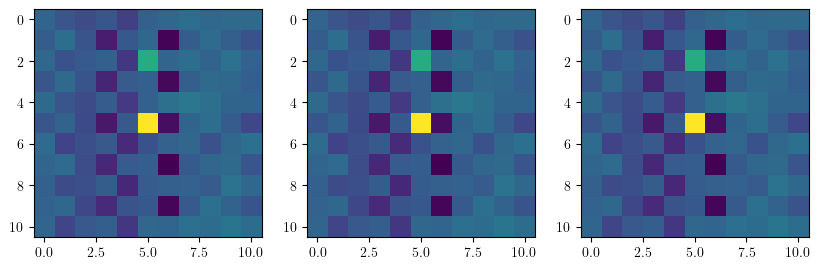

In [ ]:
sample = objects_original_2.sample(1)

fig, axis = plt.subplots(1, 3, figsize = (10,3))
img = sample["REGION"].iloc[0]
methods = [ut.normalize_array, z_normalization, peak_normalization]
for i in range(3):
    img = methods[i](img)
    axis[i].imshow(img)
    points = check_nearest_neighbors(img, [[5,5]], threshold= img[5,5]*0.5)
    for j in points:
        axis[i].scatter(j[1], j[0])
        text = np.round(img[j[0], j[1]],2)
        axis[i].text(j[1], j[0], str(text))

Sample:

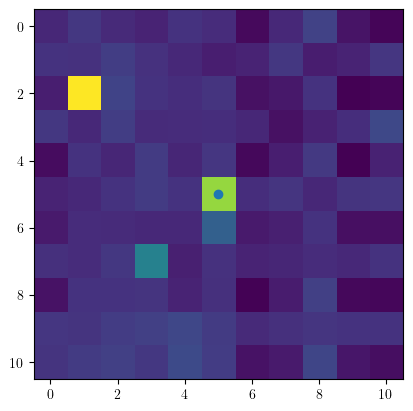

In [ ]:
limit = 0.5
img = objects_original_2.sample(1)["REGION"].iloc[0]
img_norm = ut.normalize_array(img)
coords = [[5,5]]
values = check_nearest_neighbors(img_norm, coords, threshold=img[5,5]*limit)
cut_off = 2
plt.imshow(img_norm)
plt.scatter(5, 5)
try:
    for i in values:
        plt.scatter(i[1], i[0])
except:
    print("No points")

In [ ]:
objects_original_2["FILTER 3 P"] = None
objects_original_2["FILTER 3 N"] = None
for i in range(len(objects_original_2)):
    img_raw = objects_original_2["REGION"].iloc[i]
    img = ut.normalize_array(img_raw)
    values = check_nearest_neighbors(img, [[5,5]], threshold=0.5)
    number = len(values)
    objects_original_2["FILTER 3 P"].iloc[i] = values
    objects_original_2["FILTER 3 N"].iloc[i] = number

In [ ]:
objects_original_2.groupby("FILTER 3 N").count().sort_values(by = "LTP", ascending= True).head(10)

LTP  STP  IDX  PEAK_VAL  X_COORD  Y_COORD  PRE_LABEL  INFO  \
FILTER 3 N                                                               
50            1    1    1         1        1        1          1     1   
74            1    1    1         1        1        1          1     1   
94            1    1    1         1        1        1          1     1   
79            1    1    1         1        1        1          1     1   
72            1    1    1         1        1        1          1     1   
67            1    1    1         1        1        1          1     1   
75            1    1    1         1        1        1          1     1   
40            2    2    2         2        2        2          2     2   
70            2    2    2         2        2        2          2     2   
83            2    2    2         2        2        2          2     2   

            REGION  FILENAME  PEAK RANGE  FILTER 1  FILTER 2 N  FILTER 2 P  \
FILTER 3 N                                                                   
50               1         1           1         1           1           1   
74               1         1           1         1           1           1   
94               1         1           1         1           1           1   
79               1         1           1         1           1           1   
72               1         1           1         1           1           1   
67               1         1           1         1           1           1   
75               1         1           1         1           1           1   
40               2         2           2         2           2           2   
70               2         2           2         2           2           2   
83               2         2           2         2           2           2   

            FILTER 3 P  
FILTER 3 N              
50                   1  
74                   1  
94                   1  
79                   1  
72                   1  
67                   1  
75                   1  
40                   2  
70                   2  
83                   2

Number of bright pixels: 24331


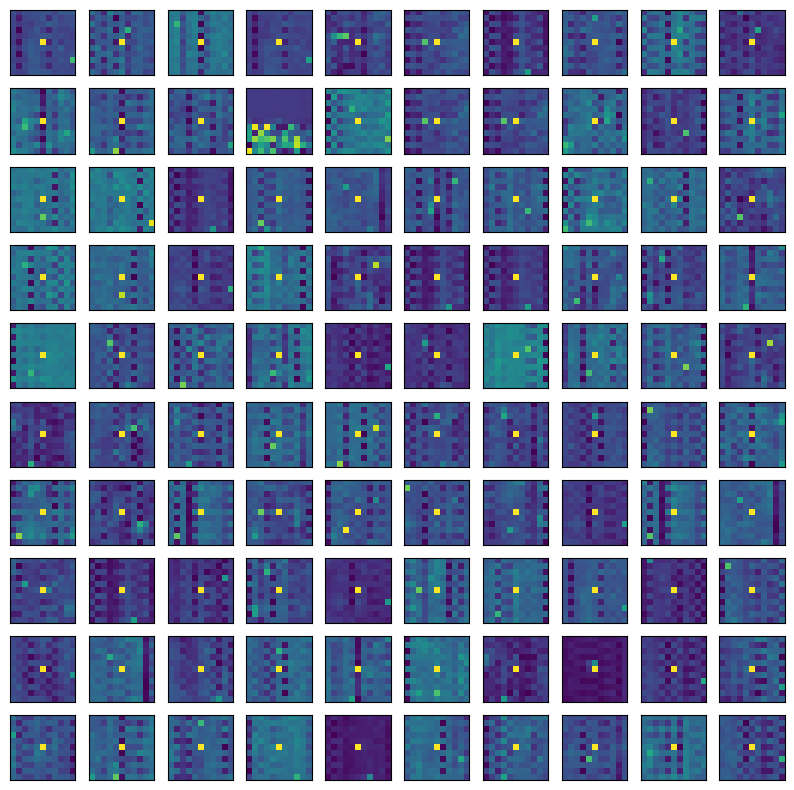

In [ ]:
fig, axis = plt.subplots(10, 10, figsize = (10,10))
axis = axis.flatten()

samples = objects_original_2[objects_original_2["FILTER 3 N"] == 0].sample(100)

for i in range(100):
    axis[i].imshow(samples["REGION"].iloc[i])
    axis[i].set_xticks([])
    axis[i].set_yticks([])

print(f"Number of bright pixels: {len(objects_original_2[objects_original_2['FILTER 3 N'] == 0])}")

1096


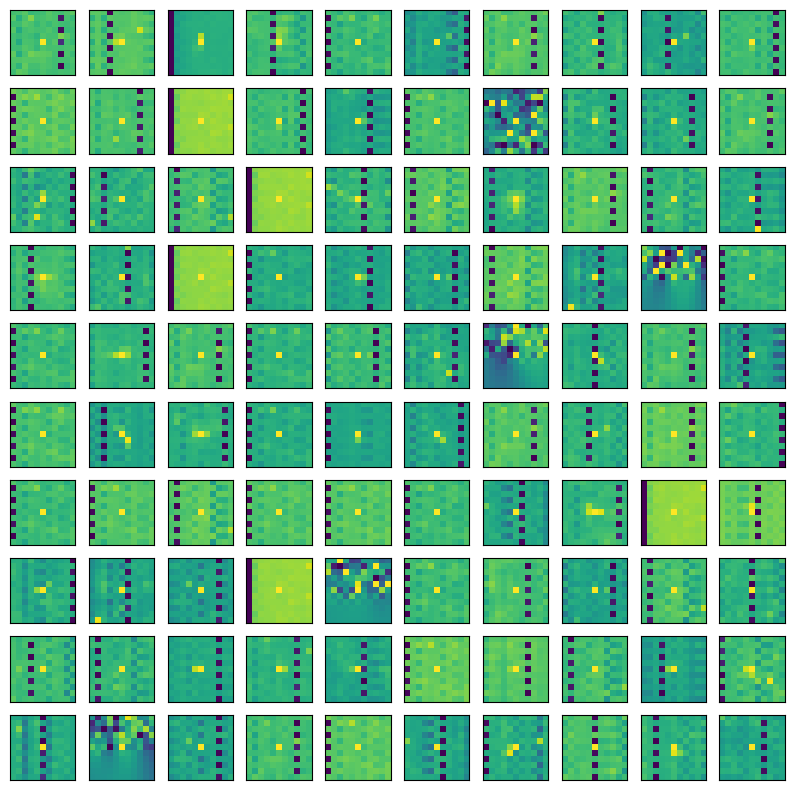

In [ ]:
fig, axis = plt.subplots(10, 10, figsize = (10,10))
axis = axis.flatten()

samples = objects_original_2[objects_original_2["FILTER 3 N"] > 20].sample(100)

for i in range(100):
    axis[i].imshow(samples["REGION"].iloc[i])
    axis[i].set_xticks([])
    axis[i].set_yticks([])
print(len(objects_original_2[objects_original_2["FILTER 3 N"] > 20]))

In [ ]:
objects_original_3 = objects_original_2[(objects_original_2["FILTER 3 N"] != 0) & (objects_original_2["FILTER 3 N"] < 20)]
print(f"Number of objects: {len(objects_original_3)}")

Number of objects: 9519


(<matplotlib.lines.Line2D at 0x7487f1ee0280>,
 <matplotlib.lines.Line2D at 0x7487f1ea8f70>)

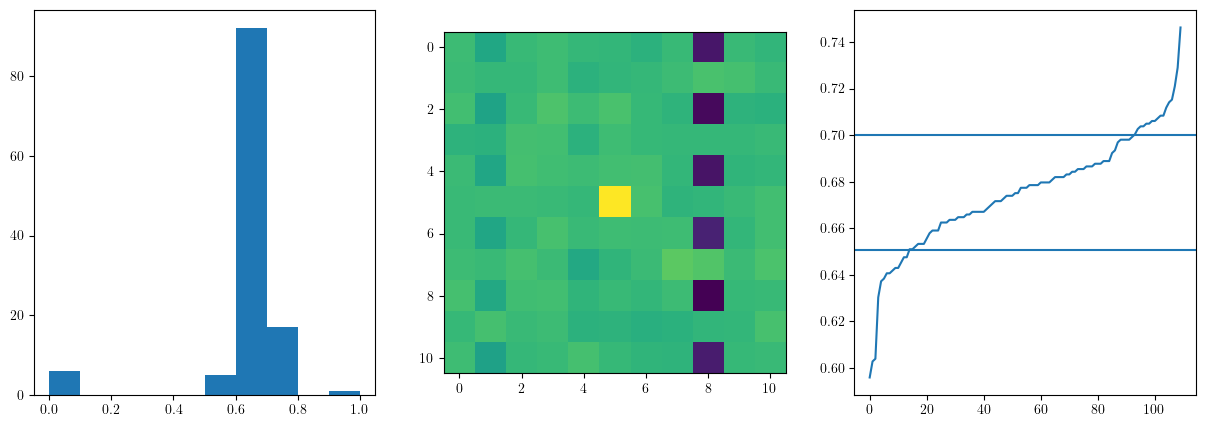

In [233]:
sample = objects_original_2[objects_original_2["FILTER 3 N"] > 20].sample(1)
fig, axis = plt.subplots(1, 3, figsize = (15, 5))
img = ut.normalize_array(sample["REGION"].iloc[0][2:-2, 2:-2])
sample_flatten = img.flatten()
values = np.sort(sample_flatten)[10:-1]
std = np.std(values)
mean = np.mean(values)
axis[0].hist(sample_flatten)
axis[1].imshow(img)
axis[2].plot(values)
axis[2].axhline(mean+std), axis[2].axhline(mean-std)

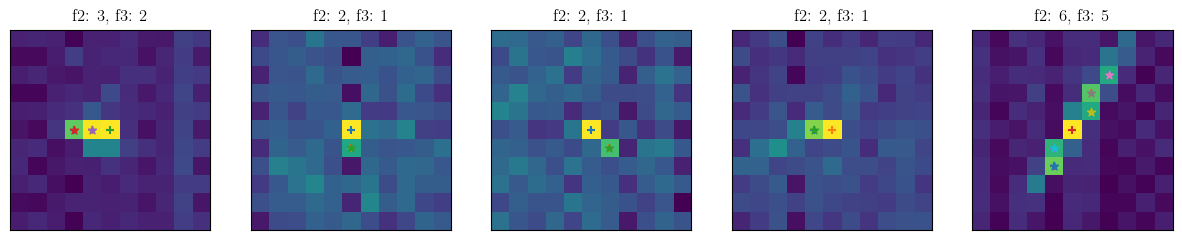

In [86]:
fig, axis = plt.subplots(1, 5, figsize = (15, 4))
samples = objects_original_3.sample(5)
for i in range(5):
    img = samples["REGION"].iloc[i]
    filter_2 = samples["FILTER 2 N"].iloc[i]
    filter_2p = samples["FILTER 2 P"].iloc[i]
    filter_3 = samples["FILTER 3 N"].iloc[i]
    filter_3P = samples["FILTER 3 P"].iloc[i]
    for x, y in filter_2p:
        axis[i].scatter(y,x, marker ="+")
    for x, y in filter_3P:
        axis[i].scatter(y, x, marker ="*")
    axis[i].imshow(img)
    axis[i].set_xticks([])
    axis[i].set_yticks([])
    axis[i].set_title(f"f2: {filter_2}, f3: {filter_3}")


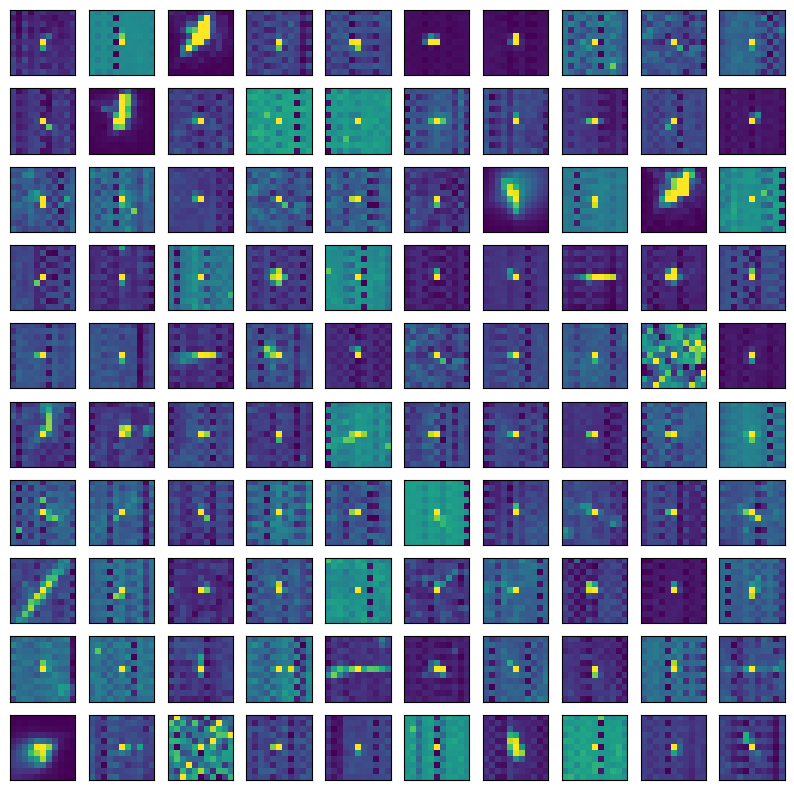

In [ ]:
fig, axis = plt.subplots(10, 10, figsize = (10,10))
axis = axis.flatten()

samples = objects_original_3.sample(100)

for i in range(100):
    axis[i].imshow(samples["REGION"].iloc[i])
    axis[i].set_xticks([])
    axis[i].set_yticks([])

In [96]:
# Save possible objects.
objects_original_3.to_pickle("possible_objects3.pkl")

### 4.3. Compute center of mass.

As we can see, some of the detected peaks do not follow an specific distributions. In fact, are disorganized and affected by the dark current and bias. Therefore, let's compute the center of mass of the points to see which objects follow a sharper distribution.

In [90]:
def points_inside(pairs, center, radius):
    """Check which points fall below a cirular region whose center is the center of mass 
    Parameters:
        pairs (list): list with xy coordinates of points.
        center (list): center of mass of the points.
        radius (size): radius of the region.

    Output:
        ration (float): ratio of inside/total points.
    """
    x, y = center
    counts = 0
    for point in pairs:
        x, y = point
        if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
            counts +=1
    return counts/len(pairs)

Check radius for enclosing points.

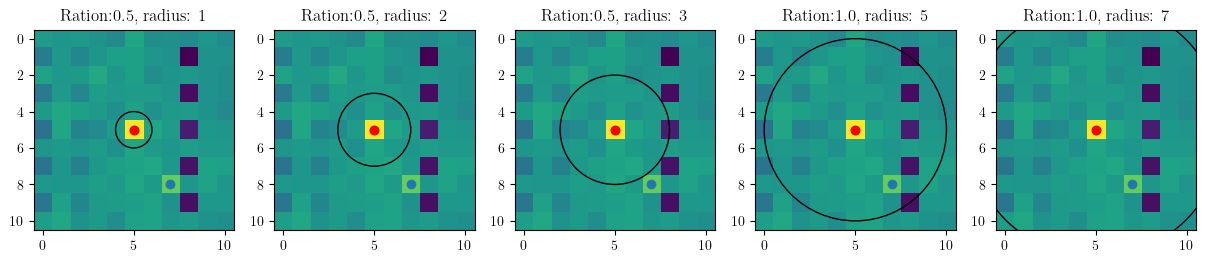

In [92]:
# Take a random image.
image = objects_original_3.sample(1)
points = np.array(image["FILTER 2 P"].iloc[0])
coord = [5, 5]

# Display
fig, axis = plt.subplots(1, 5, figsize = (15, 3))
radius = [1, 2, 3, 5, 7]
for i in range(5):
    ratio = points_inside(points, coord, radius[i])
    axis[i].scatter(points[:,1], points[:,0])
    axis[i].scatter(coord[1], coord[0], color =  "r")
    axis[i].add_artist(plt.Circle((coord[1], coord[0]), radius[i], fill = None))
    axis[i].set_title(f"Ration:{np.round(ratio,3)}, radius: {radius[i]}")
    axis[i].imshow(image["REGION"].iloc[0])

In [94]:
objects_original_3["FILTER 4 R"] = -1
radius = 2
coord = [7, 7]
for i in range(len(objects_original_3)):
    points = np.array(objects_original_3["FILTER 2 P"].iloc[i])
    n_points = objects_original_3["FILTER 2 N"].iloc[i]
    if n_points!=0:
        x, y = points.mean(axis = 0)
        ratio = points_inside(points, coord, radius)
        objects_original_3["FILTER 4 R"].iloc[i] = ratio

Display results.

Text(0, 0.5, 'Number of points')

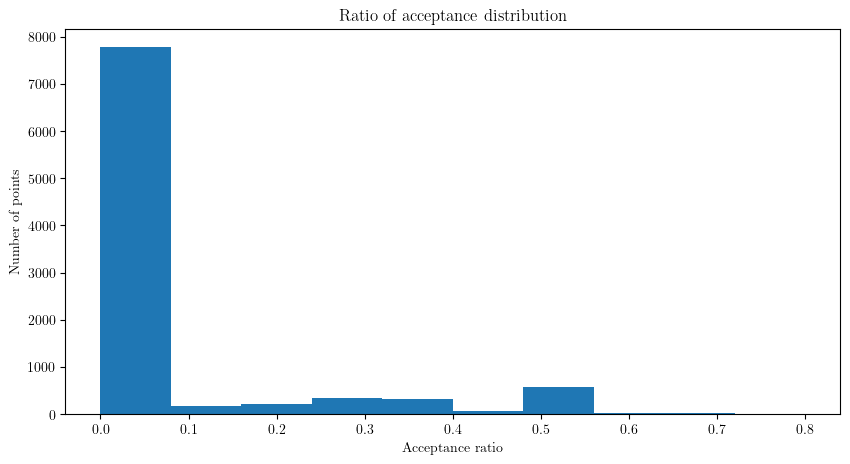

In [95]:
fig, axis = plt.subplots(1, 1, figsize = (10,5))
axis.hist(objects_original_3["FILTER 4 R"])
axis.set_title("Ratio of acceptance distribution")
axis.set_xlabel("Acceptance ratio")
axis.set_ylabel("Number of points")

In [87]:
objects_original_2.groupby("FILTER 2 R").count().sort_values(by = "LTP",ascending = True)

LTP    STP    IDX  PEAK_VAL  X_COORD  Y_COORD  PRE_LABEL   INFO  \
FILTER 2 R                                                                      
0.909091        1      1      1         1        1        1          1      1   
0.196429        1      1      1         1        1        1          1      1   
0.205128        1      1      1         1        1        1          1      1   
0.011236        1      1      1         1        1        1          1      1   
0.209302        1      1      1         1        1        1          1      1   
...           ...    ...    ...       ...      ...      ...        ...    ...   
0.000000     1002   1002   1002      1002     1002     1002       1002   1002   
0.666667     1169   1169   1169      1169     1169     1169       1169   1169   
0.333333     6308   6308   6308      6308     6308     6308       6308   6308   
1.000000     6509   6509   6509      6509     6509     6509       6509   6509   
0.500000    38881  38881  38881     38881    38881    38881      38881  38881   

            REGION  FILENAME  PEAK RANGE  FILTER 1  FILTER 2 N  FILTER 2 P  
FILTER 2 R                                                                  
0.909091         1         1           1         1           1           1  
0.196429         1         1           1         1           1           1  
0.205128         1         1           1         1           1           1  
0.011236         1         1           1         1           1           1  
0.209302         1         1           1         1           1           1  
...            ...       ...         ...       ...         ...         ...  
0.000000      1002      1002        1002      1002        1002        1002  
0.666667      1169      1169        1169      1169        1169        1169  
0.333333      6308      6308        6308      6308        6308        6308  
1.000000      6509      6509        6509      6509        6509        6509  
0.500000     38881     38881       38881     38881       38881       38881  

[451 rows x 14 columns]

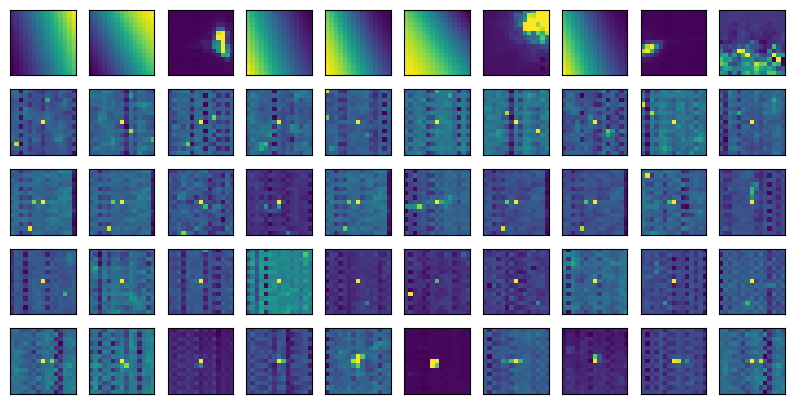

In [89]:
fig, axis = plt.subplots(5, 10, figsize = (10, 5))
ratio = [0.0, 1/3, 2/3,0.5, 1]
for i in range(5):
    samples =  objects_original_2[objects_original_2["FILTER 2 R"] == ratio[i]].sample(10)
    for j in range(10):
        img = samples["REGION"].iloc[j]
        axis[i,j].imshow(img)
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])

Bright pixels: 309452, Possible objects: 14516


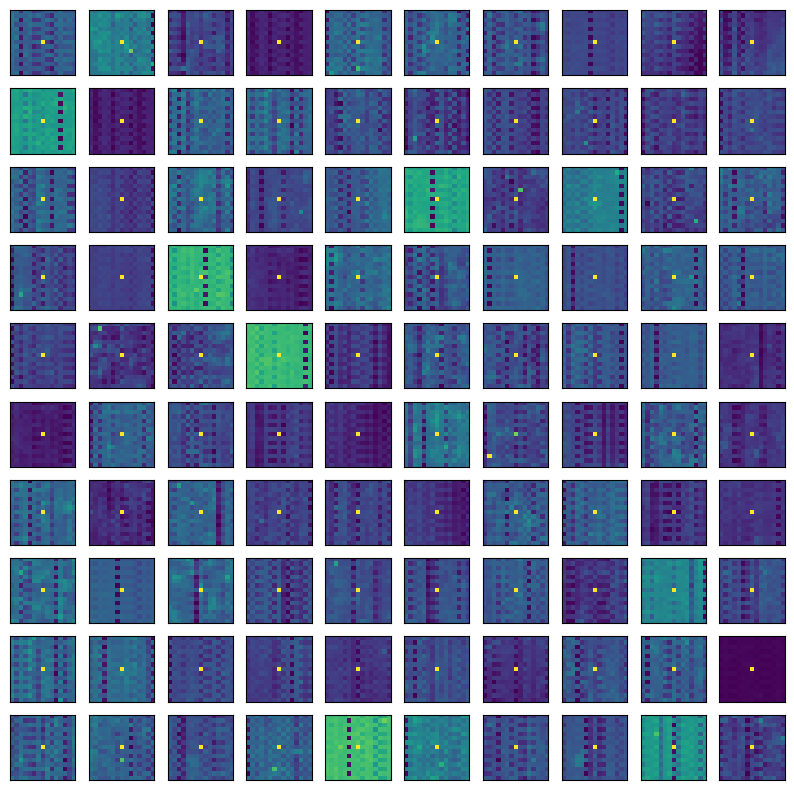

In [70]:
fig, axis = plt.subplots(10, 10, figsize = (10, 10))
axis = axis.flatten()
bright_pixels =  objects_original_1[objects_original_1["FILTER 2 N"] < 3]
possible_objects = objects_original_1[objects_original_1["FILTER 2 N"] > 2]
samples = bright_pixels.sample(100)
for i in range(100):
    img = samples["REGION"].iloc[i]
    axis[i].imshow(img)
    axis[i].set_xticks([])
    axis[i].set_yticks([])

print(f"Bright pixels: {len(bright_pixels)}, Possible objects: {len(possible_objects)}")

Total left size: 3833


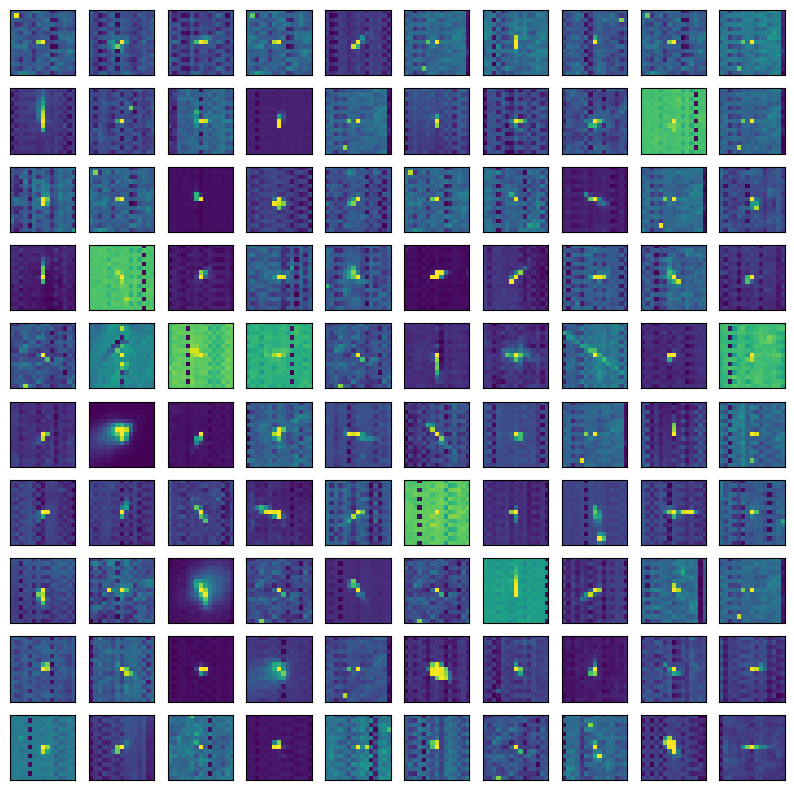

In [71]:
possible_objects_1 =possible_objects[possible_objects["FILTER 2 R"] > 0.5] 

fig, axis = plt.subplots(10, 10, figsize = (10, 10))
axis = axis.flatten()

samples = possible_objects_1.sample(100)
for i in range(100):
    img = samples["REGION"].iloc[i]
    axis[i].imshow(img)
    axis[i].set_xticks([])
    axis[i].set_yticks([])
print(f"Total left size: {len(possible_objects_1)}")

Total left size: 291


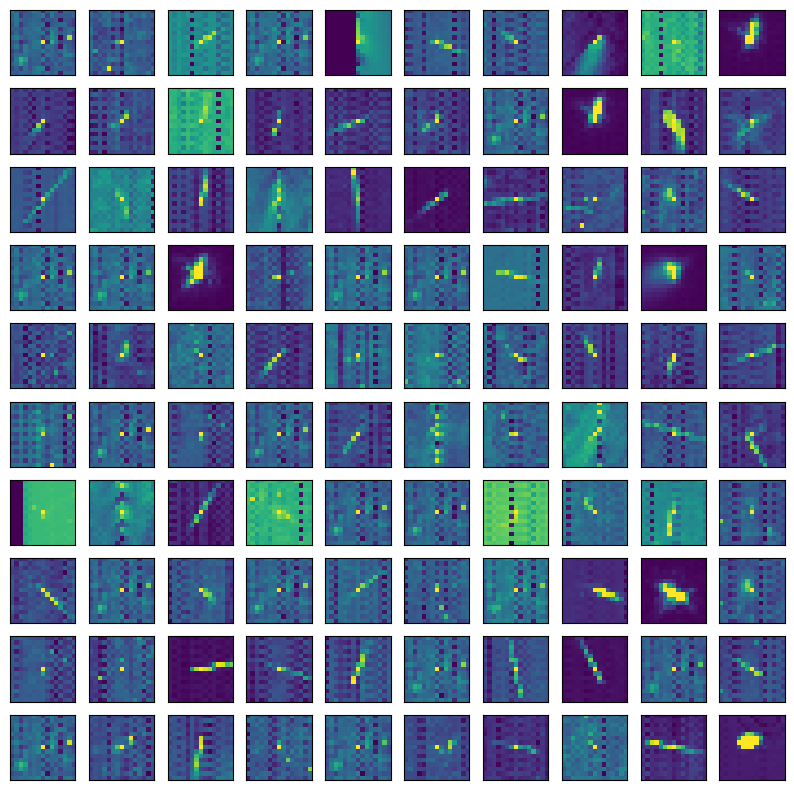

In [72]:
no_possible_objects_1 = possible_objects[(possible_objects["FILTER 2 R"] > 0.45) & (possible_objects["FILTER 2 R"] < 0.51)]

fig, axis = plt.subplots(10, 10, figsize = (10, 10))
axis = axis.flatten()

samples = no_possible_objects_1.sample(100)
for i in range(100):
    img = samples["REGION"].iloc[i]
    axis[i].imshow(img)
    axis[i].set_xticks([])
    axis[i].set_yticks([])
print(f"Total left size: {len(no_possible_objects_1)}")

Total left size: 6453


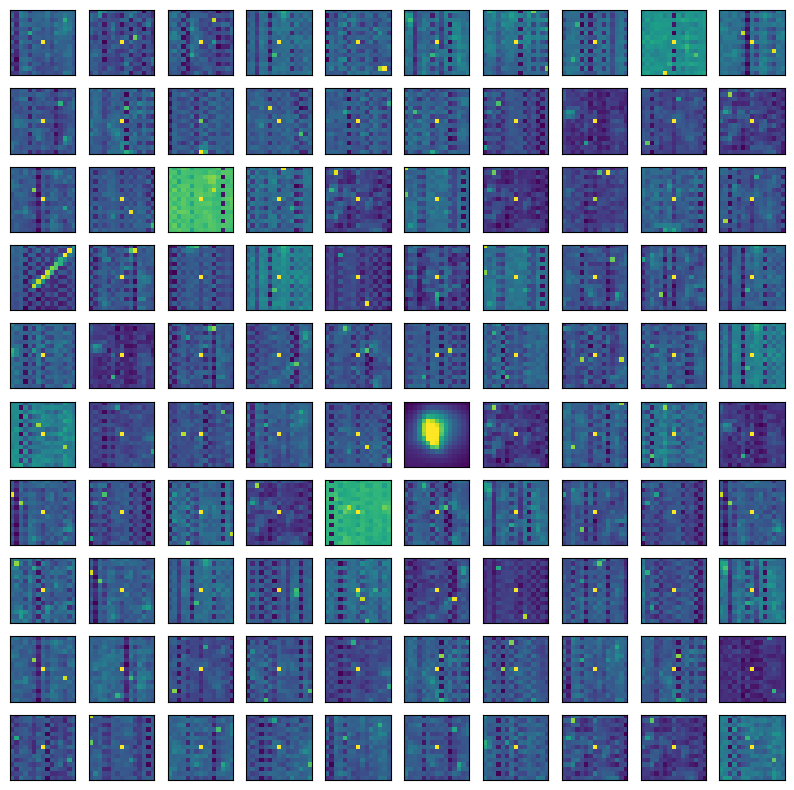

In [73]:
no_possible_objects_1 = possible_objects[(possible_objects["FILTER 2 R"] > 0.3) & (possible_objects["FILTER 2 R"] < 0.41)]

fig, axis = plt.subplots(10, 10, figsize = (10, 10))
axis = axis.flatten()

samples = no_possible_objects_1.sample(100)
for i in range(100):
    img = samples["REGION"].iloc[i]
    axis[i].imshow(img)
    axis[i].set_xticks([])
    axis[i].set_yticks([])

print(f"Total left size: {len(no_possible_objects_1)}")

Total left size: 663


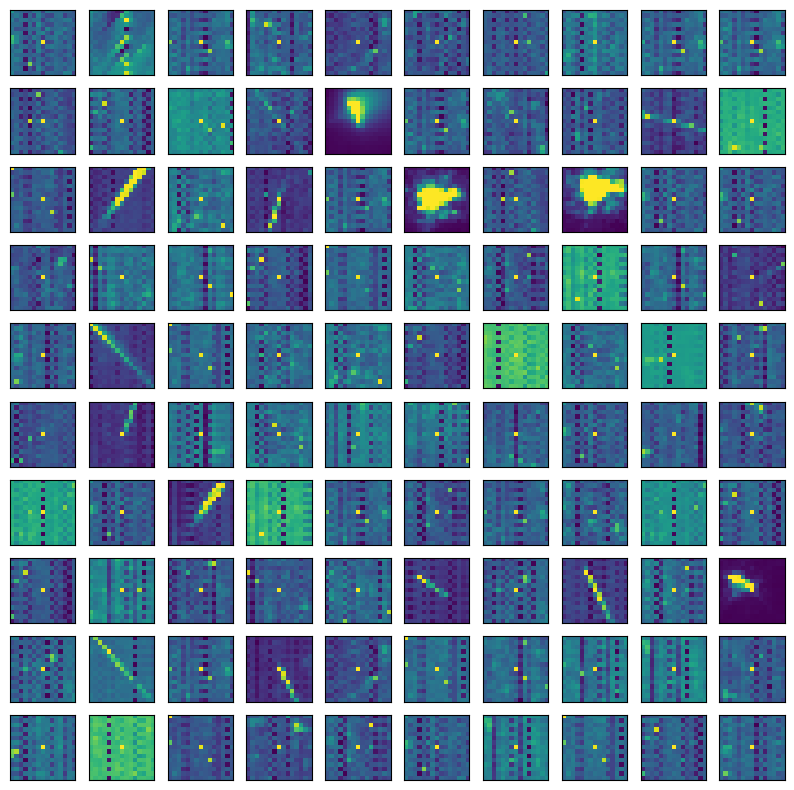

In [74]:
no_possible_objects_1 = possible_objects[(possible_objects["FILTER 2 R"] > 0.2) & (possible_objects["FILTER 2 R"] < 0.31)]

fig, axis = plt.subplots(10, 10, figsize = (10, 10))
axis = axis.flatten()

samples = no_possible_objects_1.sample(100)
for i in range(100):
    img = samples["REGION"].iloc[i]
    axis[i].imshow(img)
    axis[i].set_xticks([])
    axis[i].set_yticks([])

print(f"Total left size: {len(no_possible_objects_1)}")

Total left size: 423


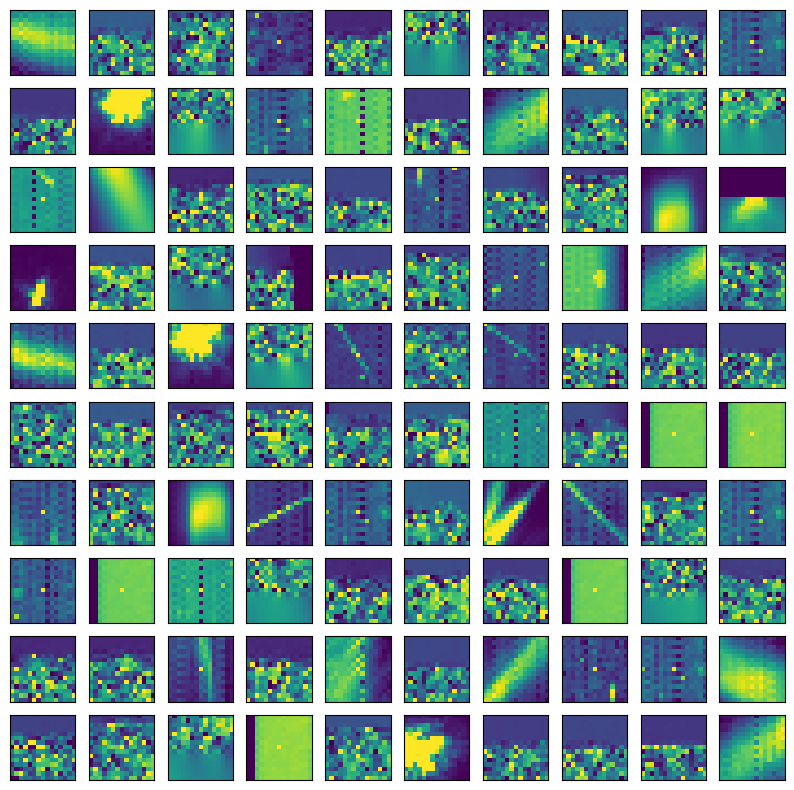

In [75]:
no_possible_objects_1 = possible_objects[(possible_objects["FILTER 2 R"] > 0.1) & (possible_objects["FILTER 2 R"] < 0.21)]

fig, axis = plt.subplots(10, 10, figsize = (10, 10))
axis = axis.flatten()

samples = no_possible_objects_1.sample(100)
for i in range(100):
    img = samples["REGION"].iloc[i]
    axis[i].imshow(img)
    axis[i].set_xticks([])
    axis[i].set_yticks([])

print(f"Total left size: {len(no_possible_objects_1)}")

Total left size: 2854


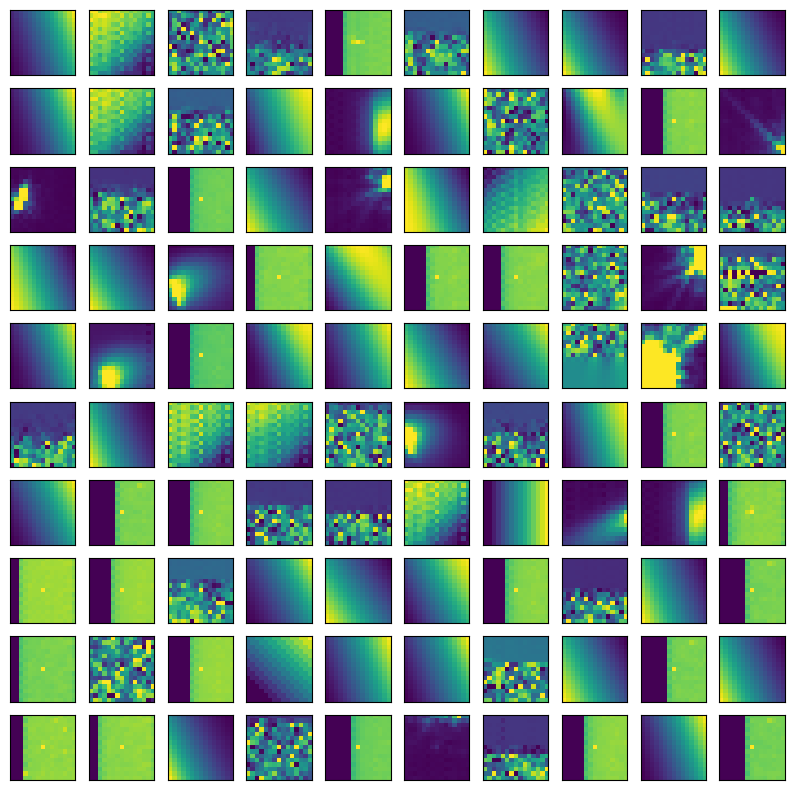

In [76]:
no_possible_objects_1 = possible_objects[possible_objects["FILTER 2 R"] < 0.11]

fig, axis = plt.subplots(10, 10, figsize = (10, 10))
axis = axis.flatten()

samples = no_possible_objects_1.sample(100)
for i in range(100):
    img = samples["REGION"].iloc[i]
    axis[i].imshow(img)
    axis[i].set_xticks([])
    axis[i].set_yticks([])

print(f"Total left size: {len(no_possible_objects_1)}")

In [77]:
# Save possible objects.
possible_objects_2 =possible_objects[possible_objects["FILTER 2 R"] > 0.45]
print(f"Total size: {len(possible_objects_2)}")
possible_objects_2.to_pickle("possible_objects.pkl")

Total size: 4124


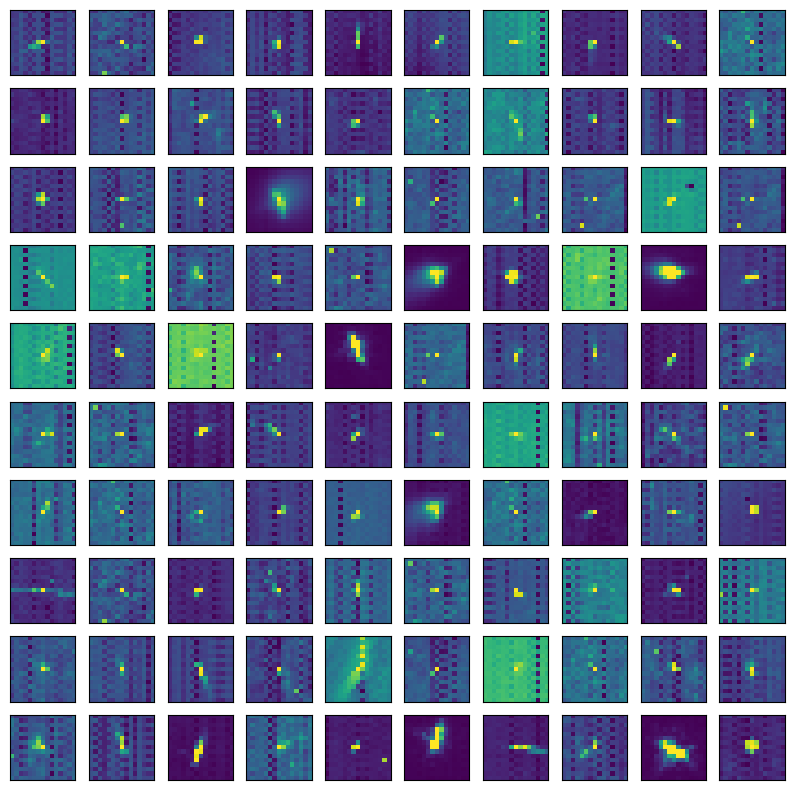

In [78]:
pre_objects = pd.read_pickle("possible_objects.pkl")

fig, axis = plt.subplots(10, 10, figsize = (10, 10))
axis = axis.flatten()

samples = pre_objects.sample(100)
for i in range(100):
    img = samples["REGION"].iloc[i]
    axis[i].imshow(img)
    axis[i].set_xticks([])
    axis[i].set_yticks([])

## 5. Clustering


Text(0.5, 0, 'Cluster label')

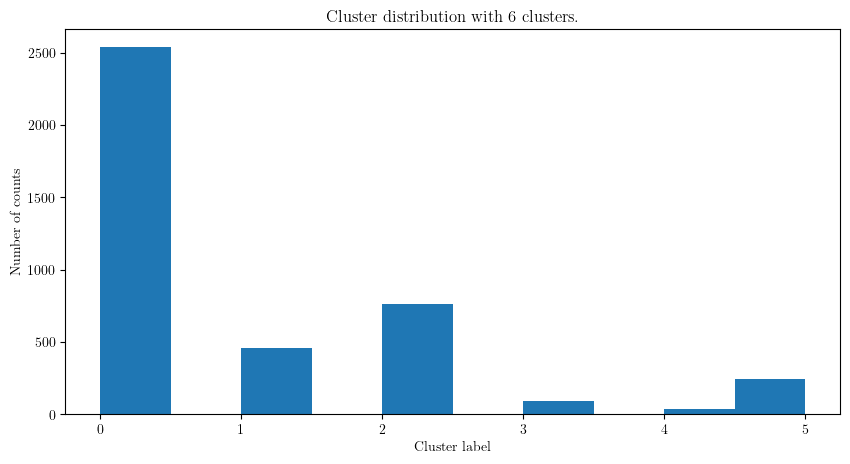

In [110]:
from sklearn.cluster import KMeans

# Convert images into list and apply flattening.
images = [image for image in pre_objects["REGION"]]
raw_images = [image.flatten() for image in pre_objects["REGION"]]
# Create kmeans cluster.
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)
# Retrieve possible labels.
labels = kmeans.fit_predict(raw_images)

fig, axis = plt.subplots(1, 1, figsize = (10, 5))
axis.hist(labels)
axis.set_title(f"Cluster distribution with {n_clusters} clusters.")
axis.set_ylabel("Number of counts")
axis.set_xlabel("Cluster label")

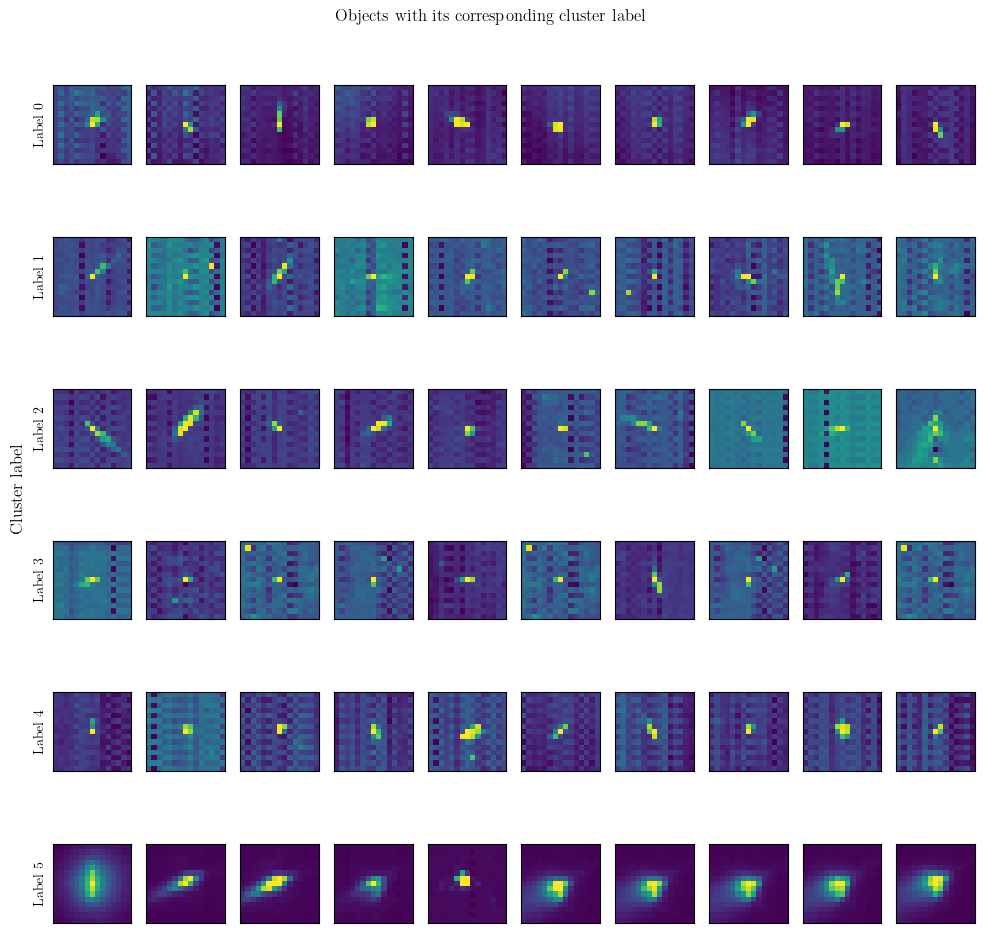

In [88]:
# Merge labels with index.
pairs = []
for idx, lbl in enumerate(labels):
    pairs.append([idx, int(lbl)])

# Sort list
pairs.sort(key = lambda x: x[1])

fig, axis = plt.subplots(6, 10, figsize = (10,10))
fig.suptitle("Objects with its corresponding cluster label")
fig.supylabel("Cluster label")


i = 0
j = 0
for val in pairs:
    if val[1] == i:
        if j == 0:
            axis[i, j].set_ylabel(f"Label {i}")
        axis[i, j].imshow(pre_objects["REGION"].iloc[val[0]])
        axis[i, j].set_xticks([])
        axis[i, j].set_yticks([])

        j+=1
        if j == 10:
            j = 0
            i += 1

plt.tight_layout()

In [94]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# PSFs: shape (N, 20, 20)
psfs_flat = np.array(raw_images).reshape(len(raw_images), -1)
psfs_norm = (psfs_flat - np.mean(psfs_flat, axis=1, keepdims=True)) / np.std(psfs_flat, axis=1, keepdims=True)

# Optional: PCA
pca = PCA(n_components=20)
psfs_pca = pca.fit_transform(psfs_norm)

# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(psfs_pca)


TypeError: Invalid shape (225,) for image data

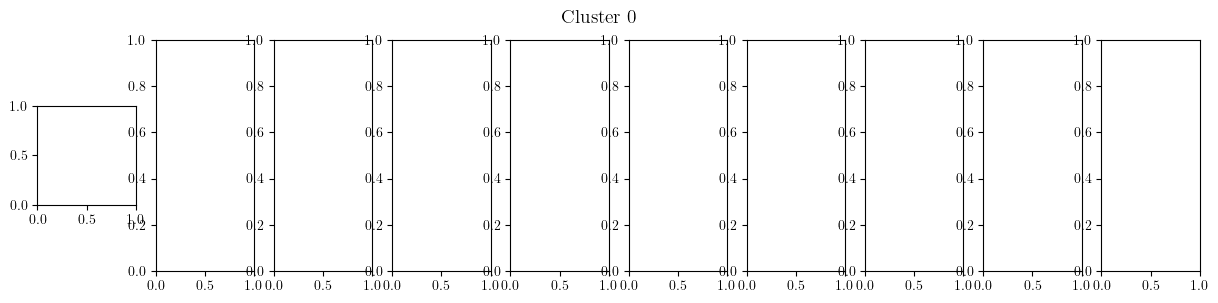

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def plot_psfs_by_cluster(psfs, labels, num_per_cluster=10):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        indices = np.where(labels == label)[0][:num_per_cluster]
        cluster_psfs = psfs[indices]

        fig, axes = plt.subplots(1, len(cluster_psfs), figsize=(15, 3))
        fig.suptitle(f'Cluster {label}', fontsize=14)
        for ax, psf in zip(axes, cluster_psfs):
            ax.imshow(psf, cmap='viridis')
            ax.axis('off')
        plt.show()

# PSFs should still be (N, 20, 20)
plot_psfs_by_cluster(np.array(raw_images), labels)


In [99]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 635.3 kB/s eta 0:00:0000:0100:01


In [100]:
import hdbscan

# Assume psfs_pca is your (N, 20) PCA-reduced dataset
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)  # adjust based on expected object size
labels = clusterer.fit_predict(psfs_pca)

print(f"Number of clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Number of outliers: {(labels == -1).sum()}")


Number of clusters: 18
Number of outliers: 2478


In [109]:
raw_images[0].shape

(225,)

TypeError: Invalid shape (225,) for image data

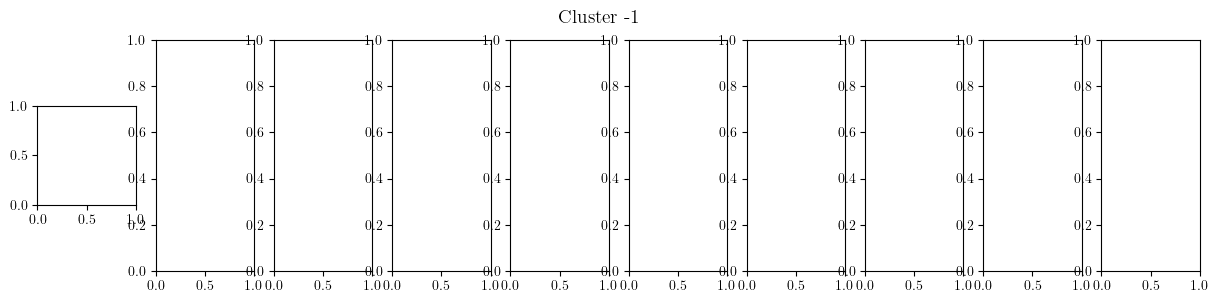

In [105]:
plot_psfs_by_cluster(np.array(raw_images), labels)


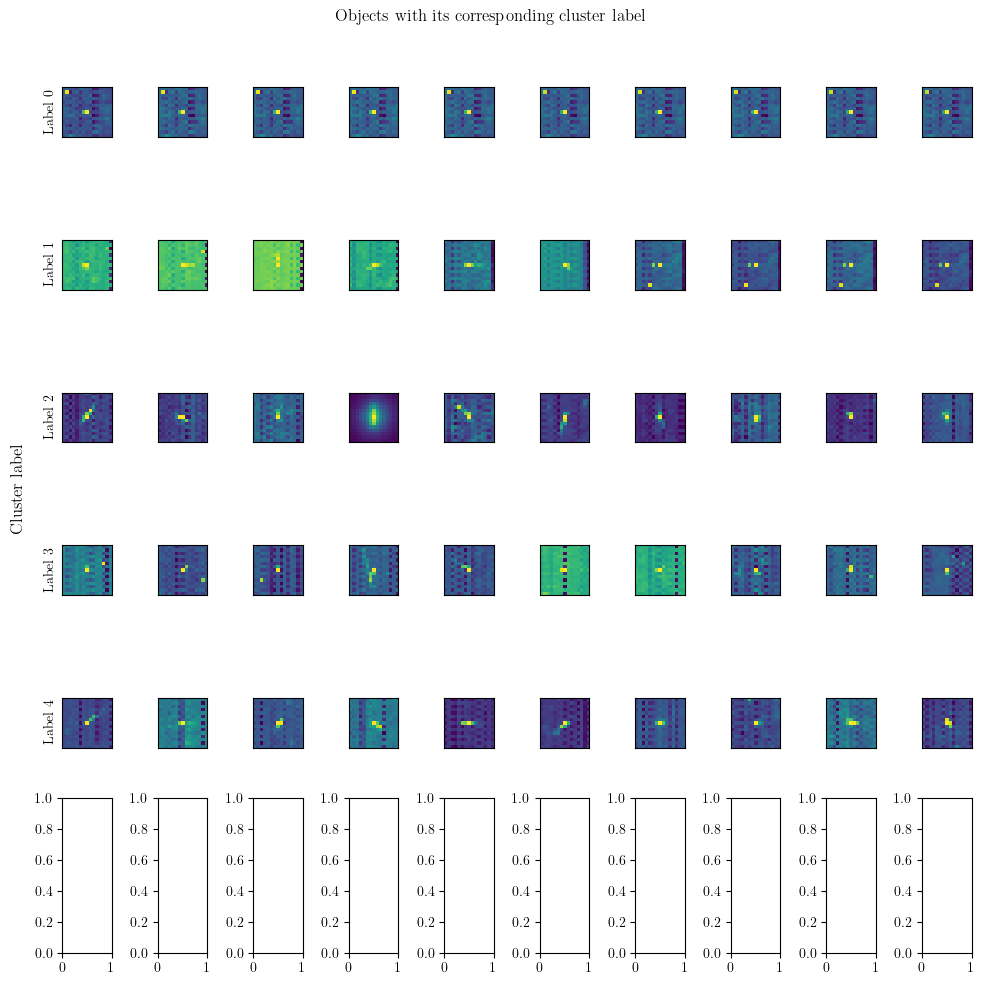

In [96]:
# Merge labels with index.
pairs = []
for idx, lbl in enumerate(labels):
    pairs.append([idx, int(lbl)])

# Sort list
pairs.sort(key = lambda x: x[1])

fig, axis = plt.subplots(6, 10, figsize = (10,10))
fig.suptitle("Objects with its corresponding cluster label")
fig.supylabel("Cluster label")


i = 0
j = 0
for val in pairs:
    if val[1] == i:
        if j == 0:
            axis[i, j].set_ylabel(f"Label {i}")
        axis[i, j].imshow(pre_objects["REGION"].iloc[val[0]])
        axis[i, j].set_xticks([])
        axis[i, j].set_yticks([])

        j+=1
        if j == 10:
            j = 0
            i += 1

plt.tight_layout()

In [95]:
labels

array([4, 3, 2, ..., 2, 1, 2], shape=(4124,), dtype=int32)

In [89]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_
clustering

DBSCAN(eps=3, min_samples=2)

In [90]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 6


### 4.2. Apply IQR detection.

Interquartile range is a method that divides dataset into quartiles. Data is sorted in order and then splitted in 4 equal parts:
- Q1 (25th percentile)
- Q2( 50th percentile)
- Q3 (75th percentile)

Points that fall below $Q1 -1.5(IQR)$ or below $Q3 +1.5(IQR)$, where $IQR = Q3-Q1$ are considered outliers. In this context, we want to compute the IQR to all the pixels in a given object and retrieve those that can be consider "peaks". By doing this, we could distinguish single pixels from PSFs.

In [81]:
def iqr_test_all(array, factor = 1.5 ):
    """
    Dectect peaks in a numpy 2D array by using the Interquartile (IQR) range method.

    Parameters:
        array (array): region with the detected object.
        factor (float): IQR multiplier for filtering.
    
    """
    # Flatten 2D image.
    flatten_array = array.flatten()

    iqr_val = iqr(flatten_array)

    # Compute Q1, Q3.
    Q1 = np.percentile(flatten_array, 25)
    Q3 = np.percentile(flatten_array, 75)
    lower_bound = Q1 - factor * iqr_val
    upper_bound = Q3 + factor * iqr_val

    outliers = []
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            pixel = array[i,j]
            if (pixel < lower_bound) | (pixel > upper_bound):
                outliers.append([i,j])
    
    return outliers

First, let's apply the IQR filter for two images varying the filtering factor (IQR multiplier).

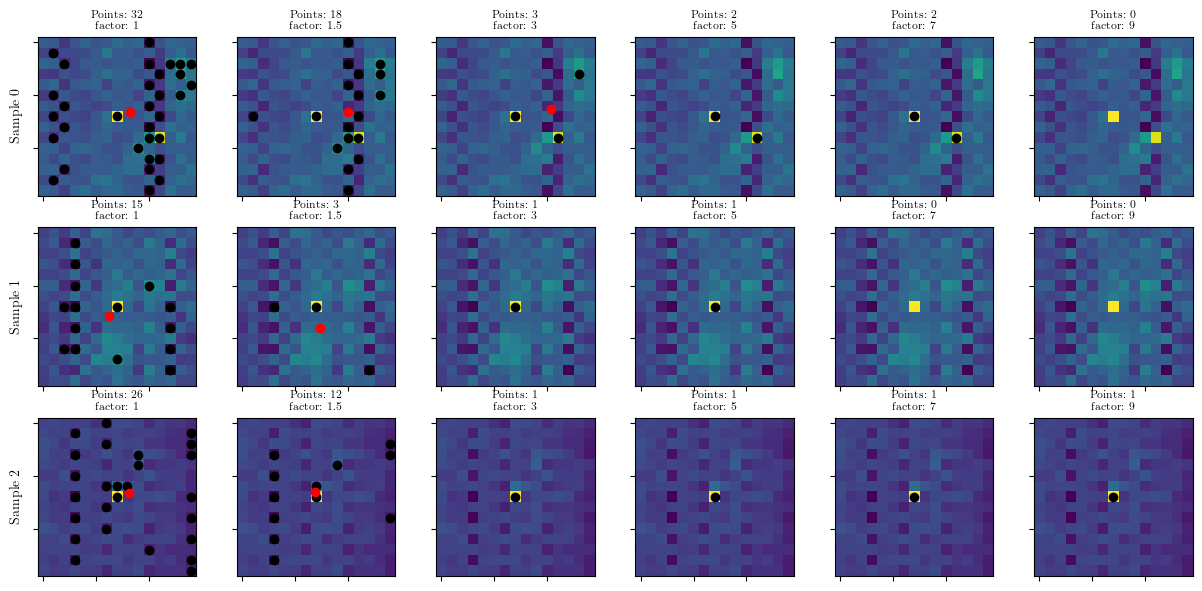

In [82]:
### Important: Removing dark bias (in the region) has no effect in the IQR method.

# Take random images.
image = objects_original_1.sample(3)["REGION"]

fig, axis = plt.subplots(3, 6, figsize = (15,7))
iqr_factors = [1, 1.5, 3, 5, 7, 9]

for i in range(3):
    for j in range(6):
        img = image.iloc[i]
        # Apply IQR.
        points = np.array(iqr_test_all(img, factor = iqr_factors[j]))

        if len(points)>0:
            for k in points:
                axis[i,j].scatter(k[1],k[0], color = "k")

        if len(points)>2:
            x, y = points.mean(axis = 0)
            axis[i,j].scatter(y,x, color = "r")
        axis[i,j].imshow(image.iloc[i])
        axis[i,j].set_title(f"Points: {len(points)} \n factor: {iqr_factors[j]}", fontsize = 8)
        axis[i,j].set_xticklabels([])
        axis[i,j].set_yticklabels([])
        axis[i,0].set_ylabel(f"Sample {i}")

Most convincing value is 5. Let's apply that to the dataset.

In [83]:
# Create new column for storing number of peaks.
objects_original_1["FILTER 2 N"] = None
# Create new column for storing the peaks position.
objects_original_1["FILTER 2 P"] = None

In [84]:
# Iterate over all dataset and apply 
for i in range(len(objects_original_1)):
    img = objects_original_1["REGION"].iloc[i]
    out = iqr_test_all(img, 4)
    objects_original_1["FILTER 2 N"].iloc[i] = len(out)
    objects_original_1["FILTER 2 P"].iloc[i] = out

Display examples.

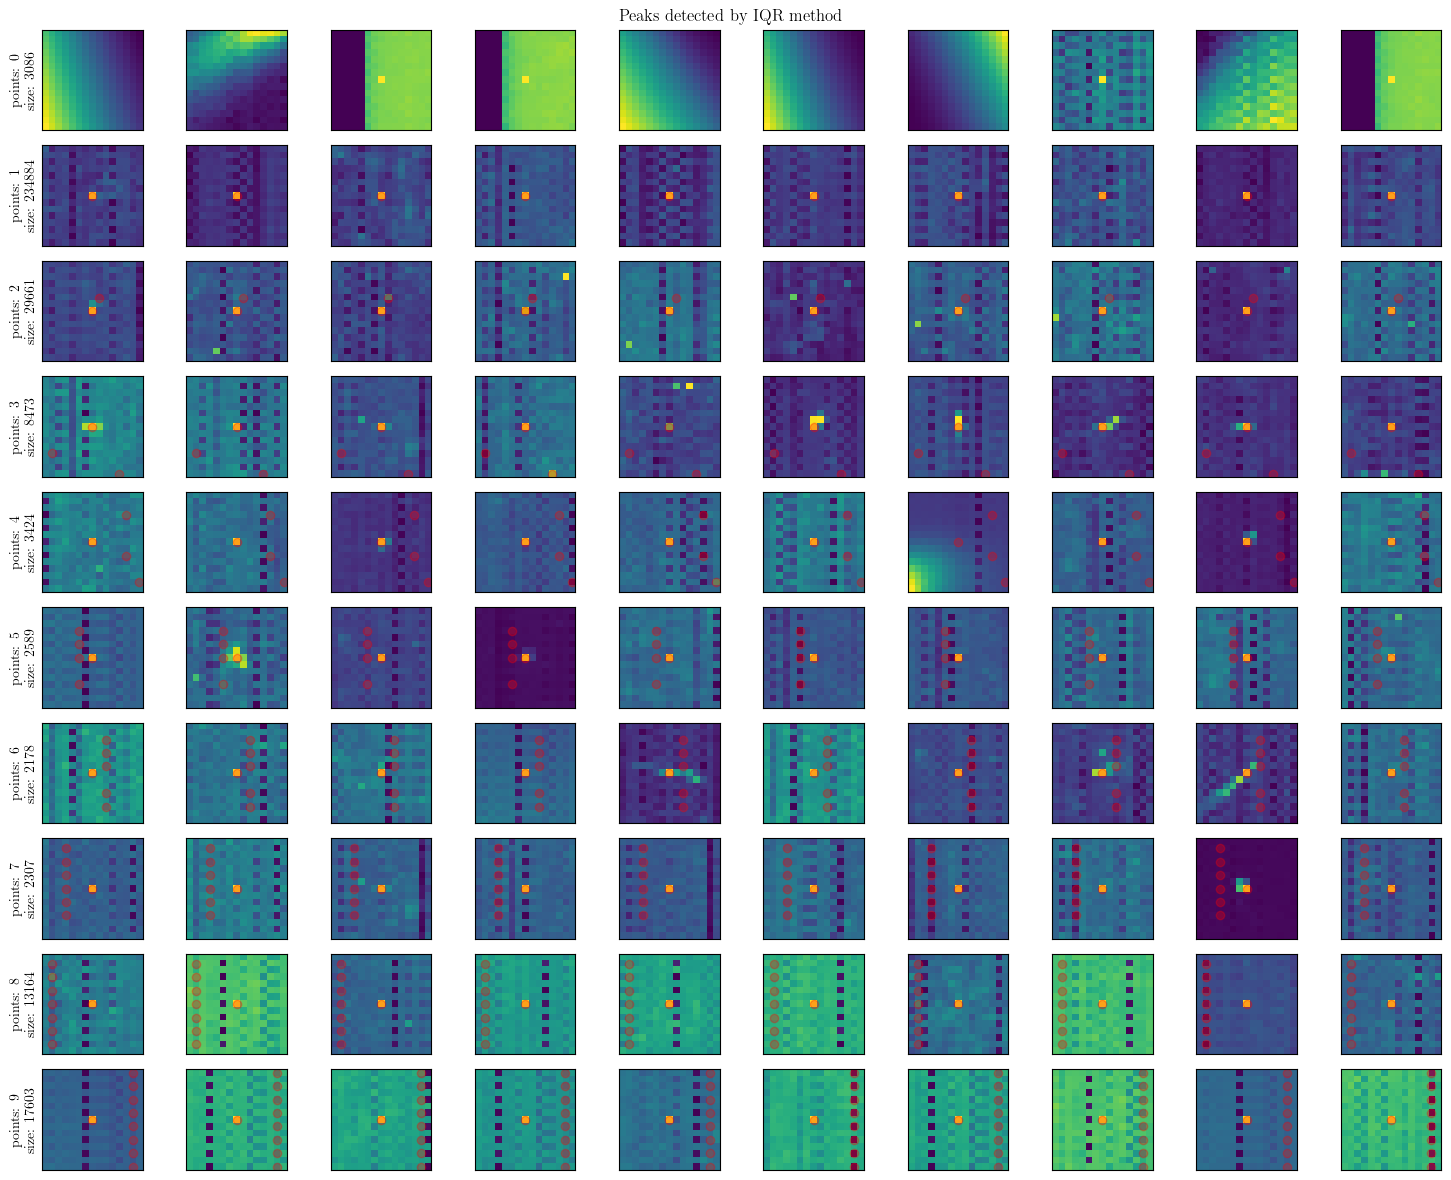

In [85]:
fig, axis = plt.subplots(10, 10, figsize = (15,12))
fig.suptitle("Peaks detected by IQR method")

for i in range(10):
    test_data = objects_original_1[objects_original_1["FILTER 2 N"] == i]
    test = test_data.sample(10)
    for j in range(10):
        image = test["REGION"].iloc[j]
        peak =  test["PEAK_VAL"].iloc[j]
        points = test["FILTER 2 P"].iloc[i]
        axis[i,j].imshow(image)
        axis[i,j].set_yticks([]) 
        axis[i,j].set_xticks([])
        if len(points)>0:
            for pair in points:
                axis[i,j].scatter(pair[1], pair[0], alpha = 0.3, color = "red")  
        axis[i,0].set_ylabel(f"points: {i} \n size: {len(test_data)}")
plt.tight_layout()

Let's see how this will work.

Apply method in all samples.

In [86]:
bright_pixels = objects_original[(objects_original["FILTER 2 N"] < 3) & (objects_original["FILTER 2 R"] == 1)]

samples = bright_pixels.sample(100)
fig, axis = plt.subplots(10, 10, figsize = (10,12))
axis = axis.flatten()
for idx in range(100):

    image = samples["REGION"].iloc[idx]
    peak = samples["PEAK_VAL"].iloc[idx]
    axis[idx].imshow(image)
    axis[idx].set_title(f"peak = {peak}", fontsize = 8)
    axis[idx].set_yticks([]) 
    axis[idx].set_xticks([])  

KeyError: 'FILTER 2 N'

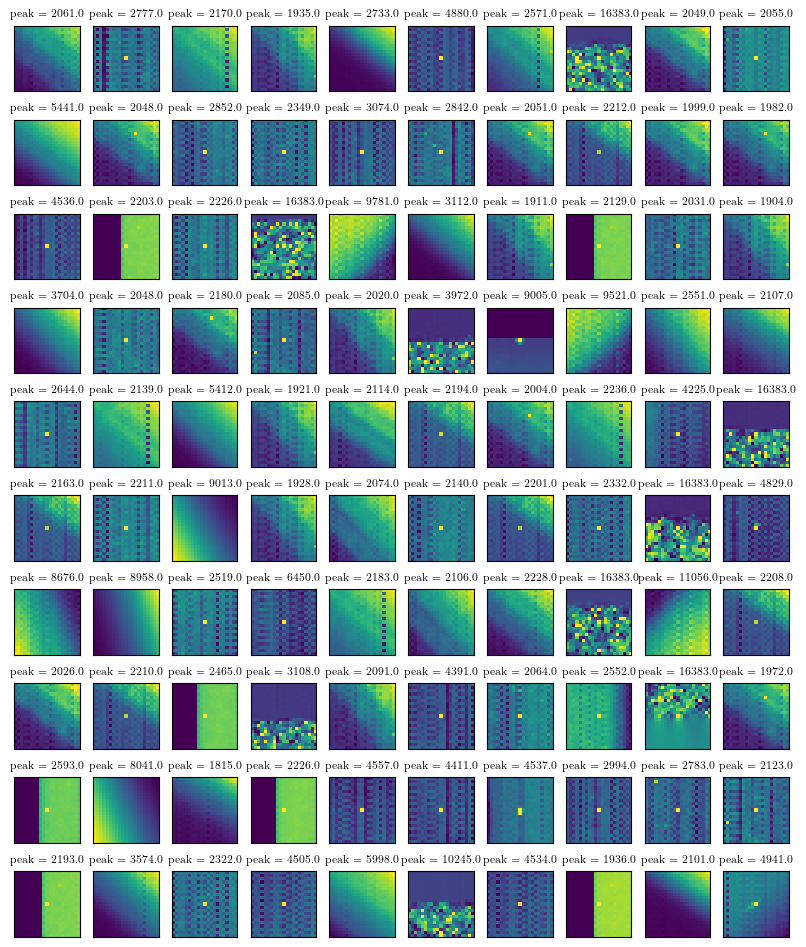

In [ ]:
noisy_pixels = objects_original[(objects_original["FILTER 2 R"] == -1)]

samples = noisy_pixels.sample(100)
fig, axis = plt.subplots(10, 10, figsize = (10,12))
axis = axis.flatten()
for idx in range(100):

    image = samples["REGION"].iloc[idx]
    peak = samples["PEAK_VAL"].iloc[idx]
    axis[idx].imshow(image)
    axis[idx].set_title(f"peak = {peak}", fontsize = 8)
    axis[idx].set_yticks([]) 
    axis[idx].set_xticks([])  

In [ ]:
# Remove bright pixels and noisy pixels
candidates = objects_original[(objects_original["FILTER 2 N"] > 3) & (objects_original["FILTER 2 R"] != 1)]
candidates = candidates[candidates["FILTER 2 R"] > 0.4]
print(len(candidates))

4096


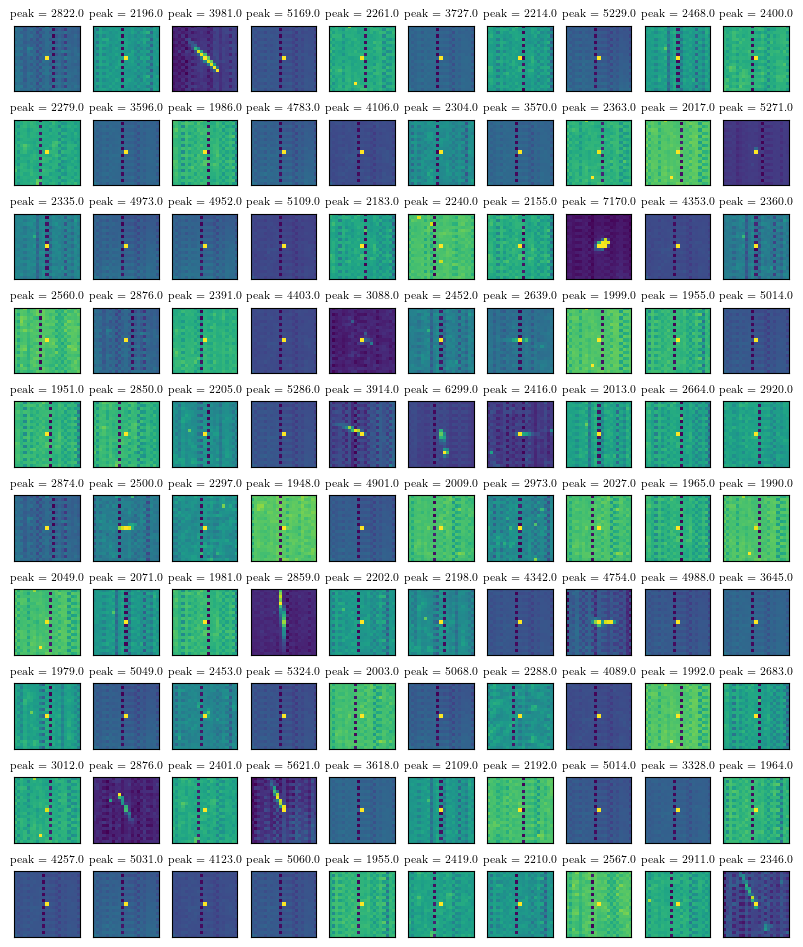

In [ ]:
samples = candidates.sample(100)

fig, axis = plt.subplots(10, 10, figsize = (10,12))
axis = axis.flatten()
for idx in range(100):

    image = samples["REGION"].iloc[idx]
    peak = samples["PEAK_VAL"].iloc[idx]
    axis[idx].imshow(image)
    axis[idx].set_title(f"peak = {peak}", fontsize = 8)
    axis[idx].set_yticks([]) 
    axis[idx].set_xticks([])  

# 5. Clustering

### 4.2. Remove broken pixels

In [ ]:
# Show new objects.
objects_1 = objects[objects["FILTER 1"] == True].reset_index(drop=True)
print(len(objects_1))

# Create new row for duplicates.
objects_1["FILTER 2"] = False

763398


In [ ]:
# STP values.
STP_vals = objects_1["STP"].drop_duplicates().to_list()

for stp in STP_vals:
    indexes = objects_1[objects_1["STP"] == stp].drop_duplicates(subset = ["X_COORD", "Y_COORD"]).index
    objects_1.loc[indexes, "FILTER 2"] = True

In [ ]:
objects_2 = objects_1[objects_1["FILTER 2"] == True]

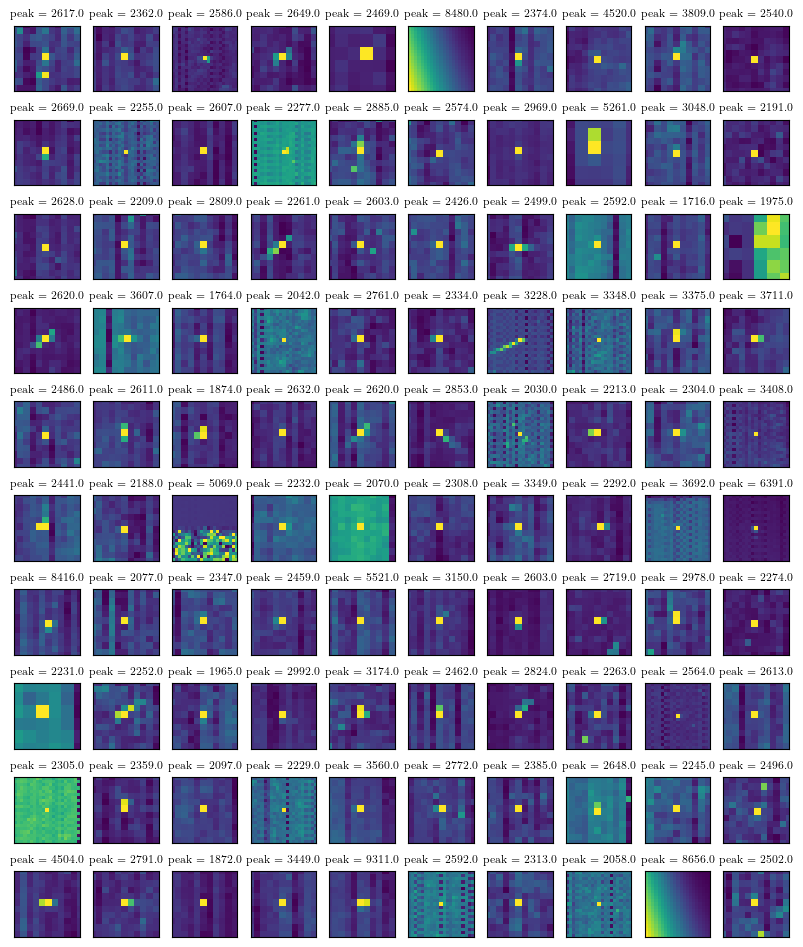

In [ ]:
samples= objects_2.sample(100)

fig, axis = plt.subplots(10, 10, figsize = (10,12))
axis = axis.flatten()

for idx in range(100):

    image = samples["REGION"].iloc[idx]
    peak = samples["PEAK_VAL"].iloc[idx]
    axis[idx].imshow(image)
    axis[idx].set_title(f"peak = {peak}", fontsize = 8)
    axis[idx].set_yticks([]) 
    axis[idx].set_xticks([])  

### 4.3. Remove outliers.

In [ ]:
objects_3 = objects_2
objects_3["FILTER 3"] = 0

In [ ]:
def iqr_test_all(array):
    """
    Dectect outliers in a numpy array

    Parameters:
        array (array): 2d array from a cropped region.
        pixel (array): xy coordinate with pixel position.
    
    """
    # Flatten 2D image.
    flatten_array = array.flatten()

    iqr_val = iqr(flatten_array)

    # Compute Q1, Q3.
    Q1 = np.percentile(flatten_array, 25)
    Q3 = np.percentile(flatten_array, 75)
    lower_bound = Q1 - 1.5 * iqr_val
    upper_bound = Q3 + 1.5 * iqr_val

    outliers = []
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            pixel = array[i,j]
            if (pixel < lower_bound) | (pixel > upper_bound):
                outliers.append([i,j])
    
    return outliers

In [ ]:
bounds = 4
for i in range(len(objects_3)):
    img = objects_3["REGION"].iloc[i][bounds:-bounds, bounds:-bounds]
    out = iqr_test_all(img)
    objects_3["FILTER 3"].iloc[i] = len(out)

In [ ]:
objects_3.groupby("FILTER 3").count()

LTP    STP    IDX  PEAK_VAL  X_COORD  Y_COORD  PRE_LABEL   INFO  \
FILTER 3                                                                      
0          3993   3993   3993      3993     3993     3993       3993   3993   
1          1152   1152   1152      1152     1152     1152       1152   1152   
2          1280   1280   1280      1280     1280     1280       1280   1280   
3          1013   1013   1013      1013     1013     1013       1013   1013   
4         20726  20726  20726     20726    20726    20726      20726  20726   
...         ...    ...    ...       ...      ...      ...        ...    ...   
71            6      6      6         6        6        6          6      6   
72            2      2      2         2        2        2          2      2   
74            1      1      1         1        1        1          1      1   
75            1      1      1         1        1        1          1      1   
77            1      1      1         1        1        1          1      1   

          REGION  FILENAME  PEAK RANGE  FILTER 1  FILTER 2  
FILTER 3                                                    
0           3993      3993        3993      3993      3993  
1           1152      1152        1152      1152      1152  
2           1280      1280        1280      1280      1280  
3           1013      1013        1013      1013      1013  
4          20726     20726       20726     20726     20726  
...          ...       ...         ...       ...       ...  
71             6         6           6         6         6  
72             2         2           2         2         2  
74             1         1           1         1         1  
75             1         1           1         1         1  
77             1         1           1         1         1  

[73 rows x 13 columns]

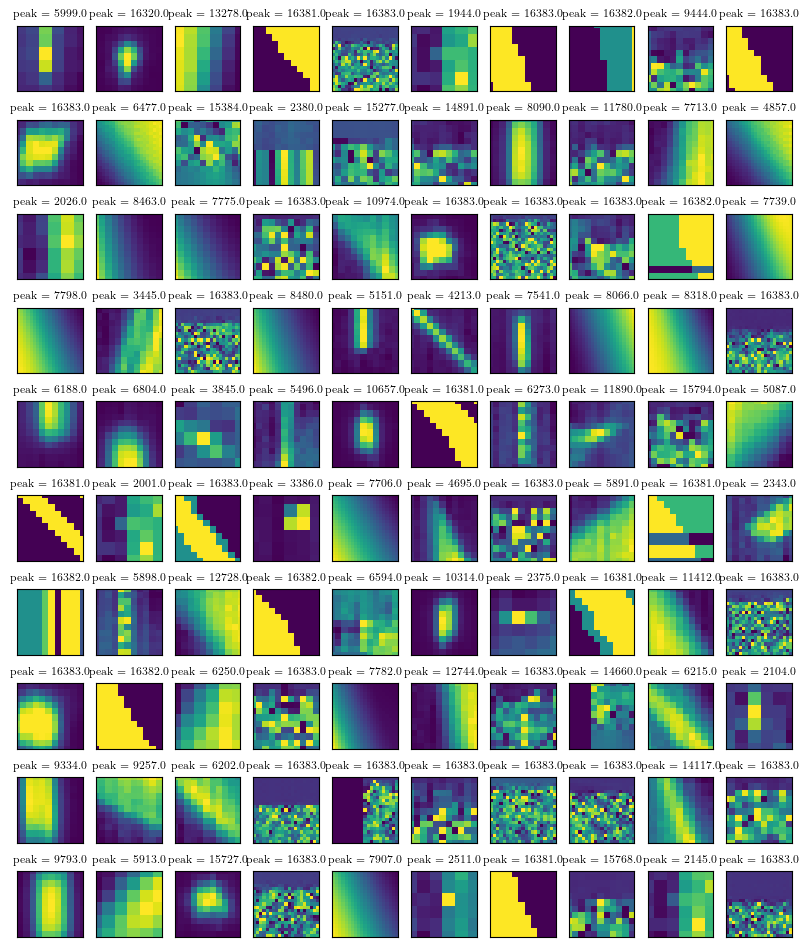

In [ ]:
no_outliers = objects_3[objects_3["FILTER 3"] == 0]

samples= no_outliers.sample(100)

fig, axis = plt.subplots(10, 10, figsize = (10,12))
axis = axis.flatten()

for idx in range(100):

    image = samples["REGION"].iloc[idx]
    peak = samples["PEAK_VAL"].iloc[idx]
    axis[idx].imshow(image)
    axis[idx].set_title(f"peak = {peak}", fontsize = 8)
    axis[idx].set_yticks([]) 
    axis[idx].set_xticks([])  

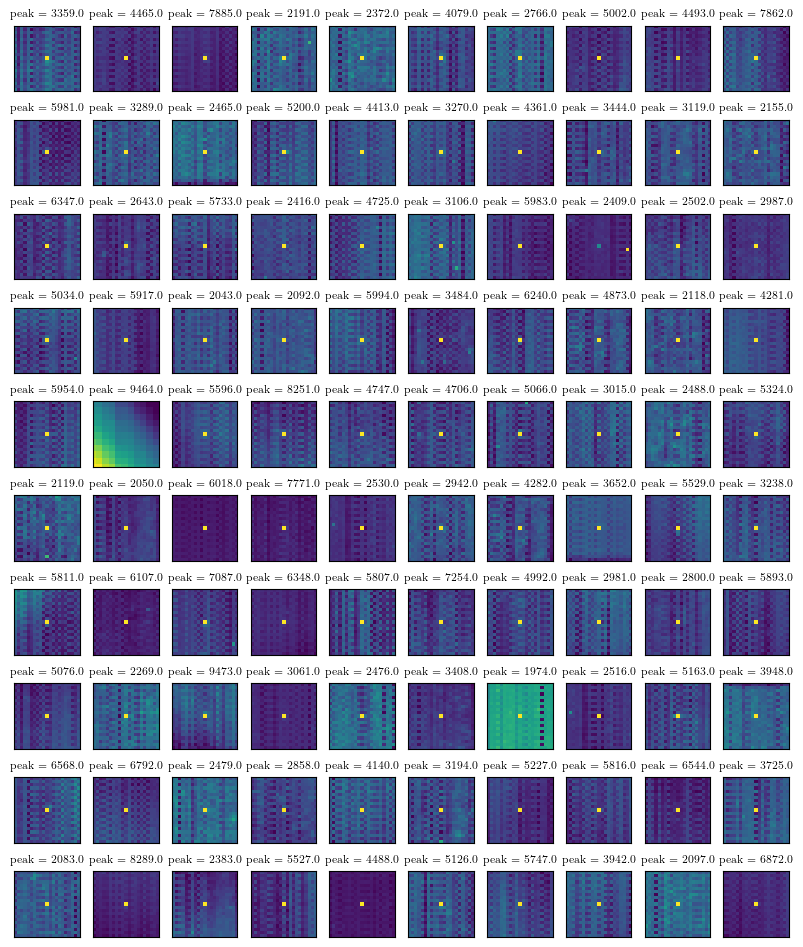

In [ ]:
one_outliers = objects_3[objects_3["FILTER 3"] == 1]

samples= one_outliers.sample(100)

fig, axis = plt.subplots(10, 10, figsize = (10,12))
axis = axis.flatten()

for idx in range(100):

    image = samples["REGION"].iloc[idx]
    peak = samples["PEAK_VAL"].iloc[idx]
    axis[idx].imshow(image)
    axis[idx].set_title(f"peak = {peak}", fontsize = 8)
    axis[idx].set_yticks([]) 
    axis[idx].set_xticks([]) 

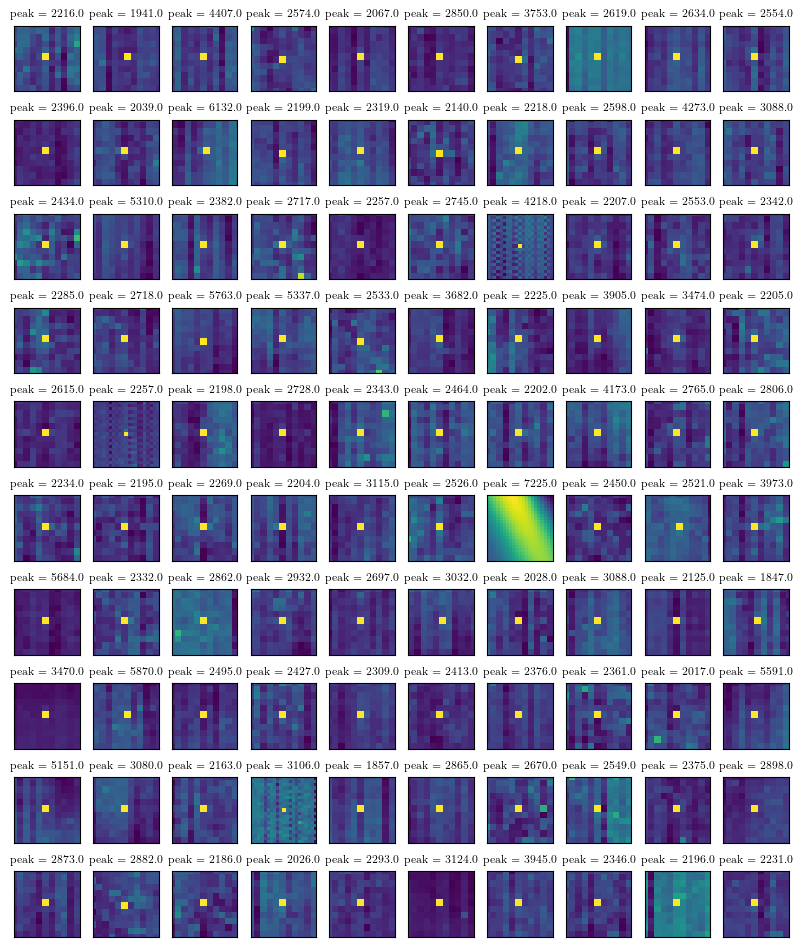

In [ ]:
four_outliers = objects_3[objects_3["FILTER 3"] == 4]

samples= four_outliers.sample(100)

fig, axis = plt.subplots(10, 10, figsize = (10,12))
axis = axis.flatten()

for idx in range(100):

    image = samples["REGION"].iloc[idx]
    peak = samples["PEAK_VAL"].iloc[idx]
    axis[idx].imshow(image)
    axis[idx].set_title(f"peak = {peak}", fontsize = 8)
    axis[idx].set_yticks([]) 
    axis[idx].set_xticks([]) 

In [ ]:
objects_4 = objects_3[(objects_3["FILTER 3"] > 10) & (objects_3["FILTER 3"] <25) ]
len(objects_4)

33770

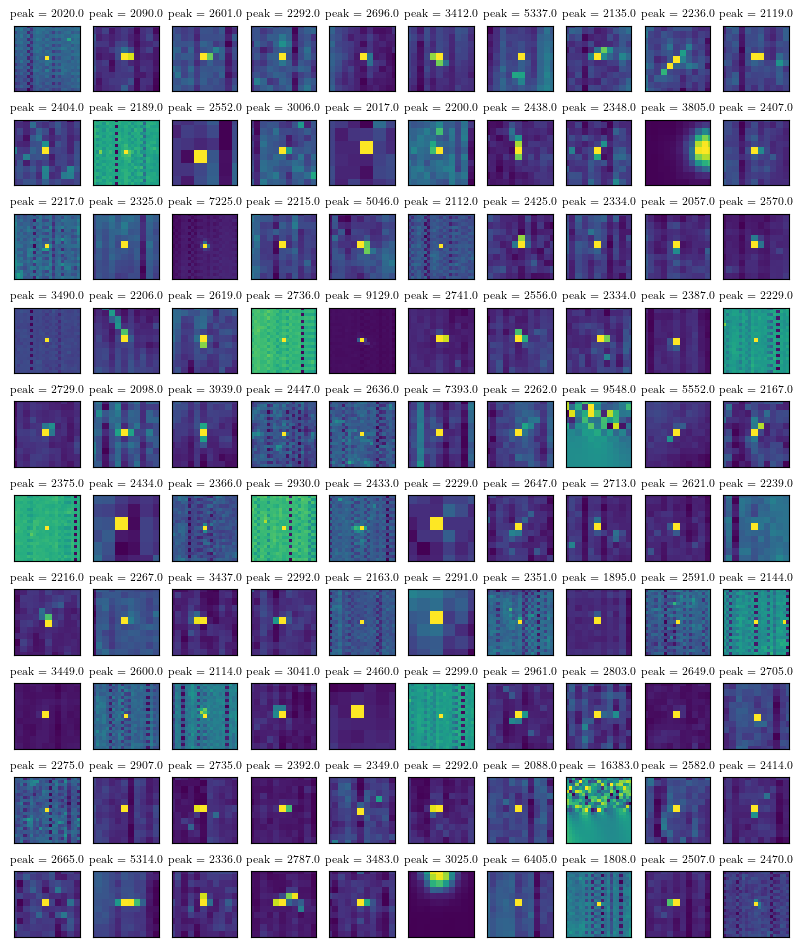

In [ ]:
samples= objects_4.sample(100)

fig, axis = plt.subplots(10, 10, figsize = (10,12))
axis = axis.flatten()

for idx in range(100):

    image = samples["REGION"].iloc[idx]
    peak = samples["PEAK_VAL"].iloc[idx]
    axis[idx].imshow(image)
    axis[idx].set_title(f"peak = {peak}", fontsize = 8)
    axis[idx].set_yticks([]) 
    axis[idx].set_xticks([]) 

## 5. Clustering

In order to create a preliminary catalog, we need to apply an unsupervised machine learning method such as clustering.

**K-means**

Create a set of K clusters (spherical) in a 2d space based on the euclidean distance. Images must be flattened.

**Clustering**

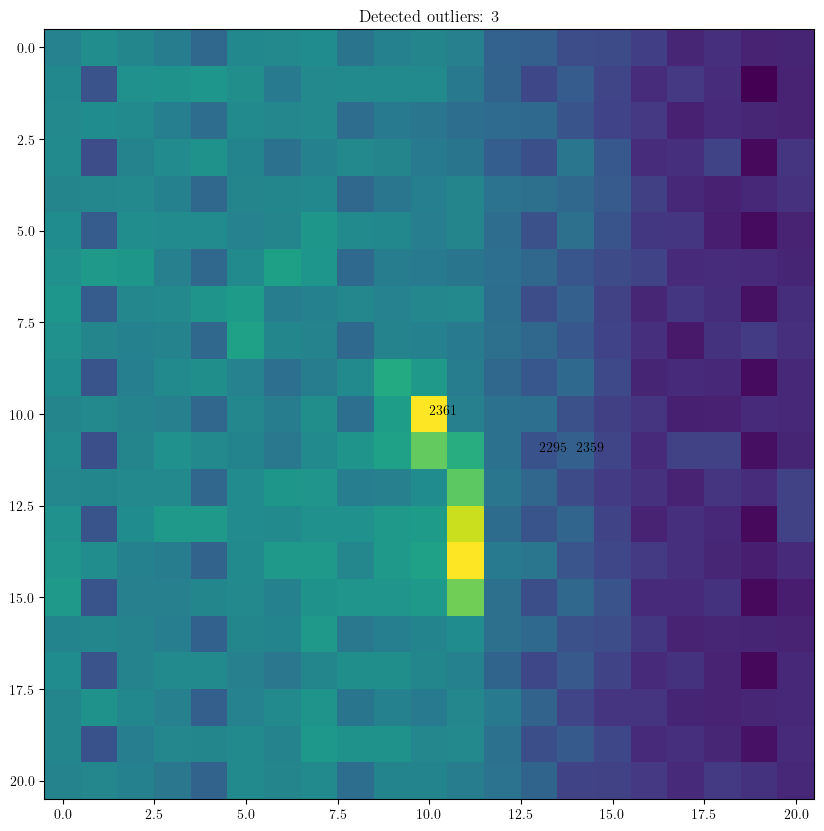

In [ ]:
fig, axis = plt.subplots(1, 1, figsize = (10,10))
img = stars["REGION"].iloc[misclassified_stars[2]]
axis.imshow(img)
out = iqr_test_all(img)
axis.set_title(f"Detected outliers: {len(out)}")

for i in out:
    axis.text(i[0], i[1], str(np.round(img[i[0], i[1]])))

**Remove background before applying IQR test**

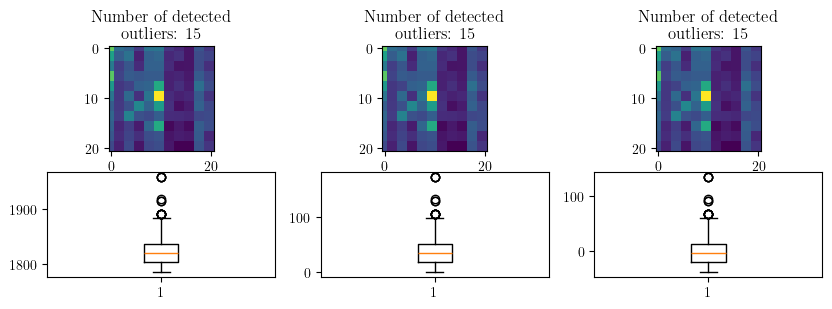

In [ ]:
test_object = objects.sample(1)["REGION"].iloc[0]
fig, axis = plt.subplots(2, 3, figsize = (10,3))

axis[0,0].imshow(test_object)
outliers = iqr_test_all(test_object)
axis[0,0].set_title(f"Number of detected \n outliers: {len(outliers)}")
a = axis[1,0].boxplot(test_object.flatten())

im2 = test_object - np.min(test_object.flatten())
axis[0,1].imshow(im2)
outliers_2 = iqr_test_all(im2)
axis[0,1].set_title(f"Number of detected \n outliers: {len(outliers_2)}")
a = axis[1,1].boxplot(im2.flatten())

im3 = test_object - np.mean(test_object.flatten())
axis[0,2].imshow(im3)
outliers_3 = iqr_test_all(im3)
axis[0,2].set_title(f"Number of detected \n outliers: {len(outliers_3)}")
a = axis[1,2].boxplot(im3.flatten())

# 4. Clustering

bright pixel


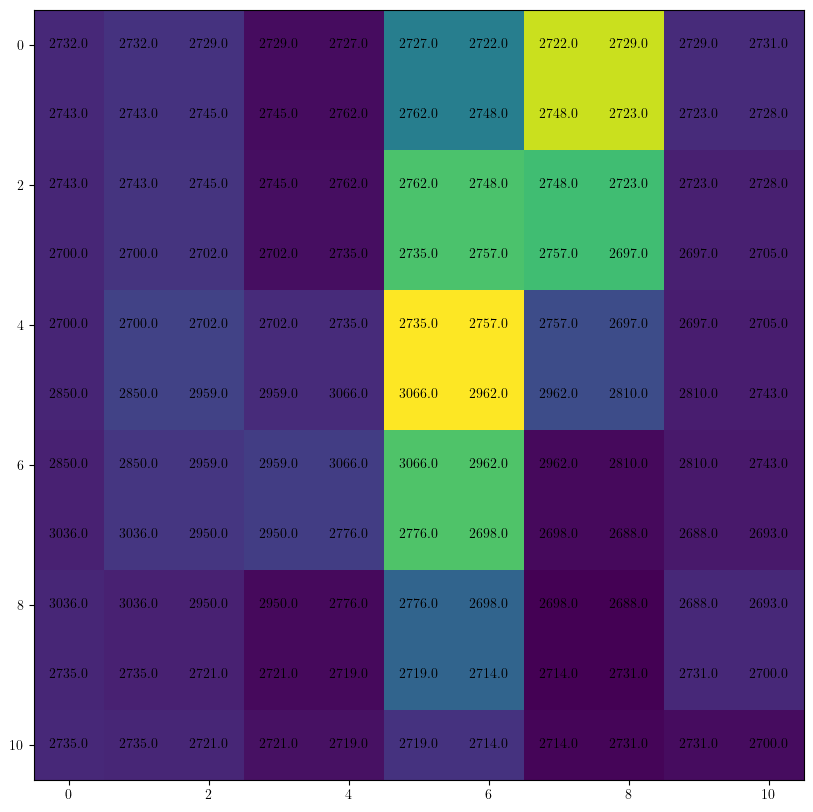

In [ ]:
image = stars["REGION"].iloc[counts[0]][lim:21-lim, lim:21-lim]
fig, axis = plt.subplots(1, 1, figsize = (10,10))
axis.imshow(image)
print(oc.iqr_test(image, 5, 5, 0))

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        axis.text(i, j, str(np.round(image[i,j], 2)), ha="center", va="center")

In [ ]:
# Define nearest neighbors limit.
limits = np.arange(1, 10)
counts = np.zeros(len(limits))

for idl, lim in enumerate(limits):
    for idx in range(len(stars)):
        image = ut.normalize_array(stars["REGION"].iloc[idx])
        if oc.iqr_test(image, 11, 11, lim):
            counts[idl] += 1

In [ ]:
image = 
image = ut.normalize_array(stars["REGION"].iloc[idx])


In [ ]:
def iqr_test(array, x, y, start = None):
    """
    Detect outliers in a numpy 2d array.

    Parameters:
        array (array): 2d array from a cropped region.
        pixel (array): xy coordinate with pixel position.
    
    """
    # Flatten 2D image.
    pixel = array[x, y]
    if start:
        array = array[start:-start, start:-start]
    flatten_array = array.flatten()
    iqr_val = iqr(flatten_array)

    # Compute Q1, Q3.
    Q1 = np.percentile(flatten_array, 25)
    Q3 = np.percentile(flatten_array, 75)
    lower_bound = Q1 - 1.5 * iqr_val
    upper_bound = Q3 + 1.5 * iqr_val

    if (pixel < lower_bound) | (pixel > upper_bound):
        return "bright pixel"
    else:
        return None


[Text(0, 0, '533'),
 Text(0, 0, '494'),
 Text(0, 0, '439'),
 Text(0, 0, '379'),
 Text(0, 0, '300'),
 Text(0, 0, '194'),
 Text(0, 0, '77'),
 Text(0, 0, '22'),
 Text(0, 0, '9')]

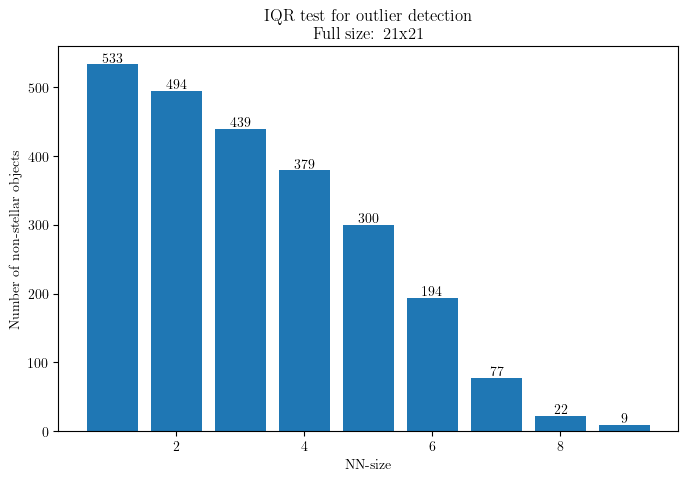

In [ ]:
fig, axis = plt.subplots(1, 1, figsize = (8,5))
a = axis.bar(limits, counts)
axis.set_title("IQR test for outlier detection\n Full size: 21x21")
axis.set_xlabel("NN-size")
axis.set_ylabel("Number of non-stellar objects")
axis.bar_label(a)

Display stars that were classified as outliers with limit = 9.

{'total_intensity': 28.74754098360656, 'variance': 0.047975025166044696, 'iqr': 0.11475409836065575, 'centroid_x': 5.0, 'centroid_y': 5.0, 'max_pixel_x': 5.5, 'max_pixel_y': 4.5}


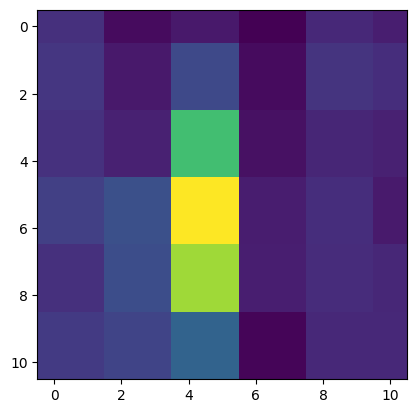

In [ ]:
import numpy as np
from scipy.stats import iqr

def extract_features(image):
    """
    Extracts features for PSF vs. single bright pixel classification.

    Parameters:
        image (numpy.ndarray): 20x20 image.

    Returns:
        dict: Extracted feature values.
    """
    total_intensity = np.sum(image)
    intensity_variance = np.var(image)
    intensity_iqr = iqr(image.flatten())
    
    # Find the pixel with the maximum intensity
    max_pixel = np.max(image)
    max_position = np.argwhere(image == max_pixel)

    # Compute centroid
    x_coords, y_coords = np.nonzero(image)
    centroid_x = np.mean(x_coords)
    centroid_y = np.mean(y_coords)

    return {
        "total_intensity": total_intensity,
        "variance": intensity_variance,
        "iqr": intensity_iqr,
        "centroid_x": centroid_x,
        "centroid_y": centroid_y,
        "max_pixel_x": max_position[:, 0].mean(),
        "max_pixel_y": max_position[:, 1].mean(),
    }

# Example: Extract features from an image
image = normalize_array(stars.sample(1)["REGION"].iloc[0])[5:-5, 5:-5]
features = extract_features(image)
print(features)
plt.imshow(image)


{'total_intensity': 72.81353265145555, 'variance': 0.020622744243140836, 'iqr': 0.03383162863886702, 'centroid_x': 5.041666666666667, 'centroid_y': 4.966666666666667, 'max_pixel_x': 5.0, 'max_pixel_y': 5.0}


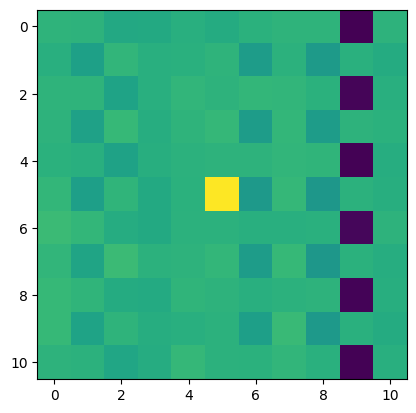

In [ ]:
image = normalize_array(detected_objects.sample(1)["REGION"].iloc[0])[5:-5, 5:-5]
features = extract_features(image)
print(features)
plt.imshow(image)

In [ ]:
import cv2
img = stars.sample(1)["REGION"].iloc[0]
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  4.23140496,  0.        ,  0.        ,  0.        ,
         8.46280992,  0.        ,  0.        ,  4.23140496,  8.46280992,
         0.        ,  0.        ,  8.46280992,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 12.69421488,  4.23140496,
         0.        , 10.5785124 ,  8.46280992,  0.        , 12.69421488,
         0.        ,  0.        ,  8.46280992,  4.23140496,  4.23140496,
        12.69421488,  0.        ,  8.46280992, 12.69421488,  0.        ,
        12.69421488,  8.46280992,  0.        ,  8.46280992,  0.        ,
         8.46280992,  0.        ,  8.46280992,  0.        ,  0.        ,
         0.        ,  0.        ,  8.46280992,  0.        ,  0.        ,
         0.        ,  0.        ,  8.46280992,  0.        ,  0.        ,
         8.46280992,  0.        ,  0.        ,  0. 

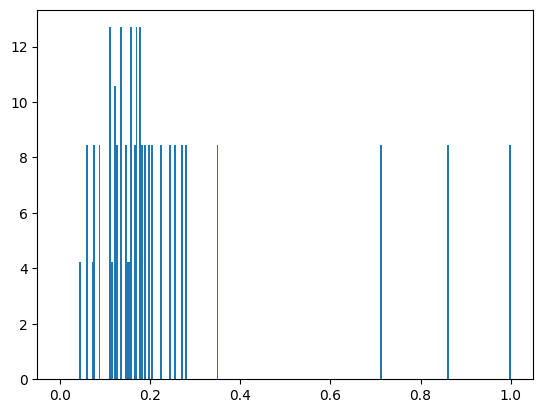

In [ ]:
plt.hist(image.flatten(), bins=256, range=(0, 1), density=True)

In [ ]:
flattened_image = image.flatten()
np.histogram(flattened_image, bins=256, range=(0, 1))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 2, 4, 0, 0,
        4, 0, 0, 0, 0, 0, 6, 2, 0, 5, 4, 0, 6, 0, 0, 4, 2, 2, 6, 0, 4, 6,
        0, 6, 4, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4,
        0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]),
 array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
        0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625

In [ ]:
indexes =  []
for a in range(len(stars)):
    if not oc.iqr_test(stars["REGION"].iloc[a], 11, 11, 4):
        indexes.append(a)


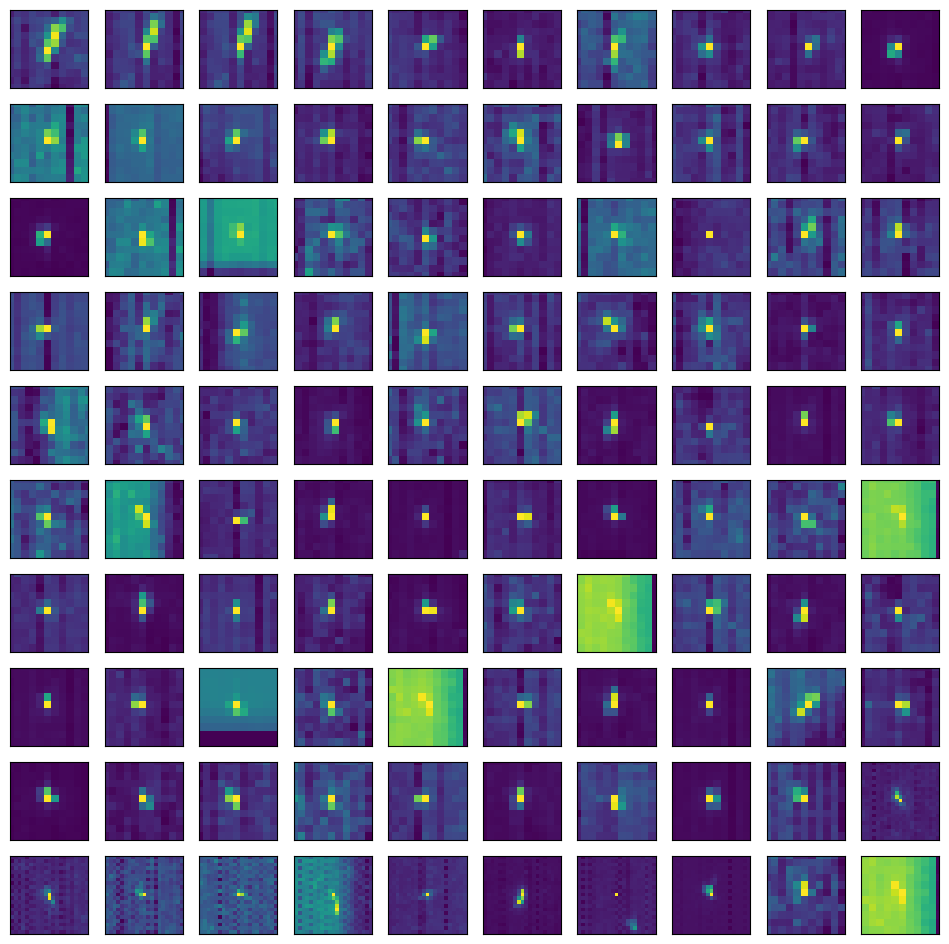

In [ ]:
fig, axis = plt.subplots(10, 10, figsize =(12,12))
axis = axis.flatten()

for i in range(100):
    image = stars["REGION"].iloc[i]
    axis[i].imshow(image)
    axis[i].set_xticks([])
    axis[i].set_yticks([])

In [ ]:
if not oc.iqr_test(stars["REGION"].iloc[0], 11, 11, 3):
    print("hi")

hi


In [ ]:
def normalize_array(croped_img):
    """
    Normalize array given max and min value of the .fits
    """
    max_val = np.max(croped_img.flatten())
    min_val = np.min(croped_img.flatten())
    return (croped_img - min_val) / (max_val - min_val)

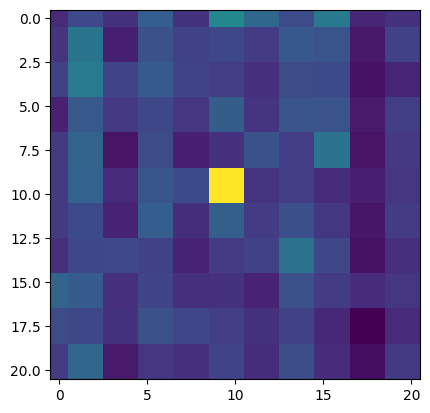

In [ ]:
imm = normalize_array(img)
plt.imshow(imm)


In [ ]:
img[3:8, 3:8].shape

(5, 5)

**Export to PDF**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math

def plot_to_pdfs(dataframe, name_file):
    """
    Convert 2d arrays from a pandas dataframe into a pdf.

    Parameters:
        image (2d-array): image which was used to search objects.
        dataframe (dataframe): pandas dataframe with objects.
        name_dile (str): file name where data will be exported.
    
    """
    # Extract number of plots.
    number_plots = len(dataframe)

    # Define pdf structure.
    n_pages = 10
    n_col = 5
    n_row = 10
    lim = 10
    # Set index page.
    j = 0

    # Start pdf. document.
    with PdfPages(name_file) as pdf:
        # Iterate in pages.
        for page in range(n_pages):
            # Create plot in pages.
            fig, axis = plt.subplots(n_row, n_col, figsize = (10, 20))
            plt.subplots_adjust(wspace=0.3, hspace=0.6)
            axis = axis.flatten()
            
            # Create subplots and display desired data
            for i in range(n_row*n_col):
                if (i+j)< number_plots:
                    x0 = int(dataframe["X_COORD"].iloc[i+j])
                    y0 = int(dataframe["Y_COORD"].iloc[i+j])
                    image = dataframe["REGION"].iloc[i+j]
                    peak = round(dataframe["PEAK_VAL"].iloc[i+j], 3)

                    axis[i].imshow(image)
                    axis[i].set_title(f"Detected at (x,y): {x0}, {y0} \n with peak value: {peak}", fontsize = 6)
                    axis[i].set_xticklabels([])
                    axis[i].set_yticklabels([])
            

            
                else: 
                    fig.delaxes(axis[i])
            
            j = j + n_col*n_row
            
            # Adjust layout
            #plt.tight_layout()
            # Save the current figure to the PDF
            pdf.savefig(fig)
            plt.close(fig)  # Close the figure to free memory

**Extra**

In [ ]:
# Filter already applied.
scale = 0.0028158333333333334
center = [966.075, 998.87]

detected_objects["INSIDE_FOV"] = False

def remove_objects_fov(df, center, scale):
    """
    Remove objects that are outside METIS FOV.

    Parameters:
        df (pandas): dataframe with stars
        center (list): x, y coordinate of FOV center
        scale (float): scale.

    Return:
        df (pandas): filtered dataframe.
    """
    
    vals = []
    for i in range(len(df)):
        x = df["X_COORD"].iloc[i]
        y = df["Y_COORD"].iloc[i]
        accept = od.points_inside_fov(x, y, center, scale)
    if not accept:
        vals.append(i)

    df = df.drop([vals])

    return df